In [137]:
import pandas as pd
import numpy as np
import os

## Cryptocurrency - Exploration


In [27]:
import warnings
warnings.filterwarnings('ignore')
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import gpflow

In [28]:
def load_dataset(filename):

    with open(filename,'r') as dest_f:
        data_iter = csv.reader(dest_f, delimiter = ',', quotechar = '"')
        data = [data for data in data_iter]
        data_array = np.asarray(data)
        
    return data_array

def load_pd_dataset(filename):
    data = pd.read_csv(filename)
    return data

In [29]:
dataset = load_pd_dataset('crypto-markets.csv')

In [30]:
dataset[dataset['name'] == 'Bitcoin'].head()

slug symbol     name        date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin  2013-04-30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin  2013-05-01        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin  2013-05-02        1  116.38  125.60   92.28   

    close  volume      market  close_ratio  spread  
0  134.21       0  1500520000       0.5438    3.88  
1  144.54       0  1491160000       0.7813   13.49  
2  139.00       0  1597780000       0.3843   12.88  
3  116.99       0  1542820000       0.2882   32.17  
4  105.21       0  1292190000       0.3881   33.32

In [31]:
dataset[dataset['name'] == 'Bitcoin'].tail()

slug symbol     name        date  ranknow     open     high      low  \
1756  bitcoin    BTC  Bitcoin  2018-02-17        1  10207.5  11139.5  10149.4   
1757  bitcoin    BTC  Bitcoin  2018-02-18        1  11123.4  11349.8  10326.0   
1758  bitcoin    BTC  Bitcoin  2018-02-19        1  10552.6  11273.8  10513.2   
1759  bitcoin    BTC  Bitcoin  2018-02-20        1  11231.8  11958.5  11231.8   
1760  bitcoin    BTC  Bitcoin  2018-02-21        1  11372.2  11418.5  10479.1   

        close      volume        market  close_ratio  spread  
1756  11112.7  8660880000  172191000000       0.9729   990.1  
1757  10551.8  8744010000  187663000000       0.2206  1023.8  
1758  11225.3  7652090000  178055000000       0.9362   760.6  
1759  11403.7  9926540000  189536000000       0.2365   726.7  
1760  10690.4  9405340000  191927000000       0.2249   939.4

In [32]:
d = dataset.groupby('name').mean()
d[d['market']==0]

ranknow        open         high         low  \
name                                                                  
ACChain                 1201.0    2.070833     2.279167    1.822962   
AI Doctor               1185.0    0.110304     0.120241    0.095518   
ANRYZE                  1446.0    0.021745     0.025542    0.018007   
ATMCoin                 1170.0    3.311844     3.444606    3.185565   
ATN                     1229.0    1.331259     1.442439    1.183203   
AWARE                   1239.0    0.041316     0.044898    0.035370   
Aces                    1344.0    0.000282     0.000497    0.000176   
Acute Angle Cloud       1213.0    0.183453     0.199155    0.168853   
Akuya Coin              1450.0    0.380876     0.502226    0.258063   
AlpaCoin                1397.0    0.103703     0.120223    0.093150   
Alphabit                1329.0   15.783729    21.882378   12.195641   
Alphacat                1257.0    0.017258     0.018884    0.015786   
Animation Vision Cash   1269.0    0.033012     0.035279    0.028654   
Antimatter              1405.0    0.000114     0.000155    0.000087   
ArbitrageCT              714.0    0.030063     0.036422    0.023691   
Aseancoin               1445.0    0.007348     0.010030    0.005628   
AvatarCoin              1483.0    0.022970     0.026647    0.019672   
Avoncoin                1481.0    0.010745     0.012782    0.009337   
BITFID                  1514.0    0.109420     0.122552    0.091774   
BOScoin                 1209.0    1.841624     2.147151    1.546671   
BT2 [CST]               1334.0  250.647963   286.985463  208.885463   
BTCMoon                 1398.0    0.014425     0.018590    0.011657   
Bankex                  1260.0    1.477389     1.609425    1.245107   
Bastonet                1330.0    0.001661     0.002089    0.001222   
BestChain               1428.0    0.007190     0.012279    0.004321   
BigONE Token            1248.0    6.073962     6.663019    5.436792   
BioCoin                 1346.0    0.020929     0.022890    0.019395   
Birds                   1366.0    0.000250     0.000321    0.000190   
BitAlphaCoin            1484.0    0.005477     0.006470    0.004272   
BitSerial               1348.0    2.610496     2.976186    2.209948   
...                        ...         ...          ...         ...   
United Bitcoin          1210.0  201.766061   225.765455  175.353333   
United Traders Token    1345.0    1.025145     1.167386    0.880835   
Universa                1221.0    0.050923     0.052555    0.046461   
UniversalRoyalCoin      1407.0    0.002567     0.003023    0.002109   
UnlimitedIP             1238.0    0.075808     0.081589    0.067802   
ValueChain              1232.0    0.088472     0.099853    0.079615   
Vezt                    1310.0    0.521208     0.661822    0.391727   
Vulcano                 1353.0    0.009498     0.011921    0.007332   
W3Coin                  1206.0    0.007415     0.008241    0.004887   
WA Space                1347.0    0.076554     0.084779    0.069098   
WETH                    1271.0  989.500256  1362.488462  823.851795   
WINCOIN                 1297.0    1.248563     1.378634    1.111868   
WaykiChain              1176.0    0.498864     0.536874    0.438441   
Wi Coin                 1419.0    0.006684     0.008761    0.005312   
Wink                    1416.0    0.000858     0.001228    0.000556   
Wowcoin                 1378.0    0.000104     0.000129    0.000082   
X2                      1502.0    0.000064     0.000075    0.000052   
XDE II                  1471.0    2.446226     2.955502    2.086903   
XTD Coin                1478.0    0.000157     0.000226    0.000110   
Yee                     1202.0    0.032037     0.034908    0.028269   
Yescoin                 1504.0    6.435763     9.599732    2.903689   
ZSEcoin                 1414.0    0.022819     0.030042    0.017052   
Zap                     1316.0    0.424521     0.509911    0.358362   
ZenGold                 1276.0    0.163194     

In [33]:
dataset[dataset['ranknow'] == 1].tail()

slug symbol     name        date  ranknow     open     high      low  \
1756  bitcoin    BTC  Bitcoin  2018-02-17        1  10207.5  11139.5  10149.4   
1757  bitcoin    BTC  Bitcoin  2018-02-18        1  11123.4  11349.8  10326.0   
1758  bitcoin    BTC  Bitcoin  2018-02-19        1  10552.6  11273.8  10513.2   
1759  bitcoin    BTC  Bitcoin  2018-02-20        1  11231.8  11958.5  11231.8   
1760  bitcoin    BTC  Bitcoin  2018-02-21        1  11372.2  11418.5  10479.1   

        close      volume        market  close_ratio  spread  
1756  11112.7  8660880000  172191000000       0.9729   990.1  
1757  10551.8  8744010000  187663000000       0.2206  1023.8  
1758  11225.3  7652090000  178055000000       0.9362   760.6  
1759  11403.7  9926540000  189536000000       0.2365   726.7  
1760  10690.4  9405340000  191927000000       0.2249   939.4

In [34]:
dataset[dataset['ranknow'] == 2].tail()

slug symbol      name        date  ranknow    open    high     low  \
2686  ethereum    ETH  Ethereum  2018-02-17        2  944.75  976.60  940.75   
2687  ethereum    ETH  Ethereum  2018-02-18        2  973.35  982.93  915.45   
2688  ethereum    ETH  Ethereum  2018-02-19        2  921.67  957.78  921.55   
2689  ethereum    ETH  Ethereum  2018-02-20        2  943.57  965.26  892.95   
2690  ethereum    ETH  Ethereum  2018-02-21        2  894.13  912.38  830.56   

       close      volume       market  close_ratio  spread  
2686  974.12  2525720000  92264000000       0.9308   35.85  
2687  923.92  2567290000  95077100000       0.1255   67.48  
2688  943.87  2169020000  90047700000       0.6161   36.23  
2689  895.37  2545260000  92206500000       0.0335   72.31  
2690  849.97  2531730000  87394200000       0.2372   81.82

In [35]:
dataset[dataset['ranknow'] == 100].tail()

slug symbol   name        date  ranknow      open      high       low  \
52238  ignis  IGNIS  Ignis  2018-02-17      100  0.245327  0.262122  0.243568   
52239  ignis  IGNIS  Ignis  2018-02-18      100  0.258516  0.262333  0.230749   
52240  ignis  IGNIS  Ignis  2018-02-19      100  0.241701  0.289138  0.239119   
52241  ignis  IGNIS  Ignis  2018-02-20      100  0.274916  0.292821  0.235766   
52242  ignis  IGNIS  Ignis  2018-02-21      100  0.236103  0.243171  0.213143   

          close    volume     market  close_ratio  spread  
52238  0.258393   6910930  186729000       0.7990    0.02  
52239  0.241146   5536300  196768000       0.3292    0.03  
52240  0.279037  17449500  183970000       0.7981    0.05  
52241  0.237727  16824700  209251000       0.0344    0.06  
52242  0.222555   6706470  179709000       0.3134    0.03

In [36]:
#rank by market cap
d_rank = dataset[(dataset['date'] == '2018-02-21') & (dataset['market']!=0)]
d_rank = d_rank[['name','market']]
d_rank.sort_values(by='market', ascending=False)

name        market
1760               Bitcoin  191927000000
2690              Ethereum   87394200000
4353                Ripple   42207600000
4567          Bitcoin Cash   23988100000
6328              Litecoin   12773200000
6472               Cardano    9738030000
7003                   NEO    8298400000
8300               Stellar    7381920000
8536                   EOS    6315770000
10005                 Dash    5435710000
11631                 IOTA    5270980000
11377               Monero    4761040000
12689                  NEM    4339330000
13267     Ethereum Classic    3807360000
13429                 TRON    3084190000
13613              VeChain    2955150000
14300                 Lisk    2658780000
15784                 Qtum    2281560000
15388               Tether    2229030000
15510         Bitcoin Gold    2224630000
16007              OmiseGO    1869530000
16125                 ICON    1615600000
16606                Zcash    1458040000
18834                Steem    1033440000
18159                Verge    1022620000
20180             Bytecoin    1015580000
20392         Binance Coin     978027000
16943                 Nano     927731000
20617             Populous     916478000
22086              Stratis     895575000
...                    ...           ...
477012             Ulatech         28718
600058              P7Coin         27653
599288        Coimatic 3.0         26672
598026             Cabbage         24732
599174              BioBar         24639
476567           Coupecoin         24317
476324           CrevaCoin         20409
602230             Concoin         19034
601524        Antilitecoin         17673
601922            NodeCoin         17508
471477             Rawcoin         16842
477440          Vault Coin         16591
602439          GeyserCoin         14713
476833           Project-X         14046
603702              Magnum         13778
600846       Save and Gain         13751
477657              Aerium         13556
602652        Coimatic 2.0         13142
603337          Selfiecoin         12095
604052            LevoPlus         10936
477560           EXRNchain          9303
604915          CaliphCoin          6811
477958        Tristar Coin          4512
478171         HarmonyCoin          4370
478527              PRCoin          4090
605438           PizzaCoin          3400
606199     Digital Credits          3268
606596             Abncoin          2589
478801  Digital Money Bits          2079
479111       Ebittree Coin          1277

[1155 rows x 2 columns]

In [37]:
#see if market cap is 0 for any data of any type under first 11 ranks
data = dataset[dataset['ranknow'] < 11]
d = data.groupby('name').min()
d

slug symbol        date  ranknow        open  \
name                                                                 
Bitcoin            bitcoin    BTC  2013-04-28        1   68.500000   
Bitcoin Cash  bitcoin-cash    BCH  2017-07-23        4  212.180000   
Cardano            cardano    ADA  2017-10-01        6    0.018414   
Dash                  dash   DASH  2014-02-14       10    0.213899   
EOS                    eos    EOS  2017-07-01        9    0.492790   
Ethereum          ethereum    ETH  2015-08-07        2    0.431589   
Litecoin          litecoin    LTC  2013-04-28        5    1.150000   
NEO                    neo    NEO  2016-09-09        7    0.080197   
Ripple              ripple    XRP  2013-08-04        3    0.002809   
Stellar            stellar    XLM  2014-08-05        8    0.001352   

                    high         low       close   volume     market  \
name                                                                   
Bitcoin        74.560000   65.530000   68.430000        0  779255000   
Bitcoin Cash  223.700000  200.980000  213.150000    85013          0   
Cardano         0.021050    0.017354    0.018539  1739460          0   
Dash            0.354461    0.213899    0.314865     9604     702537   
EOS             0.518657    0.480196    0.493225  4556540          0   
Ethereum        0.482988    0.420897    0.434829   102128          0   
Litecoin        1.340000    1.110000    1.160000        0   37943700   
NEO             0.085211    0.072287    0.080181      156          0   
Ripple          0.003082    0.002802    0.002810        0   21960300   
Stellar         0.001509    0.001227    0.001357      491     746554   

              close_ratio  spread  
name                               
Bitcoin               0.0    0.00  
Bitcoin Cash          0.0    7.50  
Cardano               0.0    0.00  
Dash                  0.0    0.03  
EOS                   0.0    0.02  
Ethereum              0.0    0.02  
Litecoin              0.0    0.01  
NEO                   0.0    0.00  
Ripple                0.0    0.00  
Stellar               0.0    0.00

In [38]:
plt.style.use('fivethirtyeight')

In [39]:
d_rank = dataset[dataset['market']!=0]
ranks = np.unique(np.array(d_rank['ranknow']))

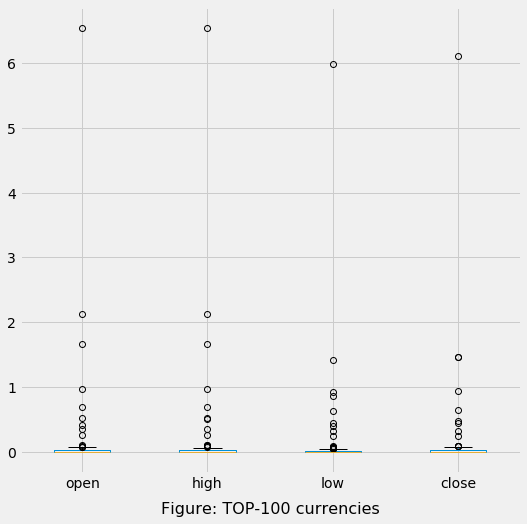

In [40]:
d = dataset[(dataset['date'] == '2018-02-21') & (dataset['ranknow'] >1416)]
d = d[['open','high', 'low', 'close']]

fig = plt.figure(figsize=(8, 8))
box = d.boxplot(grid=True, return_type='axes', showfliers=True)
plt.title('Figure: TOP-100 currencies', y=-0.1, fontsize=16)
plt.show()

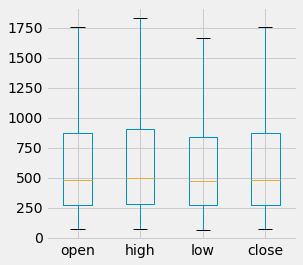

In [41]:
d = dataset[dataset['ranknow'] == 1]
d = d[['open','high', 'low', 'close']]

fig = plt.figure(figsize=(4, 4))
box = d.boxplot(grid=True, return_type='axes', showfliers=False)
plt.show()

In [42]:
# test for normalization
scaler = MinMaxScaler()
dat = dataset[['open','high', 'low', 'close']]
scaler.fit(dat)
dat = scaler.transform(dat)
dat

array([[5.88672941e-05, 4.64714125e-05, 6.50549840e-05, 5.83334058e-05],
       [5.84931191e-05, 5.04049759e-05, 6.59906727e-05, 6.28232656e-05],
       [6.26525524e-05, 5.02135949e-05, 6.60152960e-05, 6.04153446e-05],
       ...,
       [6.52521983e-12, 1.05932128e-11, 7.38701555e-12, 1.30392830e-11],
       [1.30515274e-11, 1.09349646e-11, 7.87948326e-12, 7.38892704e-12],
       [7.39539417e-12, 5.80868733e-12, 7.87948326e-12, 7.38892704e-12]])

In [43]:
d_rank = dataset[dataset['market']!=0]
ranks = np.unique(np.array(d_rank['ranknow']))
len(ranks)

1216

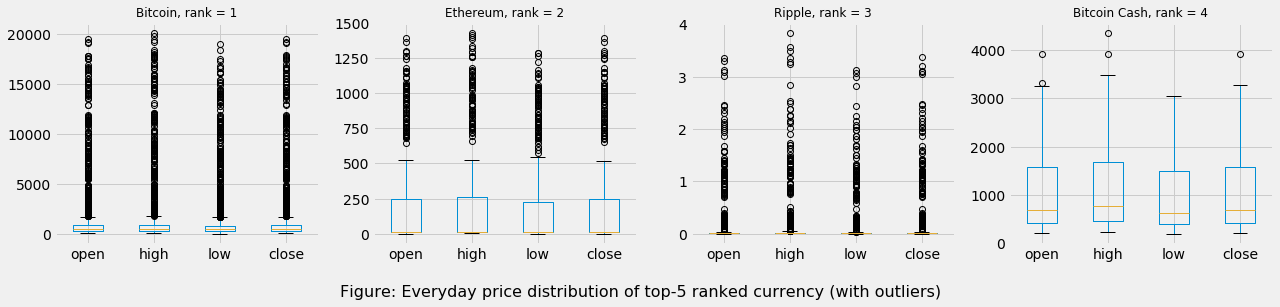

In [44]:
fig = plt.figure(figsize=(18, 4))
sub = []
first_rank = 1
last_rank = 4
ncols = 4
nrows = int(np.ceil((last_rank-first_rank)/ncols))
ind = 1
for rank in range(first_rank, last_rank+1):
    sub.append(plt.subplot(nrows, ncols, ind))
    d = dataset[dataset['ranknow'] == rank]
    name = d.iloc[0, 2]
    sub[ind-1].set_title(label=name+', rank = '+ str(rank), fontsize=12)
    d = d[['open','high', 'low', 'close']]
    box = d.boxplot(grid=True, return_type='axes', showfliers=True)
    ind += 1
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.suptitle('Figure: Everyday price distribution of top-5 ranked currency (with outliers)', y=-0.03, fontsize=16)
plt.show()

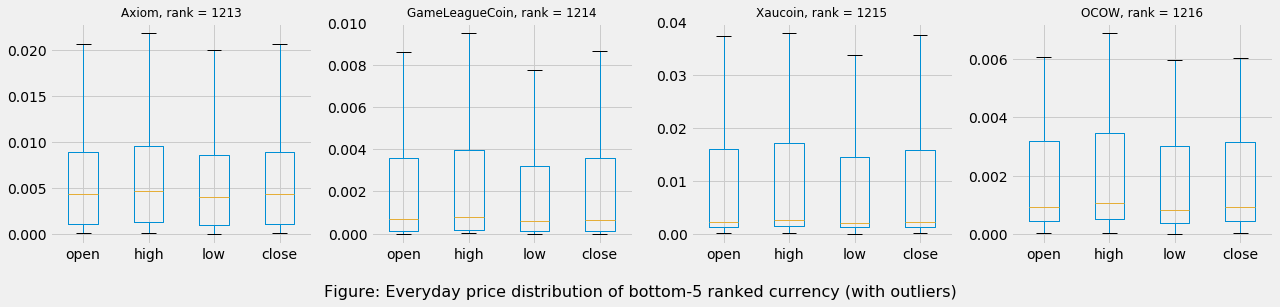

In [45]:
fig = plt.figure(figsize=(18, 4))
sub = []
ncols = 4
nrows = 1
count = ncols*nrows
ind = 1
last_or_first = False
if not last_or_first:
    rk_start = len(ranks)-count
    rk_end = len(ranks)
else:
    rk_start = 0
    rk_end = count+1
for rank in range(rk_start, rk_end):
    sub.append(plt.subplot(nrows, ncols, ind))
    d = dataset[dataset['ranknow'] == ranks[rank]]
    name = d.iloc[0, 2]
    sub[ind-1].set_title(label=name+', rank = '+ str(rank+1), fontsize=12)
    d = d[['open','high', 'low', 'close']]
    box = d.boxplot(grid=True, return_type='axes', showfliers=False)
    if ind == count:
        break
    ind += 1
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.suptitle('Figure: Everyday price distribution of bottom-5 ranked currency (with outliers)', y=-0.03, fontsize=16)
plt.show()

In [46]:
dataset.max()

slug                zurcoin
symbol                  ZZC
name               vTorrent
date             2018-02-21
ranknow                1516
open            2.29839e+06
high             2.9261e+06
low             2.03059e+06
close           2.30074e+06
volume          23840900000
market         326141000000
close_ratio               1
spread          1.77056e+06
dtype: object

In [47]:
dataset.min()

slug                   0x
symbol                $$$
name                   0x
date           2013-04-28
ranknow                 1
open              2.5e-09
high              3.2e-09
low               9.2e-14
close                   0
volume                  0
market                  0
close_ratio          -inf
spread                  0
dtype: object

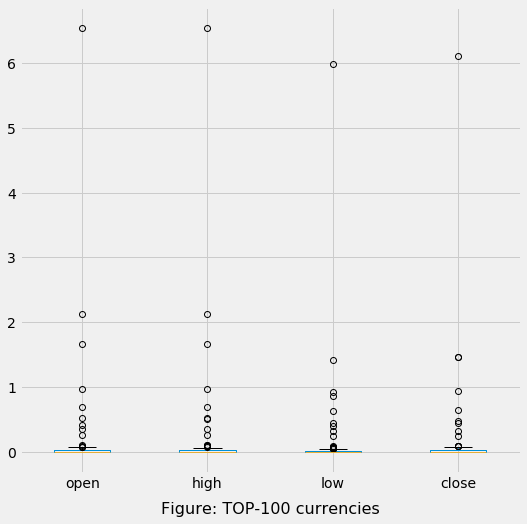

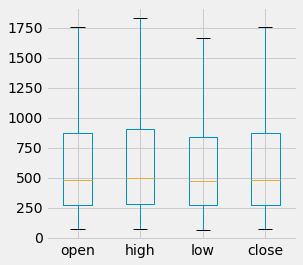

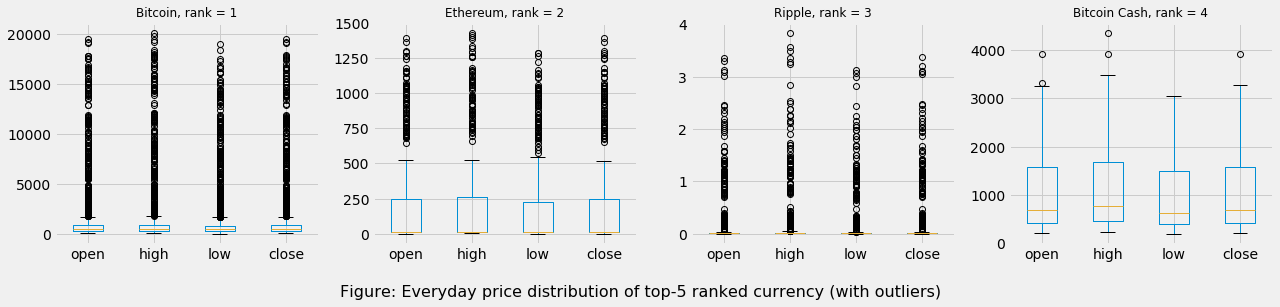

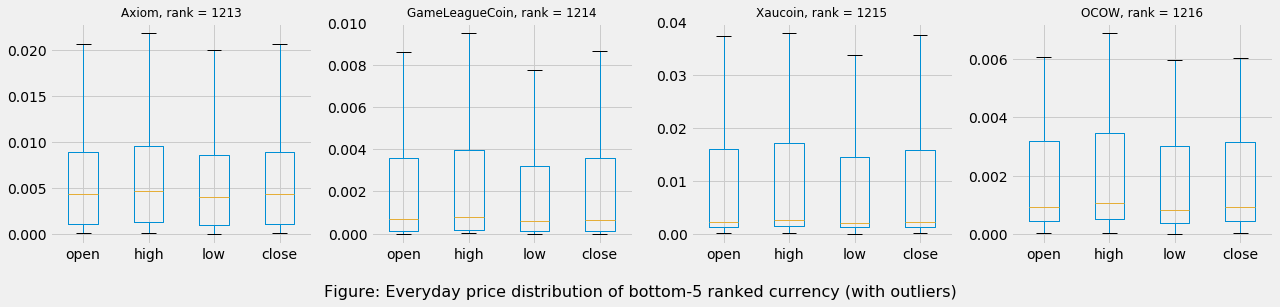

slug                   0x
symbol                $$$
name                   0x
date           2013-04-28
ranknow                 1
open              2.5e-09
high              3.2e-09
low               9.2e-14
close                   0
volume                  0
market                  0
close_ratio          -inf
spread                  0
dtype: object

In [48]:
## Cryptocurrency - Exploration


import warnings
warnings.filterwarnings('ignore')
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import gpflow

def load_dataset(filename):

    with open(filename,'r') as dest_f:
        data_iter = csv.reader(dest_f, delimiter = ',', quotechar = '"')
        data = [data for data in data_iter]
        data_array = np.asarray(data)
        
    return data_array

def load_pd_dataset(filename):
    data = pd.read_csv(filename)
    return data

dataset = load_pd_dataset('crypto-markets.csv')

dataset[dataset['name'] == 'Bitcoin'].head()

dataset[dataset['name'] == 'Bitcoin'].tail()

d = dataset.groupby('name').mean()
d[d['market']==0]
# print(d.index)
# # np.array(d.index)
# d[d['name']=='2GIVE']

dataset[dataset['ranknow'] == 1].tail()

dataset[dataset['ranknow'] == 2].tail()

dataset[dataset['ranknow'] == 100].tail()

#rank by market cap
d_rank = dataset[(dataset['date'] == '2018-02-21') & (dataset['market']!=0)]
d_rank = d_rank[['name','market']]
d_rank.sort_values(by='market', ascending=False)

#see if market cap is 0 for any data of any type under first 11 ranks
data = dataset[dataset['ranknow'] < 11]
d = data.groupby('name').min()
d

plt.style.use('fivethirtyeight')

d_rank = dataset[dataset['market']!=0]
ranks = np.unique(np.array(d_rank['ranknow']))

d = dataset[(dataset['date'] == '2018-02-21') & (dataset['ranknow'] >1416)]
d = d[['open','high', 'low', 'close']]

fig = plt.figure(figsize=(8, 8))
box = d.boxplot(grid=True, return_type='axes', showfliers=True)
plt.title('Figure: TOP-100 currencies', y=-0.1, fontsize=16)
plt.show()

d = dataset[dataset['ranknow'] == 1]
d = d[['open','high', 'low', 'close']]

fig = plt.figure(figsize=(4, 4))
box = d.boxplot(grid=True, return_type='axes', showfliers=False)
plt.show()

# test for normalization
scaler = MinMaxScaler()
dat = dataset[['open','high', 'low', 'close']]
scaler.fit(dat)
dat = scaler.transform(dat)
dat

d_rank = dataset[dataset['market']!=0]
ranks = np.unique(np.array(d_rank['ranknow']))
len(ranks)

fig = plt.figure(figsize=(18, 4))
sub = []
first_rank = 1
last_rank = 4
ncols = 4
nrows = int(np.ceil((last_rank-first_rank)/ncols))
ind = 1
for rank in range(first_rank, last_rank+1):
    sub.append(plt.subplot(nrows, ncols, ind))
    d = dataset[dataset['ranknow'] == rank]
    name = d.iloc[0, 2]
    sub[ind-1].set_title(label=name+', rank = '+ str(rank), fontsize=12)
    d = d[['open','high', 'low', 'close']]
    box = d.boxplot(grid=True, return_type='axes', showfliers=True)
    ind += 1
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.suptitle('Figure: Everyday price distribution of top-5 ranked currency (with outliers)', y=-0.03, fontsize=16)
plt.show()

fig = plt.figure(figsize=(18, 4))
sub = []
ncols = 4
nrows = 1
count = ncols*nrows
ind = 1
last_or_first = False
if not last_or_first:
    rk_start = len(ranks)-count
    rk_end = len(ranks)
else:
    rk_start = 0
    rk_end = count+1
for rank in range(rk_start, rk_end):
    sub.append(plt.subplot(nrows, ncols, ind))
    d = dataset[dataset['ranknow'] == ranks[rank]]
    name = d.iloc[0, 2]
    sub[ind-1].set_title(label=name+', rank = '+ str(rank+1), fontsize=12)
    d = d[['open','high', 'low', 'close']]
    box = d.boxplot(grid=True, return_type='axes', showfliers=False)
    if ind == count:
        break
    ind += 1
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.suptitle('Figure: Everyday price distribution of bottom-5 ranked currency (with outliers)', y=-0.03, fontsize=16)
plt.show()
dataset.max()

dataset.min()

## Cryptocurrency - Fluctuations


In [49]:
import warnings
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import gpflow
from queue import PriorityQueue

In [50]:
def load_dataset(filename):

    with open(filename,'r') as dest_f:
        data_iter = csv.reader(dest_f, delimiter = ',', quotechar = '"')
        data = [data for data in data_iter]
        data_array = np.asarray(data)
        
    return data_array

def load_pd_dataset(filename):
    data = pd.read_csv(filename)
    return data

In [51]:
dataset = load_pd_dataset('crypto-markets.csv')

## Fluctuations

In [52]:
def plot_coin_info_mod(size_x, size_y, X, Y, coin_name, attribute, xlimit=-1, extra_title=""):
    plt.figure(figsize=(size_x, size_y))
    plt.plot(X, Y, 'ko-', mew=0.5)
    plt.xlabel("Time", fontsize=12)
    plt.ylabel(coin_name+" "+attribute, fontsize=12)
    plt.title(coin_name+" "+attribute+" "+extra_title, fontsize=12)
    if xlimit == -1:
        plt.xlim([min(X), max(X)])
    else:
        plt.xlim(x_limit)
    plt.ylim([min(Y)-1, max(Y)+1])
    plt.style.use('fivethirtyeight')
    plt.show()

In [53]:
def decrement_increment(info_cumsum, pos='-'):
    pos_cumsum = []
    if pos == '+':
        value = -np.inf
        for i in range(len(info_cumsum)):
            if info_cumsum[i] > value:
                pos_cumsum.append(info_cumsum[i])
                value = info_cumsum[i]
            else:
                pos_cumsum.append(pos_cumsum[i-1])
        return pos_cumsum
    else:
        value = np.inf
        for i in range(len(info_cumsum)):
            if info_cumsum[i] < value:
                pos_cumsum.append(info_cumsum[i])
                value = info_cumsum[i]
            else:
                pos_cumsum.append(pos_cumsum[i-1])
        return pos_cumsum

In [54]:
start_date = '2017-03-01'
end_date = '2018-02-21'
attribute = 'market'
info = dataset[(dataset['date'] > start_date)][attribute]
date = pd.to_datetime(dataset[(dataset['date'] > start_date)]['date'])
x_limit = -1

In [56]:
coin = 'Bitcoin'
attribute = 'market'
start_dt = np.array(dataset[(dataset['name'] == coin) & (dataset['date'] > start_date)].head(1)['date'])[0]
end_dt = np.array(dataset[(dataset['name'] == coin) & (dataset['date'] > start_date)].tail(1)['date'])[0]
info1 = dataset[(dataset['name'] == coin) & (dataset['date'] > start_dt)][attribute]
info2 = dataset[(dataset['name'] == coin) & (dataset['date'] >= start_dt) & (dataset['date'] < end_dt)][attribute]
date = pd.to_datetime(dataset[(dataset['name'] == coin) & (dataset['date'] > start_dt)]['date'])

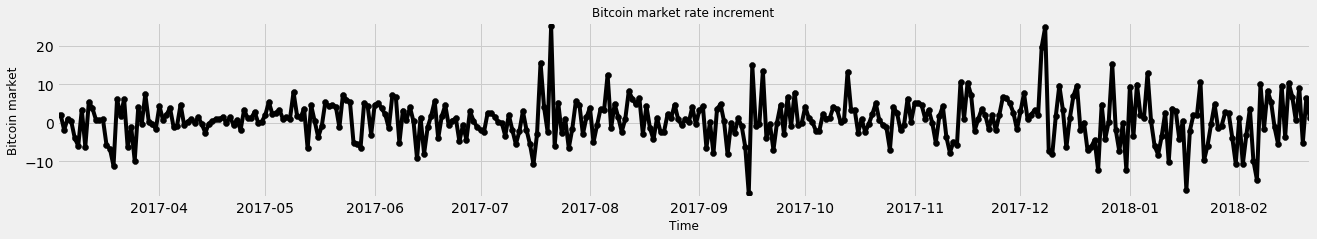

In [58]:
info = ((np.array(info1) - np.array(info2))/np.array(info2))*100
x_limit = -1
plot_coin_info_mod(20, 3, date, info, coin, attribute, x_limit, "rate increment")

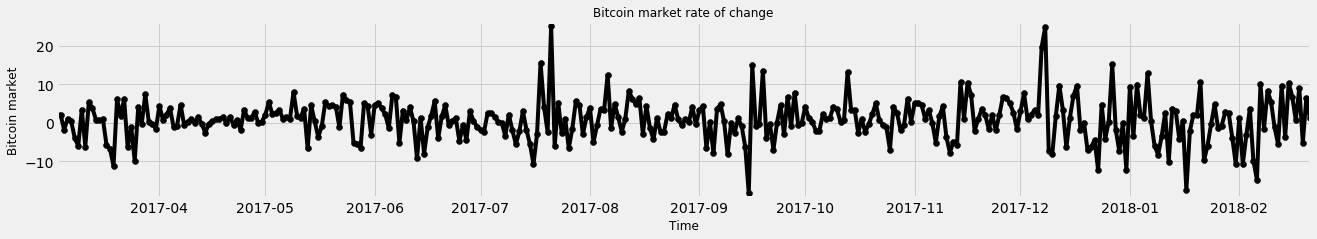

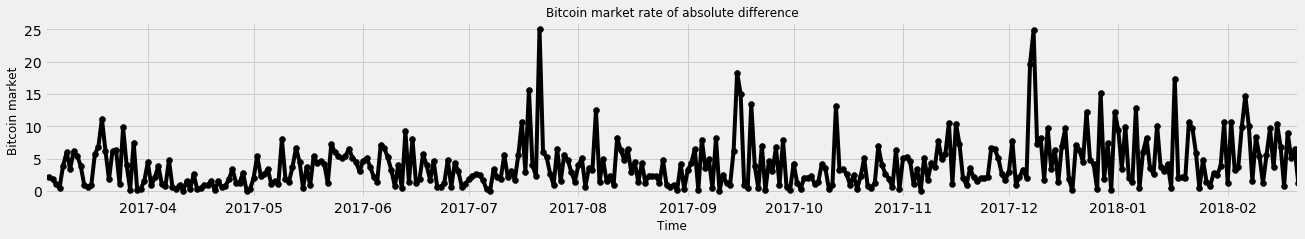

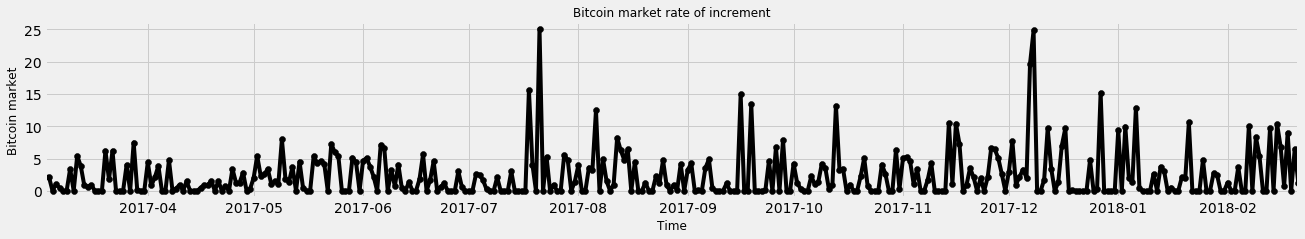

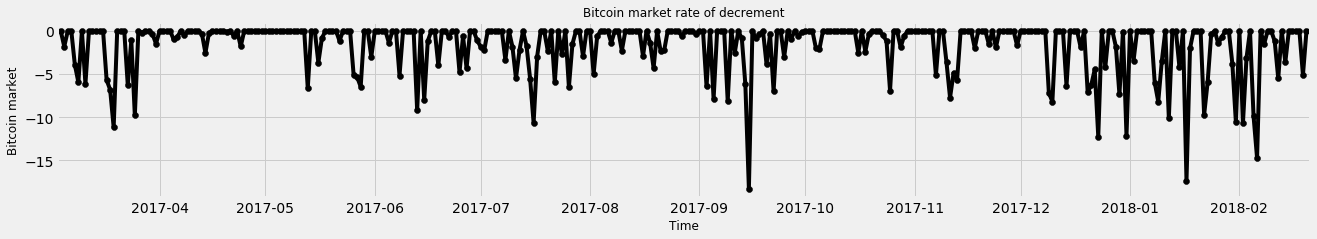

mean:  0.7853170704975362
absolute mean:  3.977789034151731
positive mean:  2.3815530523246338
negative mean:  -1.5962359818270975


In [59]:
# min rate 
plot_coin_info_mod(20, 3, date, info, coin, attribute, x_limit, "rate of change")
info_mean = np.mean(info)

info_abs = np.abs(info)
plot_coin_info_mod(20, 3, date, info_abs, coin, attribute, x_limit, "rate of absolute difference")
info_abs_mean = np.mean(info_abs)

info_pos = np.where(info < 0, 0, info)
plot_coin_info_mod(20, 3, date, info_pos, coin, attribute, x_limit, "rate of increment")
info_pos_mean = np.mean(info_pos)

info_neg = np.where(info > 0, 0, info)
plot_coin_info_mod(20, 3, date, info_neg, coin, attribute, x_limit, "rate of decrement")
info_neg_mean = np.mean(info_neg)
print('mean: ', info_mean)
print('absolute mean: ', info_abs_mean)
print('positive mean: ', info_pos_mean)
print('negative mean: ', info_neg_mean)


In [60]:
pos_cumsum = decrement_increment(info, '-')

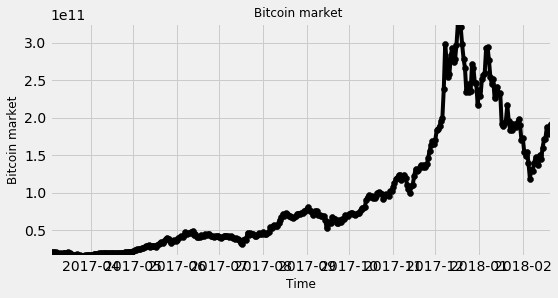

In [61]:
x_limit = -1
plot_coin_info_mod(8,4, date, info1, coin, attribute, x_limit)

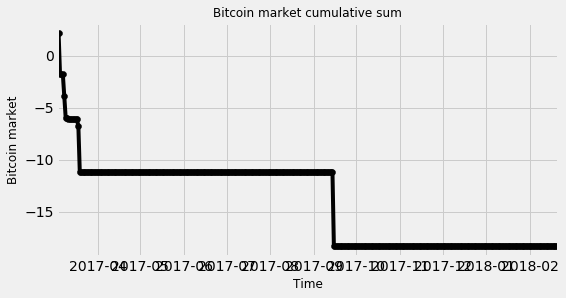

In [62]:
x_limit = -1
plot_coin_info_mod(8, 4, date, pos_cumsum, coin, attribute, x_limit, "cumulative sum")

## Fluctuations for each type of coins

In [128]:
def calculate_flactuation(dataset, coin_names, attribute, start_date, end_date, type_fl):
    PQ = PriorityQueue()
    skip = 0
    value_error = 0
    for coin in coin_names:
        st_dt = np.array(dataset[(dataset['name'] == coin) & (dataset[attribute] > 0)].head(1)['date'])
        ed_dt = np.array(dataset[(dataset['name'] == coin) & (dataset[attribute] > 0)].tail(1)['date'])
        start_dt = st_dt[0] if len(st_dt)>0 else -1 
        end_dt = ed_dt[0] if len(ed_dt)>0 else -1
        if start_dt==-1 or end_dt==-1:
            skip+=1
            continue
        
        info1 = dataset[(dataset['name'] == coin) & (dataset['date'] > start_dt)& (dataset['date'] <= end_dt)][attribute]
        info2 = dataset[(dataset['name'] == coin) & (dataset['date'] >= start_dt) & (dataset['date'] < end_dt)][attribute]
        try:
            info = ((np.array(info1) - np.array(info2))/np.array(info2))*100
        except ValueError:
            print(coin)
            print(len(info1))
            print(len(info2))
            value_error += 1
            continue
         
        if type_fl=='default':
            info_mean = np.mean(info)
            if not (np.isinf(info_mean) or np.isnan(info_mean)):
                PQ.put((info_mean, coin))
        
        elif type_fl=='abs':
            try:
                info_fl = np.abs(info)
                info_mean = np.mean(info_fl)
                if not (np.isinf(info_mean) or np.isnan(info_mean)):
                    PQ.put((info_mean, coin))
            except:
                pass
            
        elif type_fl=='inc':
            try:
                info_fl = np.where(info < 0, 0, info)
                info_mean = np.mean(info_fl)
                if not (np.isinf(info_mean) or np.isnan(info_mean)):
                    PQ.put((info_mean, coin))
            except:
                pass
        
        elif type_fl=='dec':
            try:
                info_fl = np.where(info > 0, 0, info)
                info_mean = np.mean(info_fl)
                if not (np.isinf(info_mean) or np.isnan(info_mean)):
                    PQ.put((abs(info_mean), coin))
            except:
                pass
        else:
            print('Wrong Type Parameter!')
    return PQ, skip, value_error
        

In [129]:
data = dataset[(dataset['ranknow'] < 11) & (dataset['date']>start_date)]
d = data.groupby('name').max()

In [130]:
coin_names = d.index.tolist()

In [131]:
attribute = 'market'
pq_default, _, _ = calculate_flactuation(data, coin_names, attribute, start_date, end_date, 'default')
pq_abs, _, _ = calculate_flactuation(data, coin_names, attribute, start_date, end_date, 'abs')
pq_inc, _, _ = calculate_flactuation(data, coin_names, attribute, start_date, end_date, 'inc')
pq_dec, _, _ = calculate_flactuation(data, coin_names, attribute, start_date, end_date, 'dec')

In [132]:
val_default = []
val_abs = []
val_inc = []
val_dec = []

while not pq_default.empty():
    val_default.append(pq_default.get())
    val_abs.append(pq_abs.get())
    val_inc.append(pq_inc.get())
    val_dec.append(pq_dec.get())

In [133]:
fl_values = []
for i in range(0, len(val_default)):
    row = []
    row.append(val_default[i][0])
    row.append(val_default[i][1])
    row.append(val_abs[i][0])
    row.append(val_abs[i][1])
    row.append(val_inc[i][0])
    row.append(val_inc[i][1])
    row.append(val_dec[i][0])
    row.append(val_dec[i][1])
    fl_values.append(row)

In [134]:
types_fl = ['Mean Rate', 'Mean Absolute Rate', 'Mean Positive Rate', 'Mean Negative Rate']
cols = pd.MultiIndex.from_product([types_fl, ['value', 'coins']])

In [136]:
fl_df = pd.DataFrame(fl_values, columns=cols)
fl_df.style.set_properties(**{'text-align': 'left'})

### coins that have positive mean and negative mean -> pie chart
### most fuctuations 

In [138]:
start_date = '2017-03-01'
data = dataset[dataset['date']>start_date]
d = data.groupby('name').max()
coin_names = d.index.tolist()

In [139]:
attribute = 'market'
pq_all_mean, skip, error = calculate_flactuation(data, coin_names, attribute, start_date, end_date, 'default')

In [140]:
val_all_mean = []

while not pq_all_mean.empty():
    val_all_mean.append(pq_all_mean.get())

len(val_all_mean)

1127

In [141]:
_0x = 0.5
neg_mean_count = 0
mean_0x = 0
for tp in val_all_mean:
    if tp[0] < 0:
        neg_mean_count+=1
    elif tp[0] < _0x:
        mean_0x +=1

print('- mean: ', neg_mean_count)
print('.x mean: ', mean_0x)
print('+ mean: ', len(val_all_mean) - neg_mean_count -mean_0x)

- mean:  82
.x mean:  23
+ mean:  1022


## Cryptocurrency Predicion
## GP Flow

In [145]:
import warnings
warnings.filterwarnings('ignore')
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import gpflow

In [146]:
def load_dataset(filename):

    with open(filename,'r') as dest_f:
        data_iter = csv.reader(dest_f, delimiter = ',', quotechar = '"')
        data = [data for data in data_iter]
        data_array = np.asarray(data)
        
    return data_array

def load_pd_dataset(filename):
    data = pd.read_csv(filename)
    return data

In [147]:
dataset = load_pd_dataset('crypto-markets.csv')

### Time-Series prediction

In [148]:
def plot(X_train, Y_train, X_test, Y_test, X_pred, Y_pred_mean, Y_pred_var, xlimit, title):
    plt.figure(figsize=(12, 6))
    plt.plot(X_train, Y_train, 'kx', mew=2, label="Train")
    plt.plot(X_test, Y_test, 'rx', mew=2, label="Test")
    plt.plot(X_pred, Y_pred_mean, 'C0', lw=2)
    plt.fill_between(X_pred[:,0],
                     Y_pred_mean[:,0] - 2*np.sqrt(Y_pred_var[:,0]),
                     Y_pred_mean[:,0] + 2*np.sqrt(Y_pred_var[:,0]),
                     color='C0', alpha=0.2)
    plt.xlim(xlimit)
    plt.ylim([min(Y_train), max(Y_train)])
    plt.xlabel("Time", fontsize=20)
    plt.ylabel("Value", fontsize=20)
    plt.legend()
    plt.title(title, fontsize=25)
    plt.style.use('fivethirtyeight')
    plt.show()

In [149]:
def plot_coin_info(X, Y, coin_name, attribute, xlimit=-1):
    plt.figure(figsize=(18, 8))
    plt.plot(X, Y, 'ko-', mew=0.5)
    plt.xlabel("Time", fontsize=20)
    plt.ylabel(coin_name+" "+attribute, fontsize=20)
    plt.title(coin_name+" "+attribute, fontsize=25)
    if xlimit == -1:
        plt.xlim([min(X), max(X)])
    else:
        plt.xlim(x_limit)
    plt.ylim([min(Y)-1, max(Y)+1])
    plt.style.use('fivethirtyeight')
    plt.show()

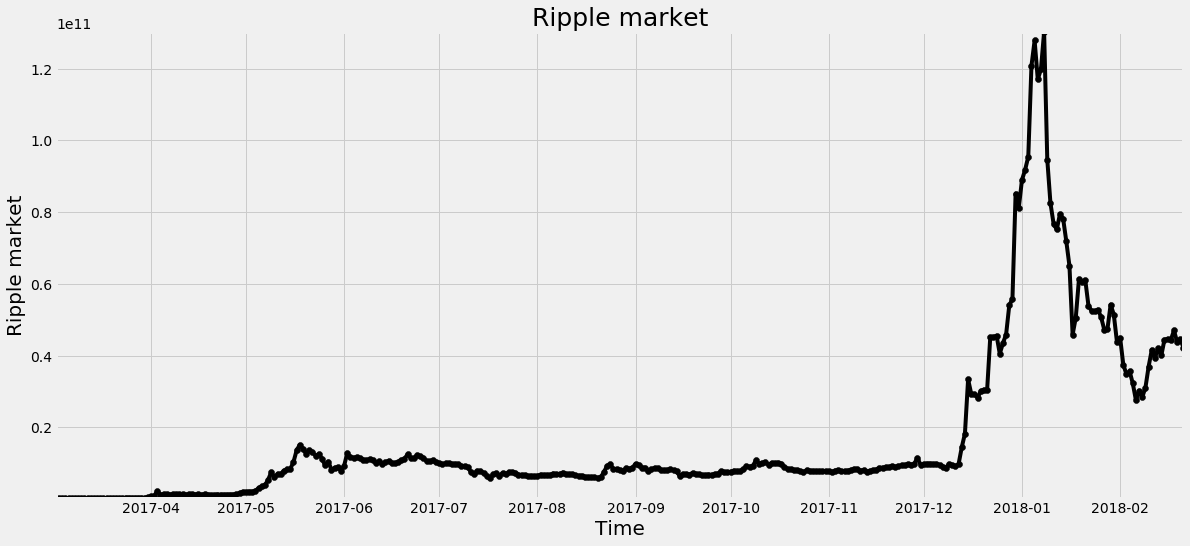

In [150]:
coin = 'Ripple'
attribute = 'market'
info = dataset[(dataset['name'] == coin) & (dataset['date'] > '2017-03-01')][attribute]
date = pd.to_datetime(dataset[(dataset['name'] == coin) & (dataset['date'] > '2017-03-01')]['date'])
x_limit = -1
plot_coin_info(date, info, coin, attribute, x_limit)

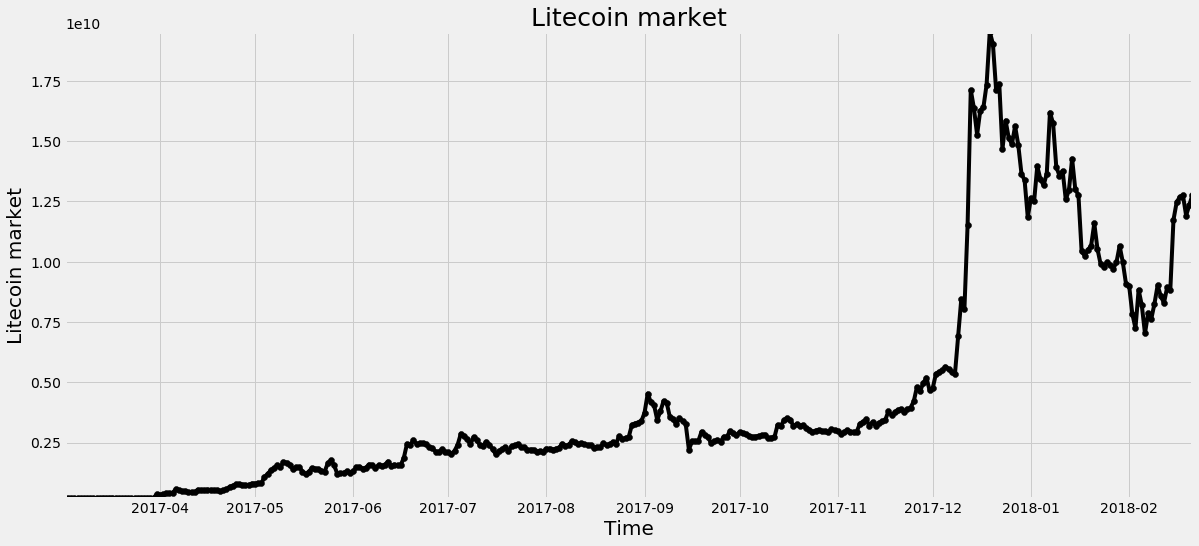

In [151]:
coin = 'Litecoin'
attribute = 'market'
info = dataset[(dataset['name'] == coin) & (dataset['date'] > '2017-03-01')][attribute]
date = pd.to_datetime(dataset[(dataset['name'] == coin) & (dataset['date'] > '2017-03-01')]['date'])
x_limit = -1
plot_coin_info(date, info, coin, attribute, x_limit)

In [152]:
coin = 'Bitcoin'
attribute = 'close'
info = dataset[(dataset['name'] == coin) & (dataset['date'] > '2017-03-01')][attribute]
date = pd.to_datetime(dataset[(dataset['name'] == coin) & (dataset['date'] > '2017-03-01')]['date'])
date_number = date.index.values.astype(float)
date_mean0 = date_number - date_number.mean(0)
date_gp = np.array(date_mean0, dtype=np.float64).reshape(len(date_mean0), 1)
info_gp = np.array(info, dtype=np.float64).reshape(len(info), 1)
info_gp_log = np.log(info_gp)

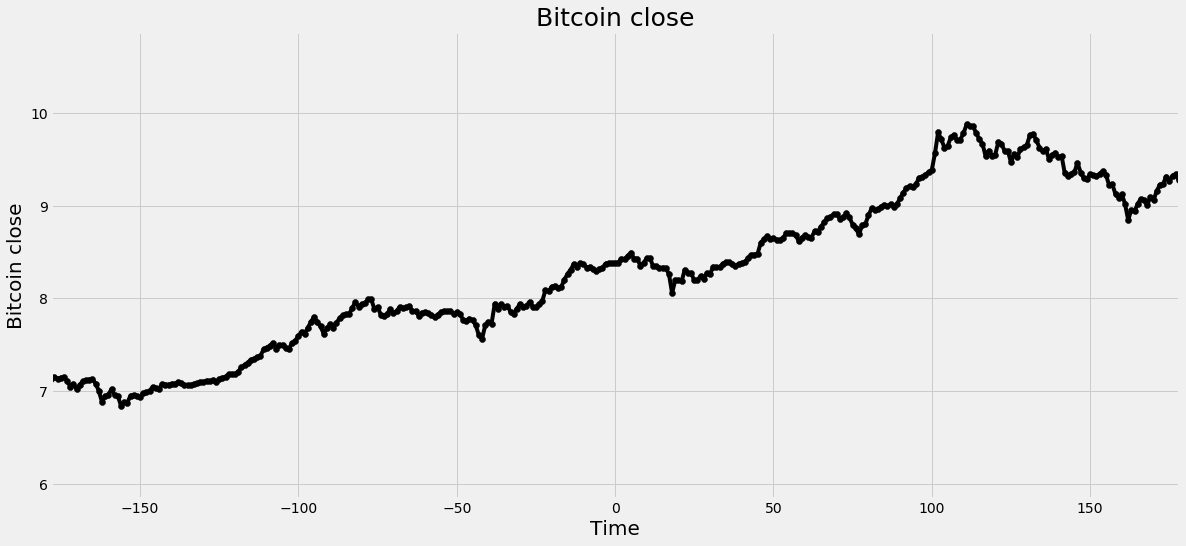

In [153]:
plot_coin_info(date_gp, info_gp_log, coin, attribute)

In [154]:
coin = 'Bitcoin'
attribute = 'close'
start_date = '2017-04-01'
end_date = '2018-03-22'
info = dataset[(dataset['name'] == coin) & (dataset['date'] > start_date) & (dataset['date'] < end_date)][attribute]
date = pd.to_datetime(dataset[(dataset['name'] == coin) & (dataset['date'] > start_date) & (dataset['date'] < end_date)]['date'])

date_number = date.index.values.astype(float)
date_mean0 = date_number - date_number.mean(0)
date_gp = np.array(date_mean0, dtype=np.float64).reshape(len(date_mean0), 1)
info_gp = np.array(info, dtype=np.float64).reshape(len(info), 1)

info_count = len(info_gp)
train_count = int(info_count * 0.95)
info_gp_train = info_gp[:train_count]
date_gp_train = date_gp[:train_count]

In [155]:
# constant + linear kernel
k_const = gpflow.kernels.Constant(1)
k_linear = gpflow.kernels.Linear(1)
# k = k_const + k_linear
k_periodic = gpflow.kernels.Periodic(1, period=1.2)
k_matern12 = gpflow.kernels.Matern52(1)
k_rbf = gpflow.kernels.RBF(1)
# k = k_rbf * k_linear
# k = k_rbf
k = k_const + k_rbf * k_linear

# condition on data and optimize kernel hyperparameters
m = gpflow.models.GPR(date_gp_train, info_gp_train, kern=k)
m.likelihood.variance = 1
gpflow.train.ScipyOptimizer().minimize(m)

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 2639.154920
  Number of iterations: 63
  Number of functions evaluations: 80


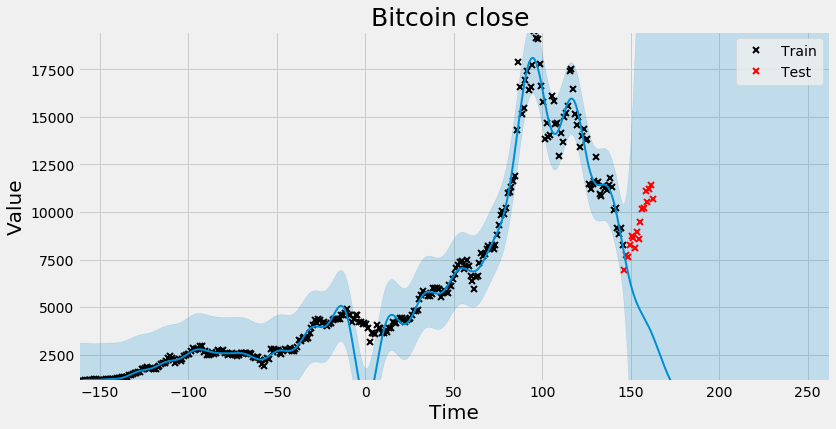

In [156]:
X_pred = np.linspace(date_gp.min(), date_gp.max()+100, 1000)[:, None]
Y_pred_mean, Y_pred_var = m.predict_y(X_pred)
Y_test = info_gp[train_count:]
X_test = date_gp[train_count:]

xlimit = [min(date_gp), max(date_gp)+100]
plot(date_gp_train, info_gp_train, X_test, Y_test, X_pred, Y_pred_mean, Y_pred_var, xlimit, coin+" "+attribute+" ")

## Log normalize

In [157]:
coin = 'Bitcoin'
attribute = 'close'
start_date = '2017-04-01'
end_date = '2018-03-22'
info = dataset[(dataset['name'] == coin) & (dataset['date'] > start_date) & (dataset['date'] < end_date)][attribute]
date = pd.to_datetime(dataset[(dataset['name'] == coin) & (dataset['date'] > start_date) & (dataset['date'] < end_date)]['date'])

date_number = date.index.values.astype(float)
date_mean0 = date_number - date_number.mean(0)
date_gp = np.array(date_mean0, dtype=np.float64).reshape(len(date_mean0), 1)
info_gp = np.array(info, dtype=np.float64).reshape(len(info), 1)

info_gp_log = np.log(info_gp)

info_count = len(info_gp_log)
train_count = int(info_count * 0.90)
info_gp_log_train = info_gp_log[:train_count]
date_gp_train = date_gp[:train_count]

In [158]:
# constant + linear kernel
k_const = gpflow.kernels.Constant(1)
k_linear = gpflow.kernels.Linear(1)
# k = k_const + k_linear
k_periodic = gpflow.kernels.Periodic(1, period=1.2)
k_matern12 = gpflow.kernels.Matern52(1)
k_rbf = gpflow.kernels.RBF(1)
# k = k_rbf * k_linear
# k = k_rbf
k = k_const + k_rbf * k_linear + k_periodic

# condition on data and optimize kernel hyperparameters
m = gpflow.models.GPR(date_gp_train, info_gp_log_train, kern=k)
m.likelihood.variance = 1
gpflow.train.ScipyOptimizer().minimize(m)

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -372.509515
  Number of iterations: 69
  Number of functions evaluations: 96


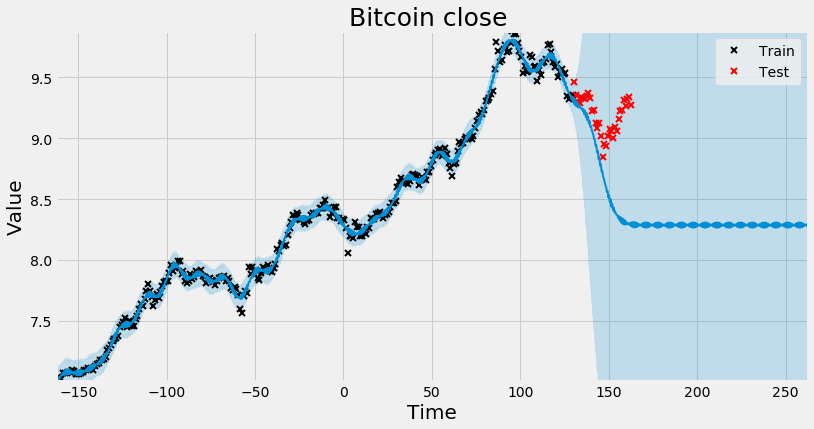

In [159]:
X_pred = np.linspace(date_gp.min(), date_gp.max()+100, 1000)[:, None]
Y_pred_mean, Y_pred_var = m.predict_y(X_pred)
Y_test = info_gp_log[train_count:]
X_test = date_gp[train_count:]

xlimit = [min(date_gp), max(date_gp)+100]
plot(date_gp_train, info_gp_log_train, X_test, Y_test, X_pred, Y_pred_mean, Y_pred_var, xlimit, coin+" "+attribute+" ")

### tanh estimator

In [162]:
coin = 'Bitcoin'
attribute = 'close'
start_date = '2017-04-01'
end_date = '2018-03-22'
info = dataset[(dataset['name'] == coin) & (dataset['date'] > start_date) & (dataset['date'] < end_date)][attribute]
date = pd.to_datetime(dataset[(dataset['name'] == coin) & (dataset['date'] > start_date) & (dataset['date'] < end_date)]['date'])

date_number = date.index.values.astype(float)
date_mean0 = date_number - date_number.mean(0)
date_gp = np.array(date_mean0, dtype=np.float64).reshape(len(date_mean0), 1)
info_gp = np.array(info, dtype=np.float64).reshape(len(info), 1)

info_gp_log = np.log(info_gp)

info_gp_mean = np.mean(info_gp_log)
info_gp_std = np.std(info_gp_log)
info_normalized = 0.5 * (np.tanh((0.01*(info_gp_log - info_gp_mean))/info_gp_std) + 1)

info_count = len(info_normalized)
train_count = int(info_count * 0.90)
info_normalized_train = info_normalized[:train_count]
date_gp_train = date_gp[:train_count]

In [164]:
k_const = gpflow.kernels.Constant(1)
k_linear = gpflow.kernels.Linear(1)
# k = k_const + k_linear
k_periodic = gpflow.kernels.Periodic(1, period=1.9)
k_matern12 = gpflow.kernels.Matern52(1)
k_rbf = gpflow.kernels.RBF(1)
# k = k_rbf * k_linear
k = k_const + k_rbf * k_linear
# k = k_periodic

# condition on data and optimize kernel hyperparameters
m = gpflow.models.GPR(date_gp_train, info_normalized_train, kern=k)
m.likelihood.variance = 1
gpflow.train.ScipyOptimizer().minimize(m)

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -1679.939726
  Number of iterations: 26
  Number of functions evaluations: 67


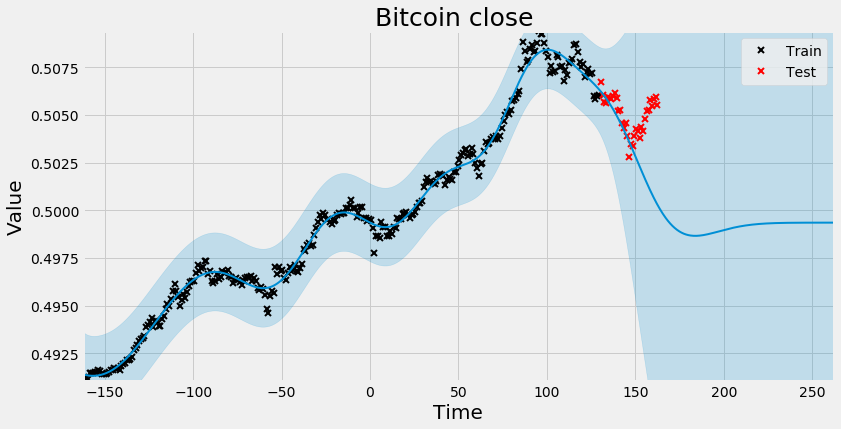

In [165]:
X_pred = np.linspace(date_gp.min(), date_gp.max()+100, 1000)[:, None]
Y_pred_mean, Y_pred_var = m.predict_y(X_pred)
Y_test = info_normalized[train_count:]
X_test = date_gp[train_count:]

xlimit = [min(date_gp), max(date_gp)+100]
plot(date_gp_train, info_normalized_train, X_test, Y_test, X_pred, Y_pred_mean, Y_pred_var, xlimit, coin+" "+attribute+" ")

In [166]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [167]:
dataset = pd.read_csv('crypto-markets.csv')

In [168]:
dataset.head()

slug symbol     name        date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin  2013-04-30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin  2013-05-01        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin  2013-05-02        1  116.38  125.60   92.28   

    close  volume      market  close_ratio  spread  
0  134.21       0  1500520000       0.5438    3.88  
1  144.54       0  1491160000       0.7813   13.49  
2  139.00       0  1597780000       0.3843   12.88  
3  116.99       0  1542820000       0.2882   32.17  
4  105.21       0  1292190000       0.3881   33.32

In [169]:
dataset.describe()

ranknow          open          high           low         close  \
count  702166.000000  7.021660e+05  7.021660e+05  7.021660e+05  7.021660e+05   
mean      734.561943  2.696117e+02  3.284954e+02  2.210024e+02  2.694796e+02   
std       411.195482  1.219343e+04  1.558344e+04  9.686538e+03  1.217104e+04   
min         1.000000  2.500000e-09  3.200000e-09  9.200000e-14  0.000000e+00   
25%       397.000000  5.280000e-04  6.210000e-04  4.550000e-04  5.290000e-04   
50%       746.000000  8.753000e-03  1.016400e-02  7.630000e-03  8.768000e-03   
75%      1032.000000  1.333997e-01  1.523455e-01  1.170855e-01  1.336785e-01   
max      1516.000000  2.298390e+06  2.926100e+06  2.030590e+06  2.300740e+06   

             volume        market   close_ratio        spread  
count  7.021660e+05  7.021660e+05  7.021660e+05  7.021660e+05  
mean   5.544493e+06  1.202024e+08          -inf  1.074927e+02  
std    1.673788e+08  3.074096e+09           NaN  7.207118e+03  
min    0.000000e+00  0.000000e+00          -inf  0.000000e+00  
25%    2.700000e+01  7.095000e+03  1.429000e-01  0.000000e+00  
50%    5.030000e+02  9.402450e+04  4.331000e-01  0.000000e+00  
75%    1.325400e+04  1.326118e+06  7.703000e-01  3.000000e-02  
max    2.384090e+10  3.261410e+11  1.000000e+00  1.770563e+06

In [170]:
dataset.groupby(['ranknow'])

In [172]:
dataset['name'].describe()

count       702166
unique        1514
top       HempCoin
freq          2030
Name: name, dtype: object

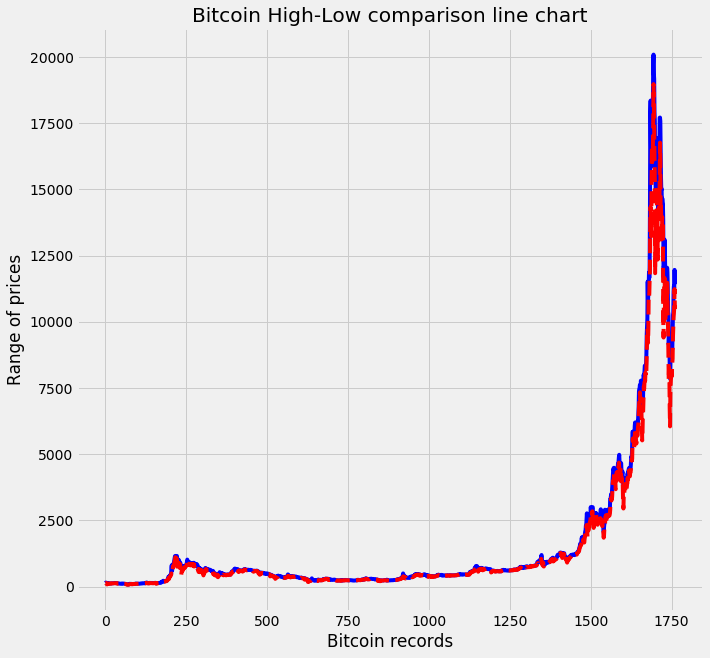

In [173]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
d = dataset[dataset['name'] == 'Bitcoin']
plt.plot(d['high'],'b',d['low'],'r--')
plt.title('Bitcoin High-Low comparison line chart')
plt.ylabel('Range of prices')
plt.xlabel('Bitcoin records')
plt.show()

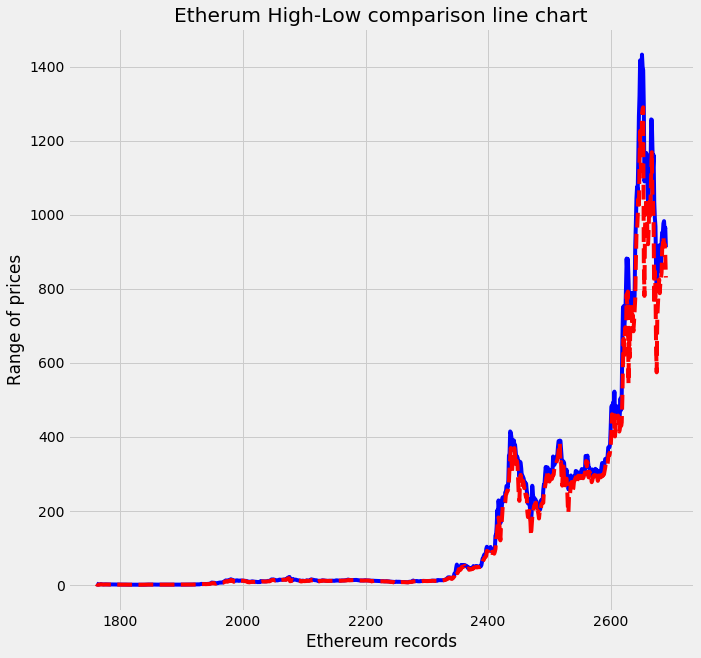

In [174]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
d = dataset[dataset['name'] == 'Ethereum']
plt.plot(d['high'],'b',d['low'],'r--')
plt.title('Etherum High-Low comparison line chart')
plt.ylabel('Range of prices')
plt.xlabel('Ethereum records')
plt.show()

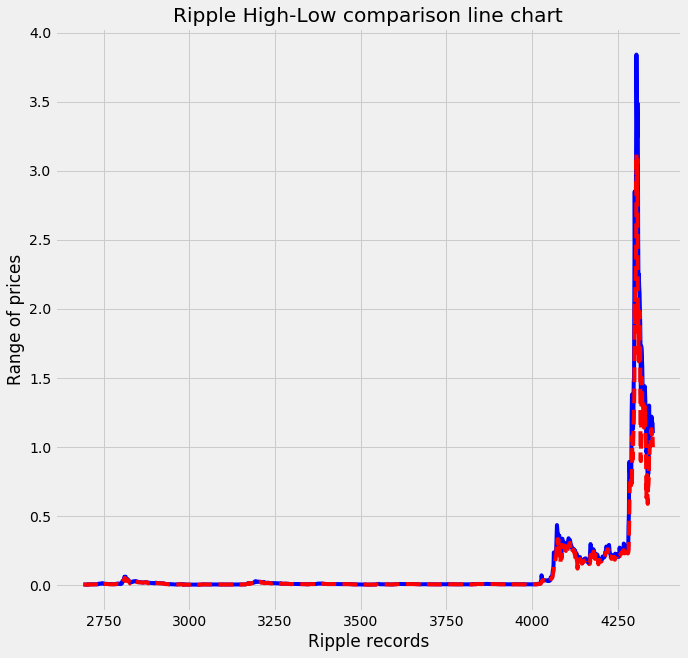

In [175]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
d = dataset[dataset['name'] == 'Ripple']
plt.plot(d['high'],'b',d['low'],'r--')
plt.title('Ripple High-Low comparison line chart')
plt.ylabel('Range of prices')
plt.xlabel('Ripple records')
plt.show()

# Min-Max Normalization

In [177]:
import pandas as pd
scaler = MinMaxScaler()
dat = dataset[['open','high', 'low', 'close', 'market', 'volume']]
scaler.fit(dat)
dat = scaler.transform(dat)
commonScaleData = pd.DataFrame(dat,columns=['open','high', 'low', 'close', 'market', 'volume'])
namesDF = pd.DataFrame(dataset['name'],columns = ['name'])
dateDf = pd.DataFrame(pd.to_datetime(dataset['date']),columns = ['date'])
MinMaxNormalizeData=pd.concat([ dateDf, namesDF, commonScaleData ], axis=1)

In [178]:
MinMaxNormalizeData

date     name          open          high           low  \
0      2013-04-28  Bitcoin  5.886729e-05  4.647141e-05  6.505498e-05   
1      2013-04-29  Bitcoin  5.849312e-05  5.040498e-05  6.599067e-05   
2      2013-04-30  Bitcoin  6.265255e-05  5.021359e-05  6.601530e-05   
3      2013-05-01  Bitcoin  6.047712e-05  4.780766e-05  5.304862e-05   
4      2013-05-02  Bitcoin  5.063544e-05  4.292403e-05  4.544492e-05   
5      2013-05-03  Bitcoin  4.622801e-05  3.695362e-05  3.895420e-05   
6      2013-05-04  Bitcoin  4.268205e-05  3.930146e-05  4.555326e-05   
7      2013-05-05  Bitcoin  4.912134e-05  4.060012e-05  5.276299e-05   
8      2013-05-06  Bitcoin  5.046141e-05  4.260278e-05  5.251676e-05   
9      2013-05-07  Bitcoin  4.883853e-05  3.876833e-05  4.811409e-05   
10     2013-05-08  Bitcoin  4.768555e-05  3.956803e-05  5.397446e-05   
11     2013-05-09  Bitcoin  4.925187e-05  3.877516e-05  5.380702e-05   
12     2013-05-10  Bitcoin  4.907783e-05  4.169372e-05  5.493477e-05   
13     2013-05-11  Bitcoin  5.120976e-05  4.055911e-05  5.565378e-05   
14     2013-05-12  Bitcoin  5.031348e-05  4.013875e-05  5.586554e-05   
15     2013-05-13  Bitcoin  4.995671e-05  4.056594e-05  5.638755e-05   
16     2013-05-14  Bitcoin  5.133158e-05  4.094187e-05  5.429456e-05   
17     2013-05-15  Bitcoin  4.846871e-05  3.957828e-05  5.097041e-05   
18     2013-05-16  Bitcoin  4.969566e-05  4.058645e-05  5.525488e-05   
19     2013-05-17  Bitcoin  5.143165e-05  4.282150e-05  5.740696e-05   
20     2013-05-18  Bitcoin  5.373327e-05  4.280442e-05  6.022880e-05   
21     2013-05-19  Bitcoin  5.360709e-05  4.254810e-05  5.888436e-05   
22     2013-05-20  Bitcoin  5.329818e-05  4.224736e-05  5.915522e-05   
23     2013-05-21  Bitcoin  5.308934e-05  4.203547e-05  5.969201e-05   
24     2013-05-22  Bitcoin  5.346786e-05  4.237723e-05  6.008106e-05   
25     2013-05-23  Bitcoin  5.386379e-05  4.337856e-05  6.062277e-05   
26     2013-05-24  Bitcoin  5.495151e-05  4.574348e-05  6.191304e-05   
27     2013-05-25  Bitcoin  5.791010e-05  4.552818e-05  6.347909e-05   
28     2013-05-26  Bitcoin  5.742716e-05  4.647825e-05  6.432613e-05   
29     2013-05-27  Bitcoin  5.808414e-05  4.629712e-05  6.141072e-05   
...           ...      ...           ...           ...           ...   
702136 2017-12-02     OCOW  2.101905e-09  1.683468e-09  2.329372e-09   
702137 2017-12-03     OCOW  2.092768e-09  1.684835e-09  2.353011e-09   
702138 2017-12-09     OCOW  4.020195e-10  3.168028e-10  4.003762e-10   
702139 2017-12-10     OCOW  3.924475e-10  3.082590e-10  3.910194e-10   
702140 2017-12-12     OCOW  2.628796e-09  2.124328e-09  2.940032e-09   
702141 2017-12-13     OCOW  2.630971e-09  2.093912e-09  2.746985e-09   
702142 2017-12-14     OCOW  2.493483e-09  2.040941e-09  2.188526e-09   
702143 2017-12-15     OCOW  1.948754e-09  1.667748e-09  3.910194e-10   
702144 2017-12-16     OCOW  3.872167e-11  1.619219e-09  4.382963e-11   
702145 2017-12-17     OCOW  2.493039e-10  2.532370e-10  7.534756e-11   
702146 2017-12-18     OCOW  8.310056e-11  9.022139e-11  4.629196e-11   
702147 2017-12-19     OCOW  7.309356e-11  7.655131e-11  5.121664e-11   
702148 2017-12-20     OCOW  6.917777e-11  2.511865e-10  2.462339e-11   
702149 2017-12-21     OCOW  7.178830e-11  8.304460e-11  6.008106e-11   
702150 2017-12-22     OCOW  5.481990e-11  4.784416e-11  6.402080e-12   
702151 2017-12-23     OCOW  6.090133e-12  1.059321e-11  6.894548e-12   
702152 2017-12-24     OCOW  6.525220e-12  9.909709e-12  6.402080e-12   
702153 2017-12-25     OCOW  1.218135e-11  1.435248e-11  6.402080e-12   
702154 2017-12-26     OCOW  6.090133e-12  5.466936e-12  6.894548e-12   
702155 2017-12-27     OCOW  6.960307e-12  1.093496e-11  7.387016e-12   
702156 2017-12-28     OCOW  6.960307e-12  5.466936e-12  6.894548e-12   
702157 2017-12-29     OCOW  6.525220e-12  1.025146e-11  6.894548e-12   
702158 2017-12-30     OCOW  6.090133e-12  9.909709e-12  6.402080e-12   
702159 2017-12-31     OCOW  1.087609e-11  9.567957e-1

In [180]:
dataset

slug symbol     name        date  ranknow        open        high  \
0       bitcoin    BTC  Bitcoin  2013-04-28        1  135.300000  135.980000   
1       bitcoin    BTC  Bitcoin  2013-04-29        1  134.440000  147.490000   
2       bitcoin    BTC  Bitcoin  2013-04-30        1  144.000000  146.930000   
3       bitcoin    BTC  Bitcoin  2013-05-01        1  139.000000  139.890000   
4       bitcoin    BTC  Bitcoin  2013-05-02        1  116.380000  125.600000   
5       bitcoin    BTC  Bitcoin  2013-05-03        1  106.250000  108.130000   
6       bitcoin    BTC  Bitcoin  2013-05-04        1   98.100000  115.000000   
7       bitcoin    BTC  Bitcoin  2013-05-05        1  112.900000  118.800000   
8       bitcoin    BTC  Bitcoin  2013-05-06        1  115.980000  124.660000   
9       bitcoin    BTC  Bitcoin  2013-05-07        1  112.250000  113.440000   
10      bitcoin    BTC  Bitcoin  2013-05-08        1  109.600000  115.780000   
11      bitcoin    BTC  Bitcoin  2013-05-09        1  113.200000  113.460000   
12      bitcoin    BTC  Bitcoin  2013-05-10        1  112.800000  122.000000   
13      bitcoin    BTC  Bitcoin  2013-05-11        1  117.700000  118.680000   
14      bitcoin    BTC  Bitcoin  2013-05-12        1  115.640000  117.450000   
15      bitcoin    BTC  Bitcoin  2013-05-13        1  114.820000  118.700000   
16      bitcoin    BTC  Bitcoin  2013-05-14        1  117.980000  119.800000   
17      bitcoin    BTC  Bitcoin  2013-05-15        1  111.400000  115.810000   
18      bitcoin    BTC  Bitcoin  2013-05-16        1  114.220000  118.760000   
19      bitcoin    BTC  Bitcoin  2013-05-17        1  118.210000  125.300000   
20      bitcoin    BTC  Bitcoin  2013-05-18        1  123.500000  125.250000   
21      bitcoin    BTC  Bitcoin  2013-05-19        1  123.210000  124.500000   
22      bitcoin    BTC  Bitcoin  2013-05-20        1  122.500000  123.620000   
23      bitcoin    BTC  Bitcoin  2013-05-21        1  122.020000  123.000000   
24      bitcoin    BTC  Bitcoin  2013-05-22        1  122.890000  124.000000   
25      bitcoin    BTC  Bitcoin  2013-05-23        1  123.800000  126.930000   
26      bitcoin    BTC  Bitcoin  2013-05-24        1  126.300000  133.850000   
27      bitcoin    BTC  Bitcoin  2013-05-25        1  133.100000  133.220000   
28      bitcoin    BTC  Bitcoin  2013-05-26        1  131.990000  136.000000   
29      bitcoin    BTC  Bitcoin  2013-05-27        1  133.500000  135.470000   
...         ...    ...      ...         ...      ...         ...         ...   
702136     ocow   OCOW     OCOW  2017-12-02     1516    0.004831    0.004926   
702137     ocow   OCOW     OCOW  2017-12-03     1516    0.004810    0.004930   
702138     ocow   OCOW     OCOW  2017-12-09     1516    0.000924    0.000927   
702139     ocow   OCOW     OCOW  2017-12-10     1516    0.000902    0.000902   
702140     ocow   OCOW     OCOW  2017-12-12     1516    0.006042    0.006216   
702141     ocow   OCOW     OCOW  2017-12-13     1516    0.006047    0.006127   
702142     ocow   OCOW     OCOW  2017-12-14     1516    0.005731    0.005972   
702143     ocow   OCOW     OCOW  2017-12-15     1516    0.004479    0.004880   
702144     ocow   OCOW     OCOW  2017-12-16     1516    0.000089    0.004738   
702145     ocow   OCOW     OCOW  2017-12-17     1516    0.000573    0.000741   
702146     ocow   OCOW     OCOW  2017-12-18     1516    0.000191    0.000264   
702147     ocow   OCOW     OCOW  2017-12-19     1516    0.000168    0.000224   
702148     ocow   OCOW     OCOW  2017-12-20     1516    0.000159    0.000735   
702149     ocow   OCOW     OCOW  2017-12-21     1516    0.000165    0.000243   
702150     ocow   OCOW     OCOW  2017-12-22     1516    0.000126    0.000140   
702151     ocow   OCOW     OCOW  2017-12-23     1516    0.000014    0.000031   
702152     ocow   OCOW     OCOW  2017-12-24     1516    0.000015    0.000029   
702153     ocow   OCOW     OCOW  2017-12-25     1516    0.000028    0.000042   
702154     

In [181]:
# grouping data first on the basis on date and then on the basis of name, then depicting the market mean of this data
#  
marketData = dataset.groupby(['date', 'name']).mean().unstack()
marketData

ranknow                                                             \
name            0x  2GIVE 300 Token 42-coin 808Coin    8Bit ACChain AI Doctor   
date                                                                            
2013-04-28     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-04-29     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-04-30     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-01     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-02     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-03     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-04     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-05     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-06     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-07     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-08     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-09     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-10     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-11     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-12     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-13     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-14     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-15     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-16     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-17     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-18     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-19     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-20     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-21     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-22     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-23     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-24     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-25     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-26     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-27     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
...            ...    ...       ...     ...     ...     ...     ...       ...   
2018-01-23    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-24    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-25    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-26    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-27    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-28    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-29    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-30    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-31    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-01    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-02    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-03    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-04    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-05    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-06    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-07    44.0  552.0     909.0   660.

In [182]:
plt.show()

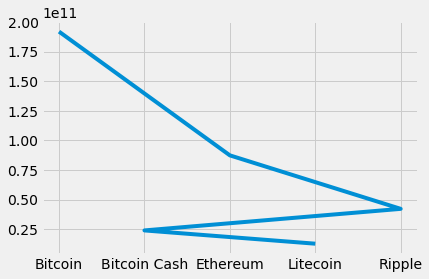

In [183]:
# Ordered most frequent currencies
marketData = dataset.groupby(['name'])['market']
marketData = marketData.last()
OrderedmarketData = marketData.sort_values(ascending=False)
plt.plot(OrderedmarketData.head(5))
plt.show()
top_5_frquennt_currencies_names = OrderedmarketData.head(5).index
top_5_frequent_currencies_allData = dataset[dataset['name'].isin(top_5_frquennt_currencies_names)]

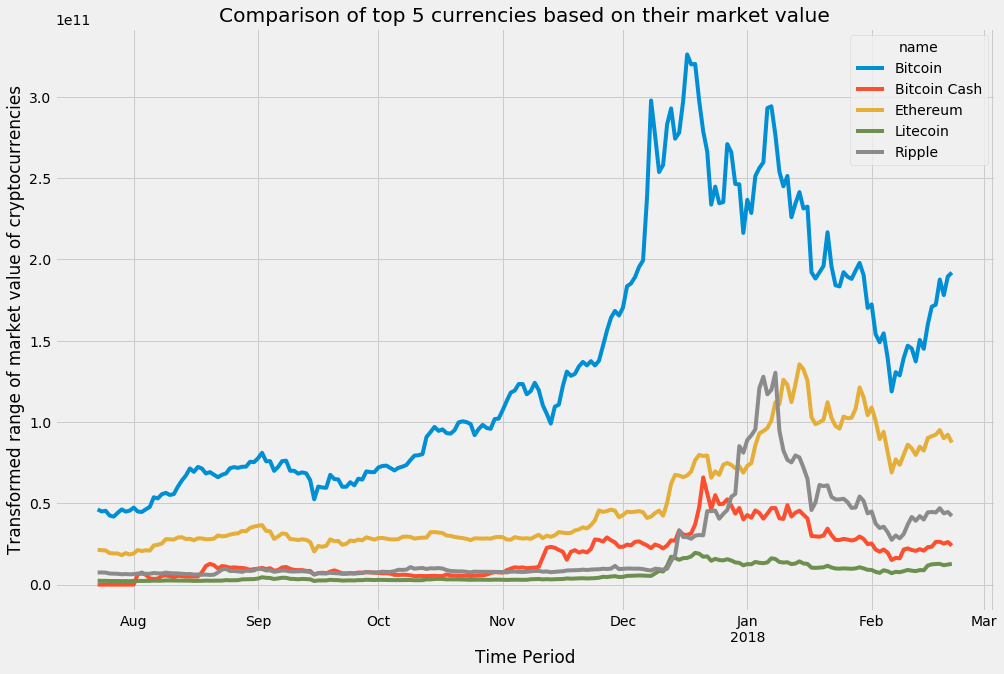

In [184]:
import matplotlib.dates as xaxisdates
top_5_frequent_currencies_allData['date'] = pd.to_datetime(top_5_frequent_currencies_allData['date'])
top_5_frequent_currencies_allData
marketCapTrendOfTop5Currencies = top_5_frequent_currencies_allData.groupby(['date','name'])['market'].mean().unstack()
plt.style.use('fivethirtyeight')

marketCapTrendOfTop5Currencies_dropNA = marketCapTrendOfTop5Currencies.dropna(axis=0, how='any')
marketCapTrendOfTop5Currencies_dropNA.plot(legend=True,figsize=(15, 10), 
                                            title='Comparison of top 5 currencies based on their market value')
plt.ylabel('Transformed range of market value of cryptocurrencies')
plt.xlabel('Time Period')
plt.show()

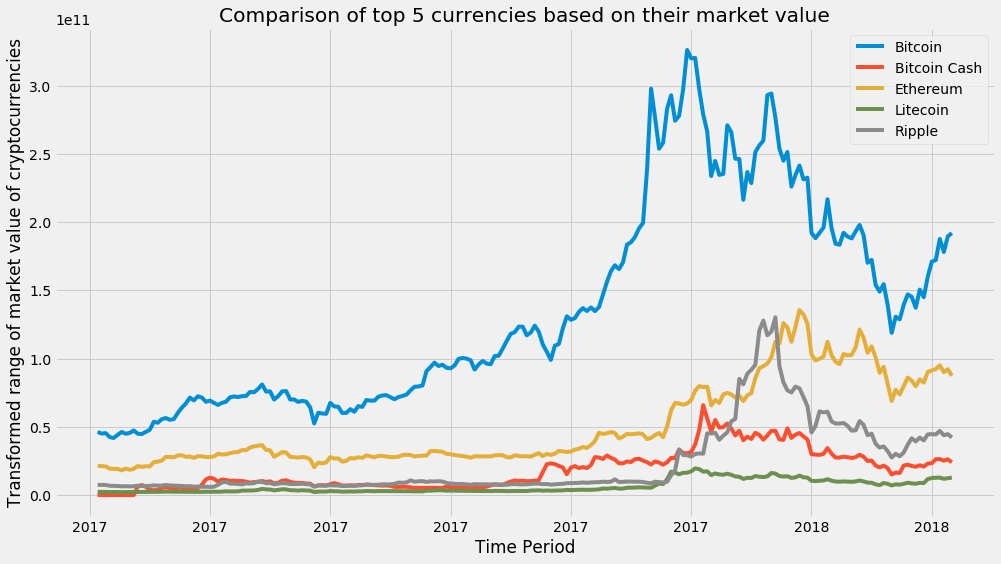

In [185]:
import matplotlib.pyplot as plt
import matplotlib.dates as xaxisdates
fig,ax = plt.subplots(figsize=(15, 10))
ax.xaxis.set_major_locator(xaxisdates.DayLocator(interval = 30))
plt.xticks(fontsize = 8)
plt.gcf().autofmt_xdate()
marketCapTrendOfTop5Currencies = top_5_frequent_currencies_allData.groupby(['date','name'])['market'].mean().unstack()
marketCapTrendOfTop5Currencies_dropNA = marketCapTrendOfTop5Currencies.dropna(axis=0, how='any')
plt.plot(marketCapTrendOfTop5Currencies_dropNA.index,marketCapTrendOfTop5Currencies_dropNA.values)
plt.title('Comparison of top 5 currencies based on their market value')
plt.ylabel('Transformed range of market value of cryptocurrencies')
plt.xlabel('Time Period')
plt.legend(marketCapTrendOfTop5Currencies_dropNA.columns)
plt.show()

In [186]:
# marketCapTrendOfTop5Currencies_dropNA.index

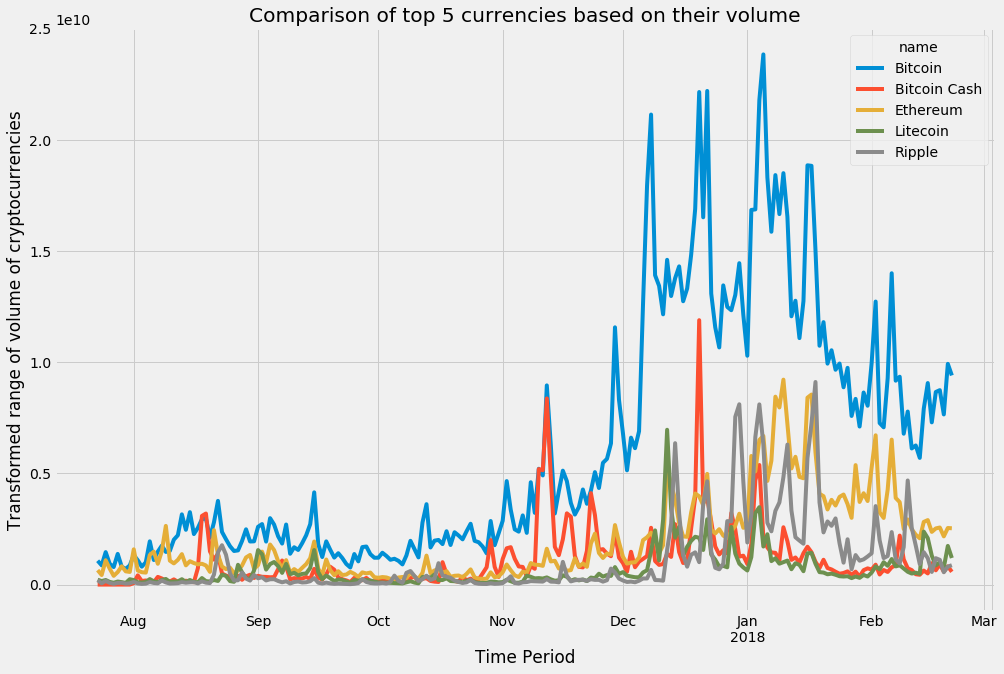

In [187]:
VolumeTrendOfTop5Currencies = top_5_frequent_currencies_allData.groupby(['date','name'])['volume'].mean().unstack()
VolumeTrendOfTop5Currencies_dropNA = VolumeTrendOfTop5Currencies.dropna(axis=0, how='any')
plt.style.use('fivethirtyeight')
VolumeTrendOfTop5Currencies_dropNA.plot(legend=True,figsize=(15, 10), 
                                        title='Comparison of top 5 currencies based on their volume')
plt.ylabel('Transformed range of volume of cryptocurrencies')
plt.xlabel('Time Period')
plt.show()

In [188]:
top5CurrenciesPricePerUnit = top_5_frequent_currencies_allData.groupby(['date','name'])['close'].mean().unstack()
top5CurrenciesPricePerUnit_dropNA = top5CurrenciesPricePerUnit.dropna(axis=0, how='any')
plt.style.use('fivethirtyeight')
top5CurrenciesPricePerUnit_dropNA.plot(legend=True,figsize=(15, 10), 
                                        title='Comparison of top 5 currencies based on their close values')
plt.ylabel('Transformed range of volume of cryptocurrencies')
plt.xlabel('Time Period')
plt.show()

In [189]:
FluctuationOfTop5Currencies = top_5_frequent_currencies_allData.groupby(['date','name'])['high','low'].mean().unstack()
FluctuationOfTop5Currencies_dropNA = FluctuationOfTop5Currencies.dropna(axis=0, how='any')
FluctuationOfTop5Currencies_dropNA.plot(legend=True,figsize=(15, 10), 
                                        title='Comparison of top 5 currencies based on mean of high and low daily values')
plt.ylabel('Transformed range of volume of cryptocurrencies')
plt.xlabel('Time Period')
plt.show()

In [190]:
dataset

slug symbol     name        date  ranknow        open        high  \
0       bitcoin    BTC  Bitcoin  2013-04-28        1  135.300000  135.980000   
1       bitcoin    BTC  Bitcoin  2013-04-29        1  134.440000  147.490000   
2       bitcoin    BTC  Bitcoin  2013-04-30        1  144.000000  146.930000   
3       bitcoin    BTC  Bitcoin  2013-05-01        1  139.000000  139.890000   
4       bitcoin    BTC  Bitcoin  2013-05-02        1  116.380000  125.600000   
5       bitcoin    BTC  Bitcoin  2013-05-03        1  106.250000  108.130000   
6       bitcoin    BTC  Bitcoin  2013-05-04        1   98.100000  115.000000   
7       bitcoin    BTC  Bitcoin  2013-05-05        1  112.900000  118.800000   
8       bitcoin    BTC  Bitcoin  2013-05-06        1  115.980000  124.660000   
9       bitcoin    BTC  Bitcoin  2013-05-07        1  112.250000  113.440000   
10      bitcoin    BTC  Bitcoin  2013-05-08        1  109.600000  115.780000   
11      bitcoin    BTC  Bitcoin  2013-05-09        1  113.200000  113.460000   
12      bitcoin    BTC  Bitcoin  2013-05-10        1  112.800000  122.000000   
13      bitcoin    BTC  Bitcoin  2013-05-11        1  117.700000  118.680000   
14      bitcoin    BTC  Bitcoin  2013-05-12        1  115.640000  117.450000   
15      bitcoin    BTC  Bitcoin  2013-05-13        1  114.820000  118.700000   
16      bitcoin    BTC  Bitcoin  2013-05-14        1  117.980000  119.800000   
17      bitcoin    BTC  Bitcoin  2013-05-15        1  111.400000  115.810000   
18      bitcoin    BTC  Bitcoin  2013-05-16        1  114.220000  118.760000   
19      bitcoin    BTC  Bitcoin  2013-05-17        1  118.210000  125.300000   
20      bitcoin    BTC  Bitcoin  2013-05-18        1  123.500000  125.250000   
21      bitcoin    BTC  Bitcoin  2013-05-19        1  123.210000  124.500000   
22      bitcoin    BTC  Bitcoin  2013-05-20        1  122.500000  123.620000   
23      bitcoin    BTC  Bitcoin  2013-05-21        1  122.020000  123.000000   
24      bitcoin    BTC  Bitcoin  2013-05-22        1  122.890000  124.000000   
25      bitcoin    BTC  Bitcoin  2013-05-23        1  123.800000  126.930000   
26      bitcoin    BTC  Bitcoin  2013-05-24        1  126.300000  133.850000   
27      bitcoin    BTC  Bitcoin  2013-05-25        1  133.100000  133.220000   
28      bitcoin    BTC  Bitcoin  2013-05-26        1  131.990000  136.000000   
29      bitcoin    BTC  Bitcoin  2013-05-27        1  133.500000  135.470000   
...         ...    ...      ...         ...      ...         ...         ...   
702136     ocow   OCOW     OCOW  2017-12-02     1516    0.004831    0.004926   
702137     ocow   OCOW     OCOW  2017-12-03     1516    0.004810    0.004930   
702138     ocow   OCOW     OCOW  2017-12-09     1516    0.000924    0.000927   
702139     ocow   OCOW     OCOW  2017-12-10     1516    0.000902    0.000902   
702140     ocow   OCOW     OCOW  2017-12-12     1516    0.006042    0.006216   
702141     ocow   OCOW     OCOW  2017-12-13     1516    0.006047    0.006127   
702142     ocow   OCOW     OCOW  2017-12-14     1516    0.005731    0.005972   
702143     ocow   OCOW     OCOW  2017-12-15     1516    0.004479    0.004880   
702144     ocow   OCOW     OCOW  2017-12-16     1516    0.000089    0.004738   
702145     ocow   OCOW     OCOW  2017-12-17     1516    0.000573    0.000741   
702146     ocow   OCOW     OCOW  2017-12-18     1516    0.000191    0.000264   
702147     ocow   OCOW     OCOW  2017-12-19     1516    0.000168    0.000224   
702148     ocow   OCOW     OCOW  2017-12-20     1516    0.000159    0.000735   
702149     ocow   OCOW     OCOW  2017-12-21     1516    0.000165    0.000243   
702150     ocow   OCOW     OCOW  2017-12-22     1516    0.000126    0.000140   
702151     ocow   OCOW     OCOW  2017-12-23     1516    0.000014    0.000031   
702152     ocow   OCOW     OCOW  2017-12-24     1516    0.000015    0.000029   
702153     ocow   OCOW     OCOW  2017-12-25     1516    0.000028    0.000042   
702154     

In [191]:
dataset['date']

0         2013-04-28
1         2013-04-29
2         2013-04-30
3         2013-05-01
4         2013-05-02
5         2013-05-03
6         2013-05-04
7         2013-05-05
8         2013-05-06
9         2013-05-07
10        2013-05-08
11        2013-05-09
12        2013-05-10
13        2013-05-11
14        2013-05-12
15        2013-05-13
16        2013-05-14
17        2013-05-15
18        2013-05-16
19        2013-05-17
20        2013-05-18
21        2013-05-19
22        2013-05-20
23        2013-05-21
24        2013-05-22
25        2013-05-23
26        2013-05-24
27        2013-05-25
28        2013-05-26
29        2013-05-27
             ...    
702136    2017-12-02
702137    2017-12-03
702138    2017-12-09
702139    2017-12-10
702140    2017-12-12
702141    2017-12-13
702142    2017-12-14
702143    2017-12-15
702144    2017-12-16
702145    2017-12-17
702146    2017-12-18
702147    2017-12-19
702148    2017-12-20
702149    2017-12-21
702150    2017-12-22
702151    2017-12-23
702152    201

In [192]:
dataset['year'] = pd.to_datetime(dataset['date']).dt.strftime('%Y')

In [193]:
dataset

slug symbol     name        date  ranknow        open        high  \
0       bitcoin    BTC  Bitcoin  2013-04-28        1  135.300000  135.980000   
1       bitcoin    BTC  Bitcoin  2013-04-29        1  134.440000  147.490000   
2       bitcoin    BTC  Bitcoin  2013-04-30        1  144.000000  146.930000   
3       bitcoin    BTC  Bitcoin  2013-05-01        1  139.000000  139.890000   
4       bitcoin    BTC  Bitcoin  2013-05-02        1  116.380000  125.600000   
5       bitcoin    BTC  Bitcoin  2013-05-03        1  106.250000  108.130000   
6       bitcoin    BTC  Bitcoin  2013-05-04        1   98.100000  115.000000   
7       bitcoin    BTC  Bitcoin  2013-05-05        1  112.900000  118.800000   
8       bitcoin    BTC  Bitcoin  2013-05-06        1  115.980000  124.660000   
9       bitcoin    BTC  Bitcoin  2013-05-07        1  112.250000  113.440000   
10      bitcoin    BTC  Bitcoin  2013-05-08        1  109.600000  115.780000   
11      bitcoin    BTC  Bitcoin  2013-05-09        1  113.200000  113.460000   
12      bitcoin    BTC  Bitcoin  2013-05-10        1  112.800000  122.000000   
13      bitcoin    BTC  Bitcoin  2013-05-11        1  117.700000  118.680000   
14      bitcoin    BTC  Bitcoin  2013-05-12        1  115.640000  117.450000   
15      bitcoin    BTC  Bitcoin  2013-05-13        1  114.820000  118.700000   
16      bitcoin    BTC  Bitcoin  2013-05-14        1  117.980000  119.800000   
17      bitcoin    BTC  Bitcoin  2013-05-15        1  111.400000  115.810000   
18      bitcoin    BTC  Bitcoin  2013-05-16        1  114.220000  118.760000   
19      bitcoin    BTC  Bitcoin  2013-05-17        1  118.210000  125.300000   
20      bitcoin    BTC  Bitcoin  2013-05-18        1  123.500000  125.250000   
21      bitcoin    BTC  Bitcoin  2013-05-19        1  123.210000  124.500000   
22      bitcoin    BTC  Bitcoin  2013-05-20        1  122.500000  123.620000   
23      bitcoin    BTC  Bitcoin  2013-05-21        1  122.020000  123.000000   
24      bitcoin    BTC  Bitcoin  2013-05-22        1  122.890000  124.000000   
25      bitcoin    BTC  Bitcoin  2013-05-23        1  123.800000  126.930000   
26      bitcoin    BTC  Bitcoin  2013-05-24        1  126.300000  133.850000   
27      bitcoin    BTC  Bitcoin  2013-05-25        1  133.100000  133.220000   
28      bitcoin    BTC  Bitcoin  2013-05-26        1  131.990000  136.000000   
29      bitcoin    BTC  Bitcoin  2013-05-27        1  133.500000  135.470000   
...         ...    ...      ...         ...      ...         ...         ...   
702136     ocow   OCOW     OCOW  2017-12-02     1516    0.004831    0.004926   
702137     ocow   OCOW     OCOW  2017-12-03     1516    0.004810    0.004930   
702138     ocow   OCOW     OCOW  2017-12-09     1516    0.000924    0.000927   
702139     ocow   OCOW     OCOW  2017-12-10     1516    0.000902    0.000902   
702140     ocow   OCOW     OCOW  2017-12-12     1516    0.006042    0.006216   
702141     ocow   OCOW     OCOW  2017-12-13     1516    0.006047    0.006127   
702142     ocow   OCOW     OCOW  2017-12-14     1516    0.005731    0.005972   
702143     ocow   OCOW     OCOW  2017-12-15     1516    0.004479    0.004880   
702144     ocow   OCOW     OCOW  2017-12-16     1516    0.000089    0.004738   
702145     ocow   OCOW     OCOW  2017-12-17     1516    0.000573    0.000741   
702146     ocow   OCOW     OCOW  2017-12-18     1516    0.000191    0.000264   
702147     ocow   OCOW     OCOW  2017-12-19     1516    0.000168    0.000224   
702148     ocow   OCOW     OCOW  2017-12-20     1516    0.000159    0.000735   
702149     ocow   OCOW     OCOW  2017-12-21     1516    0.000165    0.000243   
702150     ocow   OCOW     OCOW  2017-12-22     1516    0.000126    0.000140   
702151     ocow   OCOW     OCOW  2017-12-23     1516    0.000014    0.000031   
702152     ocow   OCOW     OCOW  2017-12-24     1516    0.000015    0.000029   
702153     ocow   OCOW     OCOW  2017-12-25     1516    0.000028    0.000042   
702154     

In [194]:
dataset_indexed = dataset.set_index(['name', 'year']).sort_index()

In [195]:
dataset_temp = dataset_indexed[dataset_indexed['market'] != 0]
dataset_temp

slug symbol        date  ranknow      open      high  \
name     year                                                             
0x       2017        0x    ZRX  2017-08-16       44  0.111725  0.280031   
         2017        0x    ZRX  2017-08-17       44  0.223022  0.238935   
         2017        0x    ZRX  2017-08-18       44  0.205558  0.350260   
         2017        0x    ZRX  2017-08-19       44  0.294578  0.543728   
         2017        0x    ZRX  2017-08-20       44  0.471296  0.475262   
         2017        0x    ZRX  2017-08-21       44  0.422273  0.443680   
         2017        0x    ZRX  2017-08-22       44  0.351547  0.375577   
         2017        0x    ZRX  2017-08-23       44  0.364010  0.410874   
         2017        0x    ZRX  2017-08-24       44  0.382705  0.392537   
         2017        0x    ZRX  2017-08-25       44  0.387431  0.394479   
         2017        0x    ZRX  2017-08-26       44  0.362022  0.377722   
         2017        0x    ZRX  2017-08-27       44  0.354806  0.356997   
         2017        0x    ZRX  2017-08-28       44  0.352459  0.354823   
         2017        0x    ZRX  2017-08-29       44  0.341101  0.372469   
         2017        0x    ZRX  2017-08-30       44  0.361106  0.364266   
         2017        0x    ZRX  2017-08-31       44  0.330970  0.374500   
         2017        0x    ZRX  2017-09-01       44  0.372777  0.402174   
         2017        0x    ZRX  2017-09-02       44  0.384540  0.391341   
         2017        0x    ZRX  2017-09-03       44  0.307518  0.328170   
         2017        0x    ZRX  2017-09-04       44  0.285917  0.286994   
         2017        0x    ZRX  2017-09-05       44  0.236484  0.247325   
         2017        0x    ZRX  2017-09-06       44  0.236535  0.258303   
         2017        0x    ZRX  2017-09-07       44  0.256450  0.331923   
         2017        0x    ZRX  2017-09-08       44  0.309705  0.313270   
         2017        0x    ZRX  2017-09-09       44  0.258422  0.259154   
         2017        0x    ZRX  2017-09-10       44  0.258124  0.258124   
         2017        0x    ZRX  2017-09-11       44  0.246839  0.275266   
         2017        0x    ZRX  2017-09-12       44  0.275405  0.289507   
         2017        0x    ZRX  2017-09-13       44  0.257031  0.257911   
         2017        0x    ZRX  2017-09-14       44  0.223408  0.228707   
...                 ...    ...         ...      ...       ...       ...   
vTorrent 2018  vtorrent    VTR  2018-01-23      518  0.770872  0.807709   
         2018  vtorrent    VTR  2018-01-24      518  0.769083  0.844690   
         2018  vtorrent    VTR  2018-01-25      518  0.798719  0.823876   
         2018  vtorrent    VTR  2018-01-26      518  0.778881  0.805300   
         2018  vtorrent    VTR  2018-01-27      518  0.765669  0.813012   
         2018  vtorrent    VTR  2018-01-28      518  0.802742  0.828805   
         2018  vtorrent    VTR  2018-01-29      518  0.799810  0.809576   
         2018  vtorrent    VTR  2018-01-30      518  0.748255  0.749908   
         2018  vtorrent    VTR  2018-01-31      518  0.618437  0.640980   
         2018  vtorrent    VTR  2018-02-01      518  0.616226  0.628010   
         2018  vtorrent    VTR  2018-02-02      518  0.475868  0.493326   
         2018  vtorrent    VTR  2018-02-03      518  0.473092  0.519364   
         2018  vtorrent    VTR  2018-02-04      518  0.497990  0.513539   
         2018  vtorrent    VTR  2018-02-05      518  0.427958  0.558929   
         2018  vtorrent    VTR  2018-02-06      518  0.538569  0.646488   
         2018  vtorrent    VTR  2018-02-07      518  0.629224  0.712197   
         2018  vtorrent    VTR  2018-02-08      518  0.631838  0.734241   
         2018  vtorrent    VTR  2018-02-09      518  0.665517  0.711946   
         2018  vtorrent    VTR  2018-02-10      518  0.693633  0.719144   
         2018  vtorrent    VTR  2018-02-11      518  0.680986  0.680986   
         2018  vtorrent    VTR  2018-02-12  

In [196]:
def topKCurrenciesByAttribute(k,attribute):
    data = dataset_indexed.groupby(['name']).sum().sort_values(attribute, ascending=False)[attribute].head(k)
    return data

In [197]:
def bottomKCurrenciesByAttribute(k,attribute):
    data = dataset_indexed.groupby(['name']).sum().sort_values(attribute, ascending=False)
    data = data[data[attribute] != 0]
    data = data[attribute].tail(k)
    return data

# zero market value

In [198]:
def zeroMarketVal():
    data = dataset_indexed.groupby(['name']).sum().sort_values('market', ascending=False)
    data = data[data['market'] == 0]
    return data

In [199]:
deadCoins = zeroMarketVal()
deadCoins


ranknow          open          high           low  \
name                                                                       
Fargocoin               495972   3175.340000   3269.350000   3052.900000   
HODL Bucks              197976     24.101151     31.123374     18.912486   
ATMCoin                 203580    576.260910    599.361404    554.288351   
Huobi Token              22211     35.480000     38.530000     33.470000   
Candy                    28750      0.021665      0.024851      0.018394   
ugChain                  49680      4.517030      5.074719      3.919667   
Zilbercoin              543486    274.930195    313.195837    233.537368   
ValueChain               28336      2.034861      2.296612      1.831151   
HalalChain               27416      8.816031      9.473312      7.672661   
TurboCoin               310460      0.021231      0.027000      0.017200   
Nitro                    46818     17.894849     20.309389     13.157876   
Huncoin                 323544      0.441354      0.591178      0.322071   
ATN                      50389     54.581631     59.140000     48.511316   
ENTCash                  45150      4.363245      4.808419      3.852620   
Hyper Pay                61360      4.042228      4.467592      3.534338   
DeusCoin                411171     94.205016    103.395976     85.170259   
True Chain               34133     31.243656     34.886997     27.688324   
COMSA [ETH]              87150    144.561640    154.690000    130.439153   
iQuant                  194376     37.375794     52.786982     29.084024   
Fazzcoin                432140     25.365435     30.596340     19.852887   
Animation Vision Cash    15228      0.396145      0.423349      0.343849   
Dether                    8974      1.080938      1.160571      0.992838   
FidentiaX                69462     26.067313     35.416238     20.271459   
Escroco                  61201     65.467912     81.664753     49.564368   
UG Token                210887     99.178428    106.500799     91.511641   
EDUCare                  34017      3.874694      4.313610      3.481356   
Peerguess                25920      2.379121      3.117310      1.958183   
United Bitcoin           79860  13316.560000  14900.520000  11573.320000   
United Traders Token     56490     43.056091     49.030226     36.995057   
CORION                  176880     86.597275     95.885206     75.413495   
...                        ...           ...           ...           ...   
PlexCoin                114488      4.268921      5.742333      3.224169   
Kzcash                   51840    207.220000    226.020000    175.820000   
SpaceChain               42840     10.764981     11.966872      9.432145   
LAthaan                 692038      0.128346      0.143127      0.110490   
Natcoin                 164836     33.034188     41.911805     25.128936   
NamoCoin                253285      0.082546      0.110478      0.061081   
LLToken                 163620     27.271946     31.213798     24.557046   
Pirate Blocks           344389      1.253670      1.658269      0.970665   
KashhCoin               528003      1.025095      1.153383      0.881164   
BigONE Token             66144    321.920000    353.140000    288.150000   
Swarm                     3795     15.908672     19.850705     13.525124   
BT2 [CST]               144072  27069.980000  30994.430000  22559.630000   
BTCMoon                 162168      1.673262      2.156437      1.352238   
DarkLisk                794839      0.280660      0.316377      0.243582   
Swisscoin               113784      0.298589      0.354792      0.235746   
SwissBorg                23446      1.286767      1.400934      1.111677   
InvisibleCoin           957580    108.661232    121.975764     97.279554   
IrishCoin              1044525      1.913219      2.447601      1.577008   
Bankex                   50400     59.095557     64.376998     49.804279   
Neurotoken                2504      1.197073      1.358183      1.03622

In [200]:
coinsConsidered = 1214
coinsNotConsidered = 300
plt.pie(x = [coinsConsidered,coinsNotConsidered], labels=['Coins Considered','coins Not Considered'], explode = (0.0, 0.1), 
        autopct='%1.1f%%')
plt.title('Percentage of data used for analyses')
plt.show()

In [201]:
def CurrenciesByAttributeGraph(data,title):
    plt.figure(figsize=(12,5))
    plt.title(title)
    plt.plot(data.index,data.values)
    plt.show()

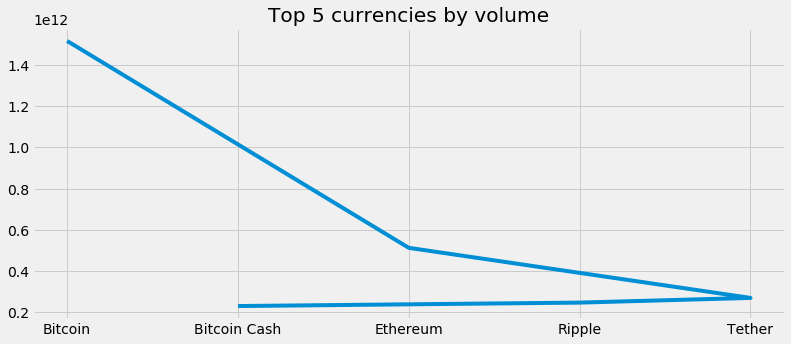

In [205]:
top5currenciesByVolume = topKCurrenciesByAttribute(5,'volume')
CurrenciesByAttributeGraph( top5currenciesByVolume, 'Top 5 currencies by volume')

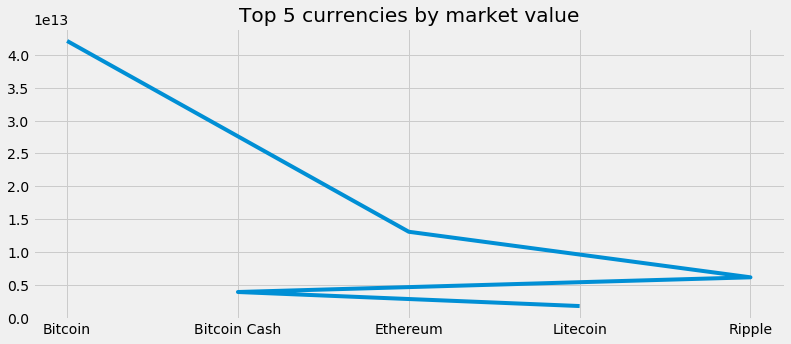

In [206]:
top5currenciesByMarket = topKCurrenciesByAttribute(5,'market')
CurrenciesByAttributeGraph(top5currenciesByMarket, 'Top 5 currencies by market value')

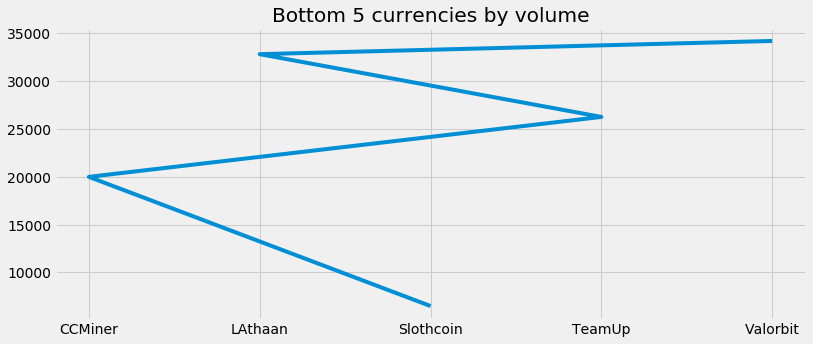

In [207]:
#  low volume means people dont prefer to use these currencies
bottom5currenciesByVolume = bottomKCurrenciesByAttribute(5,'volume')
CurrenciesByAttributeGraph( bottom5currenciesByVolume, 'Bottom 5 currencies by volume')

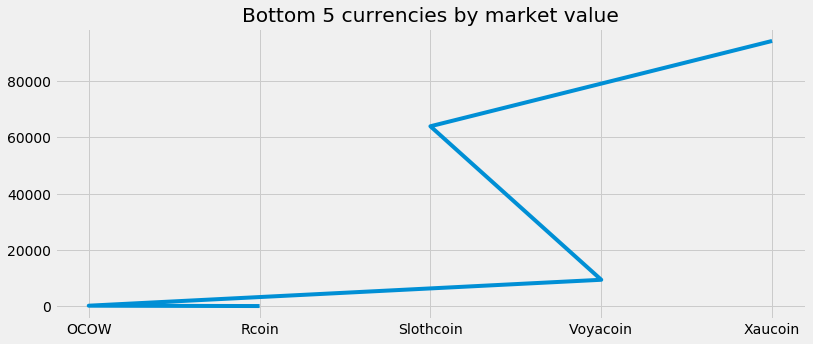

In [208]:
# low market value means low number of comapny shares or low
bottom5currenciesByMarket = bottomKCurrenciesByAttribute(5,'market')
CurrenciesByAttributeGraph(bottom5currenciesByMarket, 'Bottom 5 currencies by market value')

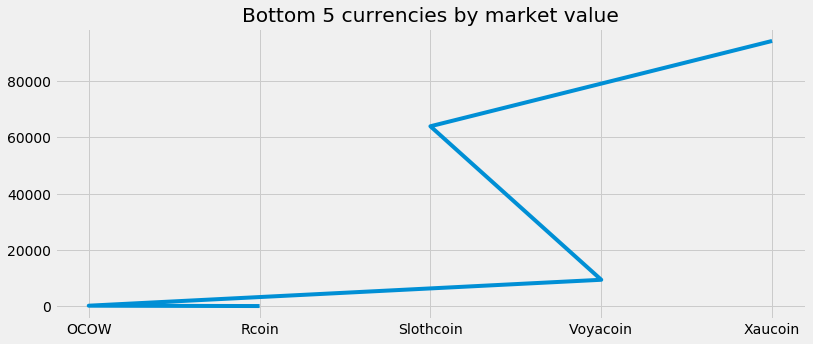

In [209]:
bottom5currenciesByMarket = bottomKCurrenciesByAttribute(5,'market')
CurrenciesByAttributeGraph(bottom5currenciesByMarket, 'Bottom 5 currencies by market value')

In [210]:
def yearwiseCurrenciesByAttribute(attribute):
    data = dataset_indexed.groupby(['year','name']).sum().sort_values(attribute, ascending=False)[attribute].unstack(level=1).fillna(0)
    return data

In [211]:
yearwiseDistributionByVolume = yearwiseCurrenciesByAttribute('volume')
yearwiseDistributionByMarket = yearwiseCurrenciesByAttribute('market')

In [212]:
def yearwiseCurrenciesByAttributeGraph(yearwiseDistributionByAttribute, top5currenciesByattribute, title):
    plt.figure(figsize=(12,5))
    plt.style.use('fivethirtyeight')
    plt.title(title)
    for currency in top5currenciesByattribute.index:
        data = yearwiseDistributionByAttribute[currency]
        plt.plot(data.index,data.values)
    plt.legend(top5currenciesByattribute.index)
    plt.show()

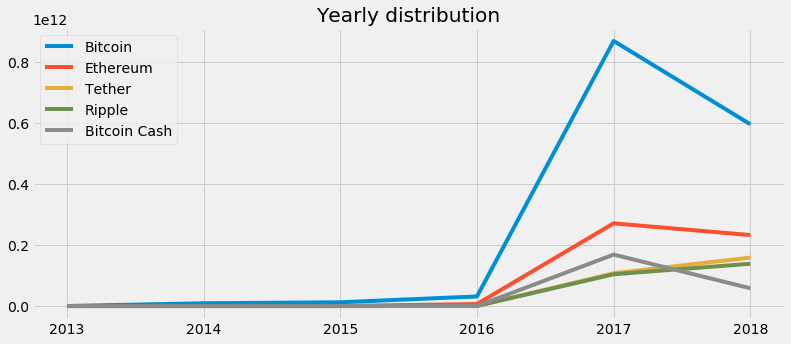

In [213]:
yearwiseCurrenciesByAttributeGraph(yearwiseDistributionByVolume, top5currenciesByVolume, 'Yearly distribution')

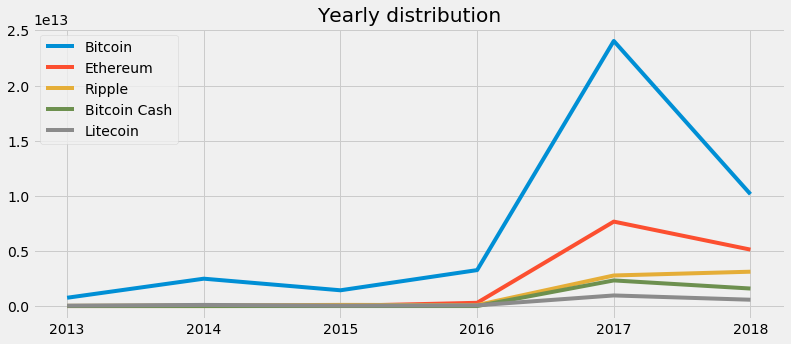

In [214]:
yearwiseCurrenciesByAttributeGraph(yearwiseDistributionByMarket, top5currenciesByMarket, 'Yearly distribution')

 # trying to find dead coins

In [215]:
dataset_name_indexed = dataset.set_index(['name']).sort_index()

In [216]:
dataset_name_indexed.index

Index(['0x', '0x', '0x', '0x', '0x', '0x', '0x', '0x', '0x', '0x',
       ...
       'vTorrent', 'vTorrent', 'vTorrent', 'vTorrent', 'vTorrent', 'vTorrent',
       'vTorrent', 'vTorrent', 'vTorrent', 'vTorrent'],
      dtype='object', name='name', length=702166)

In [217]:
dataset_name_indexed.loc['Litecoin Cash'].shape[0]
# Litecoin Cash

13

In [218]:
coin_name = []
coin_maxDate = []
coin_encountered = []
for coin in dataset_name_indexed.index:
    if coin not in coin_encountered:
        coin_encountered.append(coin)
        if dataset_name_indexed.loc[coin].shape[0] > 15:
            coin_name.append(coin)
            coin_maxDate.append(dataset_name_indexed.loc[coin]['date'].max())

In [219]:
coin_lastDateDf= pd.Series(data = coin_name, index = coin_maxDate)

In [221]:
coin_lastDateDf.index[coin_lastDateDf.index < '2018-01-01']

Index([], dtype='object')

 # trying to find out that are not doing well

In [223]:
dataset = pd.read_csv('crypto-markets.csv')

In [224]:
dataset['date'] = pd.to_datetime(dataset['date'])
dataset.dtypes

slug                   object
symbol                 object
name                   object
date           datetime64[ns]
ranknow                 int64
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
market                  int64
close_ratio           float64
spread                float64
dtype: object

In [225]:
dataset_date_indexed = dataset.set_index(['date'])

In [226]:
dataset_date_indexed

slug symbol     name  ranknow        open        high  \
date                                                                   
2013-04-28  bitcoin    BTC  Bitcoin        1  135.300000  135.980000   
2013-04-29  bitcoin    BTC  Bitcoin        1  134.440000  147.490000   
2013-04-30  bitcoin    BTC  Bitcoin        1  144.000000  146.930000   
2013-05-01  bitcoin    BTC  Bitcoin        1  139.000000  139.890000   
2013-05-02  bitcoin    BTC  Bitcoin        1  116.380000  125.600000   
2013-05-03  bitcoin    BTC  Bitcoin        1  106.250000  108.130000   
2013-05-04  bitcoin    BTC  Bitcoin        1   98.100000  115.000000   
2013-05-05  bitcoin    BTC  Bitcoin        1  112.900000  118.800000   
2013-05-06  bitcoin    BTC  Bitcoin        1  115.980000  124.660000   
2013-05-07  bitcoin    BTC  Bitcoin        1  112.250000  113.440000   
2013-05-08  bitcoin    BTC  Bitcoin        1  109.600000  115.780000   
2013-05-09  bitcoin    BTC  Bitcoin        1  113.200000  113.460000   
2013-05-10  bitcoin    BTC  Bitcoin        1  112.800000  122.000000   
2013-05-11  bitcoin    BTC  Bitcoin        1  117.700000  118.680000   
2013-05-12  bitcoin    BTC  Bitcoin        1  115.640000  117.450000   
2013-05-13  bitcoin    BTC  Bitcoin        1  114.820000  118.700000   
2013-05-14  bitcoin    BTC  Bitcoin        1  117.980000  119.800000   
2013-05-15  bitcoin    BTC  Bitcoin        1  111.400000  115.810000   
2013-05-16  bitcoin    BTC  Bitcoin        1  114.220000  118.760000   
2013-05-17  bitcoin    BTC  Bitcoin        1  118.210000  125.300000   
2013-05-18  bitcoin    BTC  Bitcoin        1  123.500000  125.250000   
2013-05-19  bitcoin    BTC  Bitcoin        1  123.210000  124.500000   
2013-05-20  bitcoin    BTC  Bitcoin        1  122.500000  123.620000   
2013-05-21  bitcoin    BTC  Bitcoin        1  122.020000  123.000000   
2013-05-22  bitcoin    BTC  Bitcoin        1  122.890000  124.000000   
2013-05-23  bitcoin    BTC  Bitcoin        1  123.800000  126.930000   
2013-05-24  bitcoin    BTC  Bitcoin        1  126.300000  133.850000   
2013-05-25  bitcoin    BTC  Bitcoin        1  133.100000  133.220000   
2013-05-26  bitcoin    BTC  Bitcoin        1  131.990000  136.000000   
2013-05-27  bitcoin    BTC  Bitcoin        1  133.500000  135.470000   
...             ...    ...      ...      ...         ...         ...   
2017-12-02     ocow   OCOW     OCOW     1516    0.004831    0.004926   
2017-12-03     ocow   OCOW     OCOW     1516    0.004810    0.004930   
2017-12-09     ocow   OCOW     OCOW     1516    0.000924    0.000927   
2017-12-10     ocow   OCOW     OCOW     1516    0.000902    0.000902   
2017-12-12     ocow   OCOW     OCOW     1516    0.006042    0.006216   
2017-12-13     ocow   OCOW     OCOW     1516    0.006047    0.006127   
2017-12-14     ocow   OCOW     OCOW     1516    0.005731    0.005972   
2017-12-15     ocow   OCOW     OCOW     1516    0.004479    0.004880   
2017-12-16     ocow   OCOW     OCOW     1516    0.000089    0.004738   
2017-12-17     ocow   OCOW     OCOW     1516    0.000573    0.000741   
2017-12-18     ocow   OCOW     OCOW     1516    0.000191    0.000264   
2017-12-19     ocow   OCOW     OCOW     1516    0.000168    0.000224   
2017-12-20     ocow   OCOW     OCOW     1516    0.000159    0.000735   
2017-12-21     ocow   OCOW     OCOW     1516    0.000165    0.000243   
2017-12-22     ocow   OCOW     OCOW     1516    0.000126    0.000140   
2017-12-23     ocow   OCOW     OCOW     1516    0.000014    0.000031   
2017-12-24     ocow   OCOW     OCOW     1516    0.000015    0.000029   
2017-12-25     ocow   OCOW     OCOW     1516    0.000028    0.000042   
2017-12-26     ocow   OCOW     OCOW     1516    0.000014    0.000016   
2017-12-27     ocow   OCOW     OCOW     1516    0.000016    0.000032   
2017-12-28     ocow   OCOW     OCOW     1516    0.000016    0.000016   
2017-12-29     ocow   OCOW     OCOW     1516    0.000015    0.000030   
2017-12-30     ocow   OCOW     OCOW     1516    0.00001

In [227]:
dataset_name_indexed = dataset.set_index(['name'])

In [228]:
dataset_name_indexed.loc['Bitcoin']

slug symbol       date  ranknow      open      high       low  \
name                                                                        
Bitcoin  bitcoin    BTC 2013-04-28        1    135.30    135.98    132.10   
Bitcoin  bitcoin    BTC 2013-04-29        1    134.44    147.49    134.00   
Bitcoin  bitcoin    BTC 2013-04-30        1    144.00    146.93    134.05   
Bitcoin  bitcoin    BTC 2013-05-01        1    139.00    139.89    107.72   
Bitcoin  bitcoin    BTC 2013-05-02        1    116.38    125.60     92.28   
Bitcoin  bitcoin    BTC 2013-05-03        1    106.25    108.13     79.10   
Bitcoin  bitcoin    BTC 2013-05-04        1     98.10    115.00     92.50   
Bitcoin  bitcoin    BTC 2013-05-05        1    112.90    118.80    107.14   
Bitcoin  bitcoin    BTC 2013-05-06        1    115.98    124.66    106.64   
Bitcoin  bitcoin    BTC 2013-05-07        1    112.25    113.44     97.70   
Bitcoin  bitcoin    BTC 2013-05-08        1    109.60    115.78    109.60   
Bitcoin  bitcoin    BTC 2013-05-09        1    113.20    113.46    109.26   
Bitcoin  bitcoin    BTC 2013-05-10        1    112.80    122.00    111.55   
Bitcoin  bitcoin    BTC 2013-05-11        1    117.70    118.68    113.01   
Bitcoin  bitcoin    BTC 2013-05-12        1    115.64    117.45    113.44   
Bitcoin  bitcoin    BTC 2013-05-13        1    114.82    118.70    114.50   
Bitcoin  bitcoin    BTC 2013-05-14        1    117.98    119.80    110.25   
Bitcoin  bitcoin    BTC 2013-05-15        1    111.40    115.81    103.50   
Bitcoin  bitcoin    BTC 2013-05-16        1    114.22    118.76    112.20   
Bitcoin  bitcoin    BTC 2013-05-17        1    118.21    125.30    116.57   
Bitcoin  bitcoin    BTC 2013-05-18        1    123.50    125.25    122.30   
Bitcoin  bitcoin    BTC 2013-05-19        1    123.21    124.50    119.57   
Bitcoin  bitcoin    BTC 2013-05-20        1    122.50    123.62    120.12   
Bitcoin  bitcoin    BTC 2013-05-21        1    122.02    123.00    121.21   
Bitcoin  bitcoin    BTC 2013-05-22        1    122.89    124.00    122.00   
Bitcoin  bitcoin    BTC 2013-05-23        1    123.80    126.93    123.10   
Bitcoin  bitcoin    BTC 2013-05-24        1    126.30    133.85    125.72   
Bitcoin  bitcoin    BTC 2013-05-25        1    133.10    133.22    128.90   
Bitcoin  bitcoin    BTC 2013-05-26        1    131.99    136.00    130.62   
Bitcoin  bitcoin    BTC 2013-05-27        1    133.50    135.47    124.70   
...          ...    ...        ...      ...       ...       ...       ...   
Bitcoin  bitcoin    BTC 2018-01-23        1  10944.50  11377.60  10129.70   
Bitcoin  bitcoin    BTC 2018-01-24        1  10903.40  11501.40  10639.80   
Bitcoin  bitcoin    BTC 2018-01-25        1  11421.70  11785.70  11057.40   
Bitcoin  bitcoin    BTC 2018-01-26        1  11256.00  11656.70  10470.30   
Bitcoin  bitcoin    BTC 2018-01-27        1  11174.90  11614.90  10989.20   
Bitcoin  bitcoin    BTC 2018-01-28        1  11475.30  12040.30  11475.30   
Bitcoin  bitcoin    BTC 2018-01-29        1  11755.50  11875.60  11179.20   
Bitcoin  bitcoin    BTC 2018-01-30        1  11306.80  11307.20  10036.20   
Bitcoin  bitcoin    BTC 2018-01-31        1  10108.20  10381.60   9777.42   
Bitcoin  bitcoin    BTC 2018-02-01        1  10237.30  10288.80   8812.28   
Bitcoin  bitcoin    BTC 2018-02-02        1   9142.28   9142.28   7796.49   
Bitcoin  bitcoin    BTC 2018-02-03        1   8852.12   9430.75   8251.63   
Bitcoin  bitcoin    BTC 2018-02-04        1   9175.70   9334.87   8031.22   
Bitcoin  bitcoin    BTC 2018-02-05        1   8270.54   8364.84   6756.68   
Bitcoin  bitcoin    BTC 2018-02-06        1   7051.75   7850.70   6048.26   
Bitcoin  bitcoin    BTC 2018-02-07        1   7755.49   8509.11   7236.79   
Bitcoin  bitcoin    BTC 2018-02-08        1   7637.86   8558.77   7637.86   
Bitcoin  bitcoin    BTC 2018-02-09        1   8271.84   8736.98   7884.71   
Bitcoin  bitcoin    BTC 2018-02-10        1   8720.08   9122.55   8295.47   
Bitcoin 

In [229]:
dataset_date_indexed.shape

(702166, 12)

In [230]:
dat.max()

1.0

In [231]:
MinMaxNormalizeData.min()

date      2013-04-28 00:00:00
name                       0x
open                        0
high                        0
low                         0
close                       0
market                      0
volume                      0
dtype: object

In [232]:
MinMaxNormalizeData.max()

date      2018-02-21 00:00:00
name                 vTorrent
open                        1
high                        1
low                         1
close                       1
market                      1
volume                      1
dtype: object

In [234]:
minMaxIndexedDataset = MinMaxNormalizeData.set_index(['date'])

In [235]:
minMaxIndexedDataset

name          open          high           low         close  \
date                                                                          
2013-04-28  Bitcoin  5.886729e-05  4.647141e-05  6.505498e-05  5.833341e-05   
2013-04-29  Bitcoin  5.849312e-05  5.040498e-05  6.599067e-05  6.282327e-05   
2013-04-30  Bitcoin  6.265255e-05  5.021359e-05  6.601530e-05  6.041534e-05   
2013-05-01  Bitcoin  6.047712e-05  4.780766e-05  5.304862e-05  5.084886e-05   
2013-05-02  Bitcoin  5.063544e-05  4.292403e-05  4.544492e-05  4.572877e-05   
2013-05-03  Bitcoin  4.622801e-05  3.695362e-05  3.895420e-05  4.248633e-05   
2013-05-04  Bitcoin  4.268205e-05  3.930146e-05  4.555326e-05  4.889731e-05   
2013-05-05  Bitcoin  4.912134e-05  4.060012e-05  5.276299e-05  5.037944e-05   
2013-05-06  Bitcoin  5.046141e-05  4.260278e-05  5.251676e-05  4.881038e-05   
2013-05-07  Bitcoin  4.883853e-05  3.876833e-05  4.811409e-05  4.846267e-05   
2013-05-08  Bitcoin  4.768555e-05  3.956803e-05  5.397446e-05  4.936238e-05   
2013-05-09  Bitcoin  4.925187e-05  3.877516e-05  5.380702e-05  4.897120e-05   
2013-05-10  Bitcoin  4.907783e-05  4.169372e-05  5.493477e-05  5.094013e-05   
2013-05-11  Bitcoin  5.120976e-05  4.055911e-05  5.565378e-05  5.008823e-05   
2013-05-12  Bitcoin  5.031348e-05  4.013875e-05  5.586554e-05  4.998392e-05   
2013-05-13  Bitcoin  4.995671e-05  4.056594e-05  5.638755e-05  5.127915e-05   
2013-05-14  Bitcoin  5.133158e-05  4.094187e-05  5.429456e-05  4.846267e-05   
2013-05-15  Bitcoin  4.846871e-05  3.957828e-05  5.097041e-05  4.964490e-05   
2013-05-16  Bitcoin  4.969566e-05  4.058645e-05  5.525488e-05  5.161818e-05   
2013-05-17  Bitcoin  5.143165e-05  4.282150e-05  5.740696e-05  5.346975e-05   
2013-05-18  Bitcoin  5.373327e-05  4.280442e-05  6.022880e-05  5.367838e-05   
2013-05-19  Bitcoin  5.360709e-05  4.254810e-05  5.888436e-05  5.302207e-05   
2013-05-20  Bitcoin  5.329818e-05  4.224736e-05  5.915522e-05  5.302642e-05   
2013-05-21  Bitcoin  5.308934e-05  4.203547e-05  5.969201e-05  5.340890e-05   
2013-05-22  Bitcoin  5.346786e-05  4.237723e-05  6.008106e-05  5.384789e-05   
2013-05-23  Bitcoin  5.386379e-05  4.337856e-05  6.062277e-05  5.506924e-05   
2013-05-24  Bitcoin  5.495151e-05  4.574348e-05  6.191304e-05  5.789442e-05   
2013-05-25  Bitcoin  5.791010e-05  4.552818e-05  6.347909e-05  5.736415e-05   
2013-05-26  Bitcoin  5.742716e-05  4.647825e-05  6.432613e-05  5.801612e-05   
2013-05-27  Bitcoin  5.808414e-05  4.629712e-05  6.141072e-05  5.639490e-05   
...             ...           ...           ...           ...           ...   
2017-12-02     OCOW  2.101905e-09  1.683468e-09  2.329372e-09  2.088458e-09   
2017-12-03     OCOW  2.092768e-09  1.684835e-09  2.353011e-09  2.129315e-09   
2017-12-09     OCOW  4.020195e-10  3.168028e-10  4.003762e-10  3.907438e-10   
2017-12-10     OCOW  3.924475e-10  3.082590e-10  3.910194e-10  3.577110e-10   
2017-12-12     OCOW  2.628796e-09  2.124328e-09  2.940032e-09  2.626112e-09   
2017-12-13     OCOW  2.630971e-09  2.093912e-09  2.746985e-09  2.499196e-09   
2017-12-14     OCOW  2.493483e-09  2.040941e-09  2.188526e-09  1.943722e-09   
2017-12-15     OCOW  1.948754e-09  1.667748e-09  3.910194e-10  3.451064e-10   
2017-12-16     OCOW  3.872167e-11  1.619219e-09  4.382963e-11  2.516582e-10   
2017-12-17     OCOW  2.493039e-10  2.532370e-10  7.534756e-11  8.301677e-11   
2017-12-18     OCOW  8.310056e-11  9.022139e-11  4.629196e-11  7.301998e-11   
2017-12-19     OCOW  7.309356e-11  7.655131e-11  5.121664e-11  6.910820e-11   
2017-12-20     OCOW  6.917777e-11  2.511865e-10  2.462339e-11  7.128141e-11   
2017-12-21     OCOW  7.178830e-11  8.304460e-11  6.008106e-11  5.433035e-11   
2017-12-22     OCOW  5.481990e-11  4.784416e-11  6.402080e-12  6.084999e-12   
2017-12-23     OCOW  6.090133e-12  1.059321e-11  6.894548e-12  6.084999e-12   
2017-12-24     OCOW  6.525220e-12  9.909709e-12  6.402080e-12  1.217000e-11   
2017-12-25     OCOW  1.218135e-11  1.435248e-11  6.402080e-12  6.

In [236]:
MinMaxNormalizeData.dtypes

date      datetime64[ns]
name              object
open             float64
high             float64
low              float64
close            float64
market           float64
volume           float64
dtype: object

In [237]:
nameSorted = MinMaxNormalizeData.set_index(['name'])

In [238]:
marketData = nameSorted.groupby('name')['market'].sum()
marketDataDF = pd.DataFrame(marketData,columns = ['market'])
marketDataDF = marketDataDF[marketDataDF['market'] != 0]
worstCurrencyPerformers = marketDataDF.sort_values(by='market').head(5).index
topCurrencyPerformers = marketDataDF.sort_values(by='market', ascending = False).head(5).index

In [240]:
worstCurrencyPerformersData = MinMaxNormalizeData[MinMaxNormalizeData['name'].isin(worstCurrencyPerformers)]

In [241]:
topCurrencyPerformersData = MinMaxNormalizeData[MinMaxNormalizeData['name'].isin(topCurrencyPerformers)]

In [242]:
worstCurrencyPerformersData.head()

date       name          open          high           low  \
650828 2014-04-28  Slothcoin  1.739261e-12  1.365914e-12  1.969871e-12   
650829 2018-02-13  Slothcoin  2.174348e-12  2.391169e-12  2.462338e-12   
650830 2018-02-14  Slothcoin  2.609435e-12  1.196022e-11  2.954806e-12   
650831 2018-02-15  Slothcoin  1.348661e-11  1.059321e-11  2.462338e-12   
650832 2018-02-16  Slothcoin  8.700656e-12  1.469423e-11  3.447274e-12   

               close        market        volume  
650828  1.738571e-12  1.958386e-07  0.000000e+00  
650829  2.607857e-12  0.000000e+00  1.610677e-08  
650830  1.347393e-11  0.000000e+00  3.674358e-08  
650831  8.692855e-12  0.000000e+00  3.108104e-08  
650832  1.086607e-11  0.000000e+00  2.290182e-08

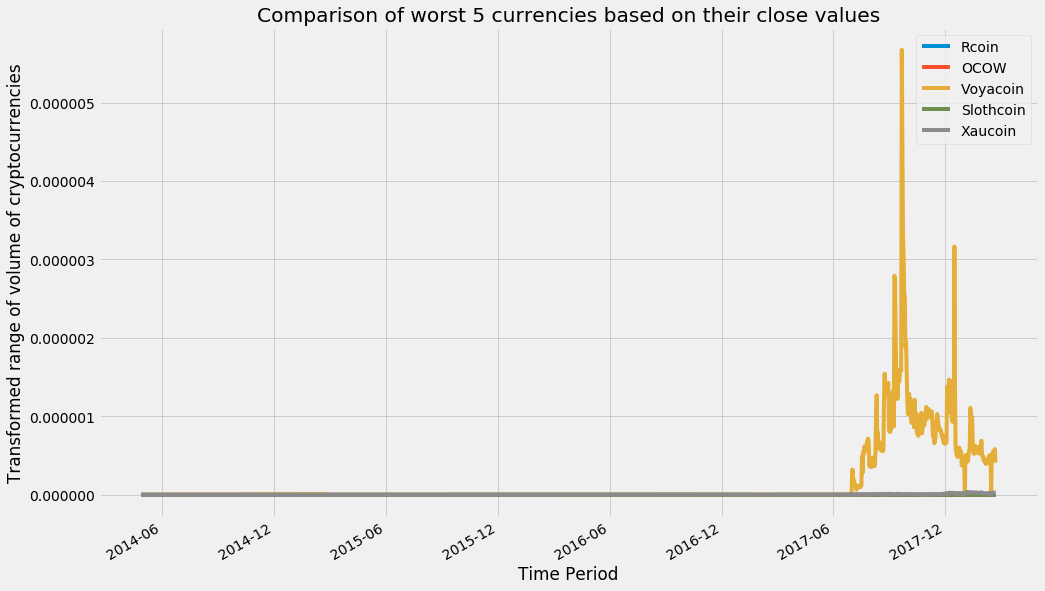

In [243]:
worst5CurrenciesPricePerUnit = worstCurrencyPerformersData.groupby(['date','name'])['close'].mean().unstack()
worst5CurrenciesPricePerUnit_fillNA = pd.DataFrame()
for coin in worstCurrencyPerformers:
    worst5CurrenciesPricePerUnit_fillNA[coin] = worst5CurrenciesPricePerUnit[coin].fillna(worst5CurrenciesPricePerUnit['OCOW'].mean())
worst5CurrenciesPricePerUnit_fillNA.plot(legend=True,figsize=(15, 10), title='Comparison of worst 5 currencies based on their close values')
plt.ylabel('Transformed range of volume of cryptocurrencies')
plt.xlabel('Time Period')
plt.show()

In [244]:
worst5CurrenciesPricePerUnit_fillNA.head()

Rcoin          OCOW      Voyacoin     Slothcoin  \
date                                                                 
2014-04-28  7.469492e-10  7.469492e-10  7.469492e-10  1.738571e-12   
2015-02-28  7.469492e-10  7.469492e-10  7.857907e-09  7.469492e-10   
2015-03-01  7.469492e-10  7.469492e-10  2.629154e-09  7.469492e-10   
2015-03-02  7.469492e-10  7.469492e-10  1.865487e-09  7.469492e-10   
2015-03-03  7.469492e-10  7.469492e-10  6.337092e-10  7.469492e-10   

                 Xaucoin  
date                      
2014-04-28  7.469492e-10  
2015-02-28  7.469492e-10  
2015-03-01  7.469492e-10  
2015-03-02  7.469492e-10  
2015-03-03  7.469492e-10

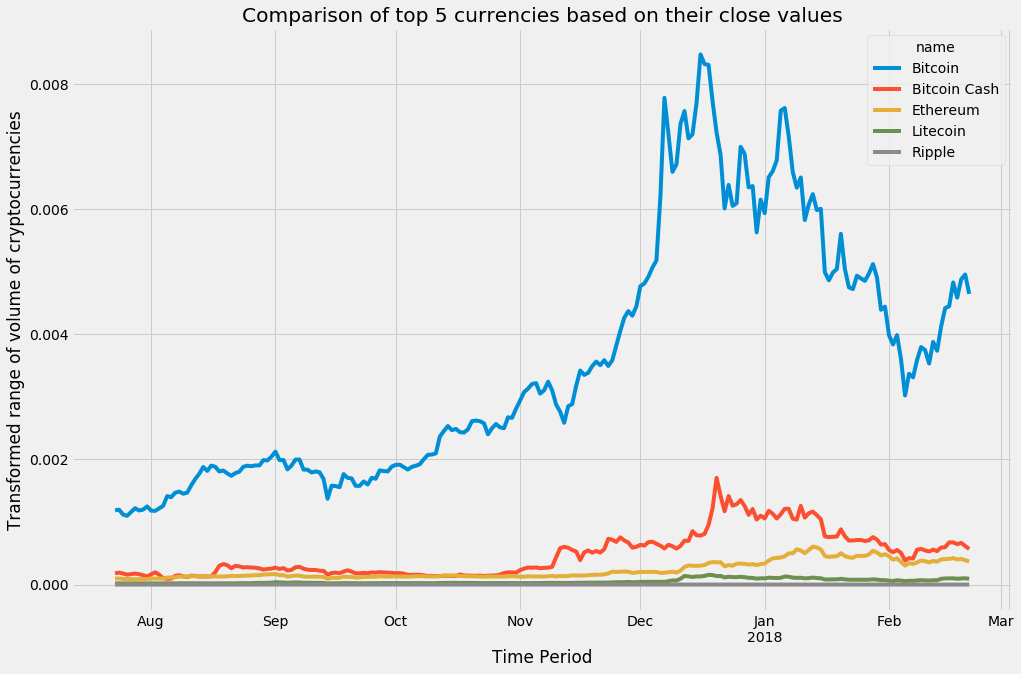

In [245]:
plt.style.use('fivethirtyeight')
top5CurrenciesPricePerUnit = topCurrencyPerformersData.groupby(['date','name'])['close'].mean().unstack()
top5CurrenciesPricePerUnit_dropNA = top5CurrenciesPricePerUnit.dropna(axis=0, how='any')
top5CurrenciesPricePerUnit_dropNA.plot(legend=True,figsize=(15, 10), 
                                        title='Comparison of top 5 currencies based on their close values')
plt.ylabel('Transformed range of volume of cryptocurrencies')
plt.xlabel('Time Period')
plt.show()

In [246]:
nameSorted.loc['Bitcoin'].head()

date      open      high       low     close    market  volume
name                                                                        
Bitcoin 2013-04-28  0.000059  0.000046  0.000065  0.000058  0.004601     0.0
Bitcoin 2013-04-29  0.000058  0.000050  0.000066  0.000063  0.004572     0.0
Bitcoin 2013-04-30  0.000063  0.000050  0.000066  0.000060  0.004899     0.0
Bitcoin 2013-05-01  0.000060  0.000048  0.000053  0.000051  0.004731     0.0
Bitcoin 2013-05-02  0.000051  0.000043  0.000045  0.000046  0.003962     0.0

#  Weekly and monthly grouping of top 5 coins

In [247]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn; seaborn.set()
from sklearn.metrics import mean_squared_error

# Any results you write to the current directory are saved as output.
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [248]:
# Load data
dataset = pd.read_csv('crypto-markets.csv')
dataset.head()

slug symbol     name        date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin  2013-04-30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin  2013-05-01        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin  2013-05-02        1  116.38  125.60   92.28   

    close  volume      market  close_ratio  spread  
0  134.21       0  1500520000       0.5438    3.88  
1  144.54       0  1491160000       0.7813   13.49  
2  139.00       0  1597780000       0.3843   12.88  
3  116.99       0  1542820000       0.2882   32.17  
4  105.21       0  1292190000       0.3881   33.32

In [249]:
dataset['date'] = pd.to_datetime(dataset['date'])
data= dataset.set_index(['date'])

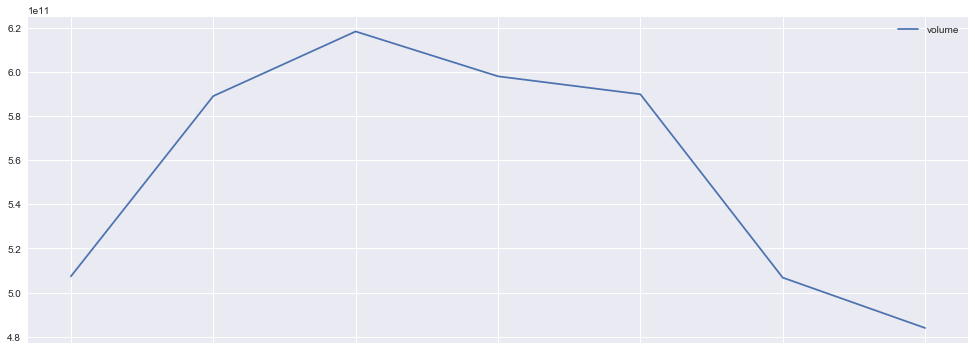

In [250]:
by_weekday = pd.DataFrame(data.groupby(data.index.dayofweek).sum()['volume'])
days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.index = days
# ax.get_xaxis().set_visible(true)

by_weekday.plot(use_index = True, legend = True)

# plt.xlabel = days
# plt.show()

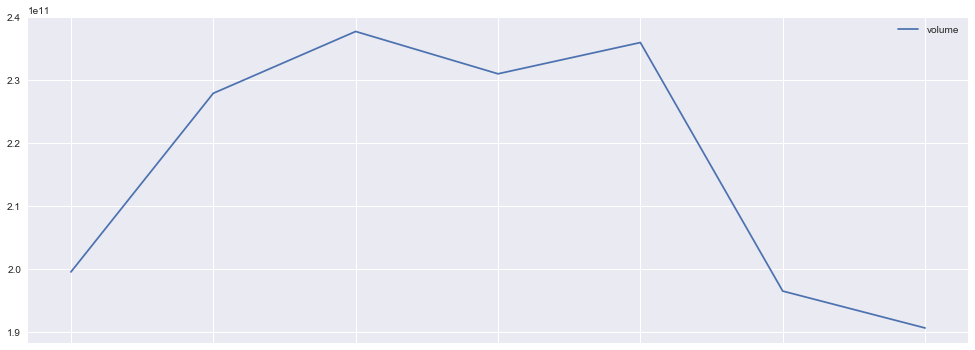

In [251]:
name_date_data = dataset.set_index(['name','date'])
# name_date_data.loc['Bitcoin']
by_weekday = pd.DataFrame(name_date_data.loc['Bitcoin'].
                          groupby(name_date_data.loc['Bitcoin'].index.dayofweek).sum()['volume'])
days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.index = days
# ax.get_xaxis().set_visible(true)

by_weekday.plot(use_index = True, legend = True)

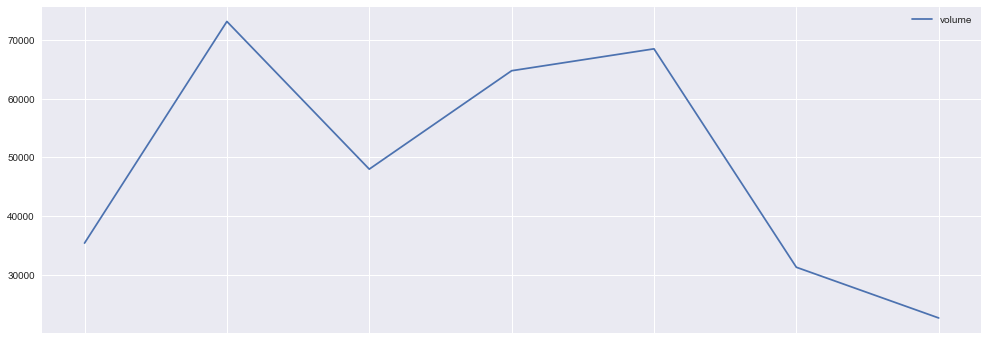

In [252]:
by_weekday = pd.DataFrame(name_date_data.loc['Rcoin'].
                          groupby(name_date_data.loc['Rcoin'].index.dayofweek).sum()['volume'])
days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.index = days
# ax.get_xaxis().set_visible(true)

by_weekday.plot(use_index = True, legend = True)

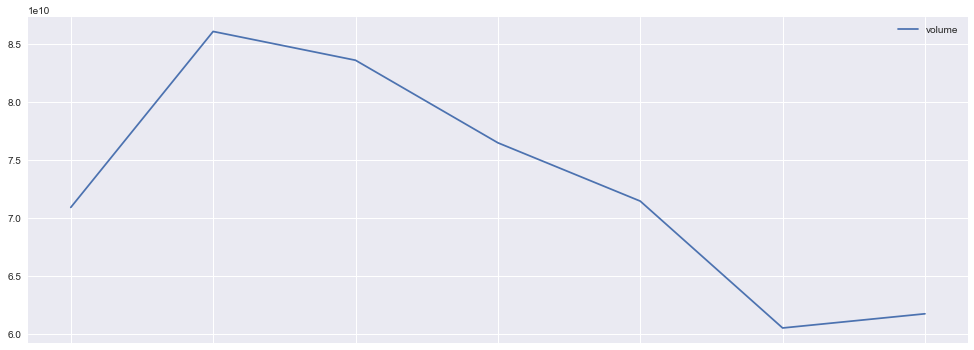

In [253]:
by_weekday = pd.DataFrame(name_date_data.loc['Ethereum'].
                          groupby(name_date_data.loc['Ethereum'].index.dayofweek).sum()['volume'])
days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.index = days
# ax.get_xaxis().set_visible(true)

by_weekday.plot(use_index = True, legend = True)

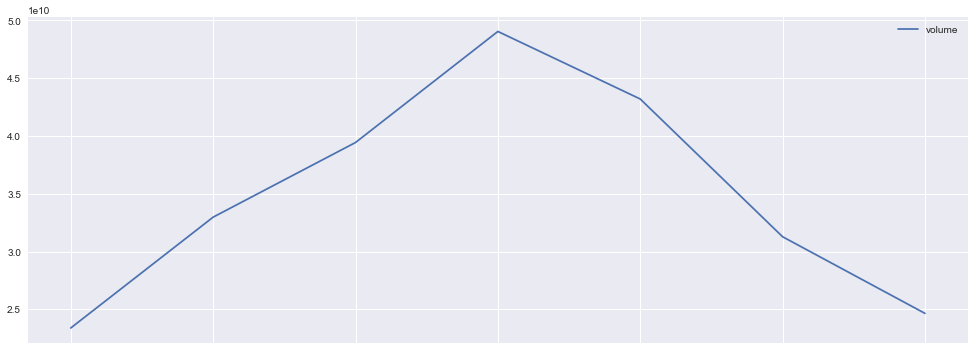

In [254]:
by_weekday = pd.DataFrame(name_date_data.loc['Ripple'].
                          groupby(name_date_data.loc['Ripple'].index.dayofweek).sum()['volume'])
days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.index = days

by_weekday.plot(use_index = True, legend = True)

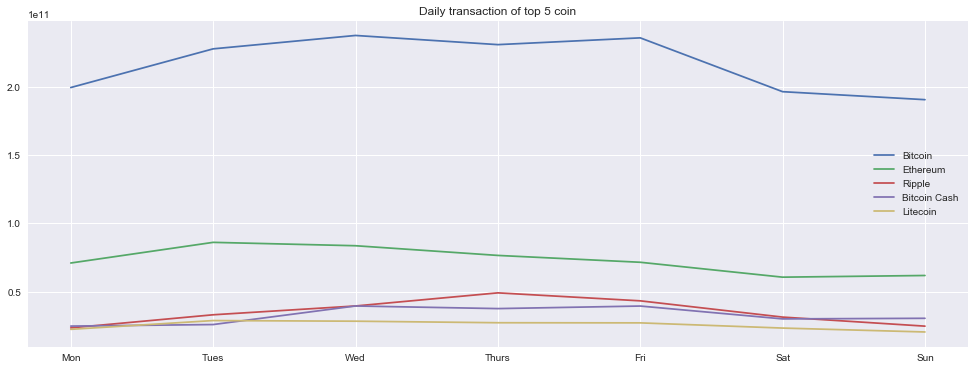

In [255]:
topMarketValuecoins = ['Bitcoin', 'Ethereum', 'Ripple', 'Bitcoin Cash', 'Litecoin']
days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
topMarketValuecoinsDf = pd.DataFrame()
for coin in topMarketValuecoins:
    by_weekday = pd.DataFrame(name_date_data.loc[coin].
                          groupby(name_date_data.loc[coin].index.dayofweek).sum()['volume'])
    topMarketValuecoinsDf[coin] = by_weekday
plt.xticks(topMarketValuecoinsDf.index,days)
plt.title('Daily transaction of top 5 coin')
graph = plt.plot(topMarketValuecoinsDf)
plt.legend(graph, topMarketValuecoinsDf.columns)

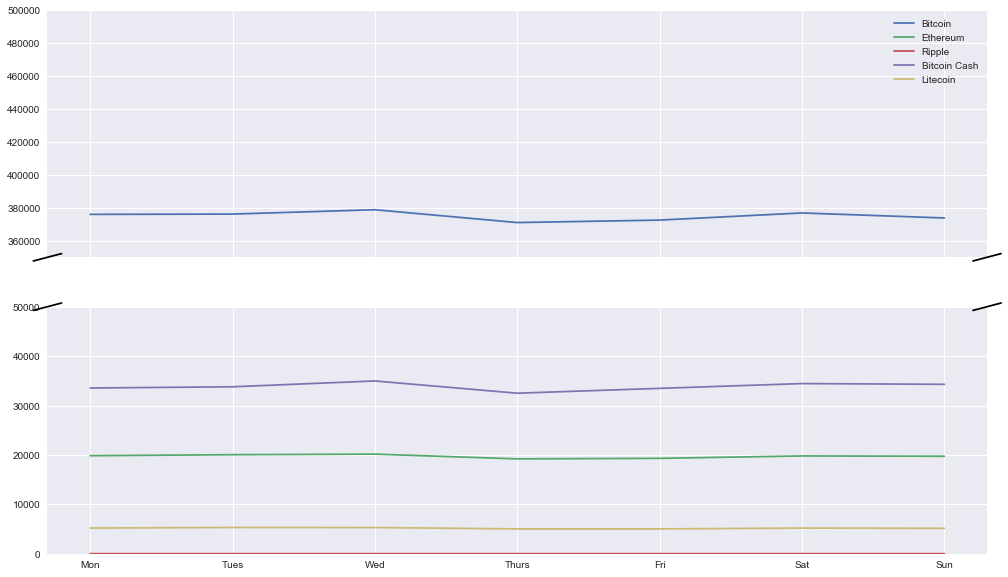

In [256]:
topMarketValuecoins = ['Bitcoin', 'Ethereum', 'Ripple', 'Bitcoin Cash', 'Litecoin']
days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
topMarketValuecoinsDf = pd.DataFrame()
for coin in topMarketValuecoins:
    by_weekday = pd.DataFrame(name_date_data.loc[coin].
                          groupby(name_date_data.loc[coin].index.dayofweek).sum()['close'])
    topMarketValuecoinsDf[coin] = by_weekday
                           title = 'Daily volume transactions of top 5 coins')


fig, (ax, ax2) = plt.subplots(2,1, sharex = True, figsize= (15,10))
topMarketValuecoinsDf.index = range(0,7,1)
upperGraph = ax.plot(topMarketValuecoinsDf.sort_index())
ax2.plot(topMarketValuecoinsDf.sort_index())
ax.legend(upperGraph, topMarketValuecoinsDf.columns)
ax.set_ylim(350000, 500000) # To draw bitcoin
ax2.set_ylim(0,50000) # to draw all other coins

# hid the spins between two subplots
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.tick_params(labeltop='off')
# ax.title('Monthly transaction of top 5 coin')
ax2.xaxis.tick_bottom()
plt.xticks(topMarketValuecoinsDf.index,days)

# align ticks of both subplots
d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        
ax.plot((1-d, 1+d), (-d, +d), **kwargs) 
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1-d, 1+d), (1-d, 1+d), **kwargs)  
plt.show()

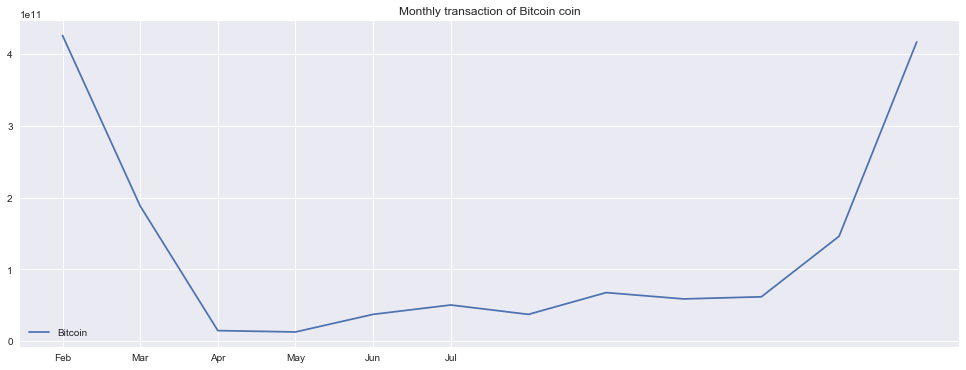

In [257]:
import matplotlib.pyplot as plt
by_month = pd.DataFrame(name_date_data.loc['Bitcoin'].
                          groupby(name_date_data.loc['Bitcoin'].index.month).sum()['volume'])
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(topMarketValuecoinsDf.index,month)
plt.title('Monthly transaction of Bitcoin coin')
graph = plt.plot(by_month)
plt.legend(graph, topMarketValuecoinsDf.columns)

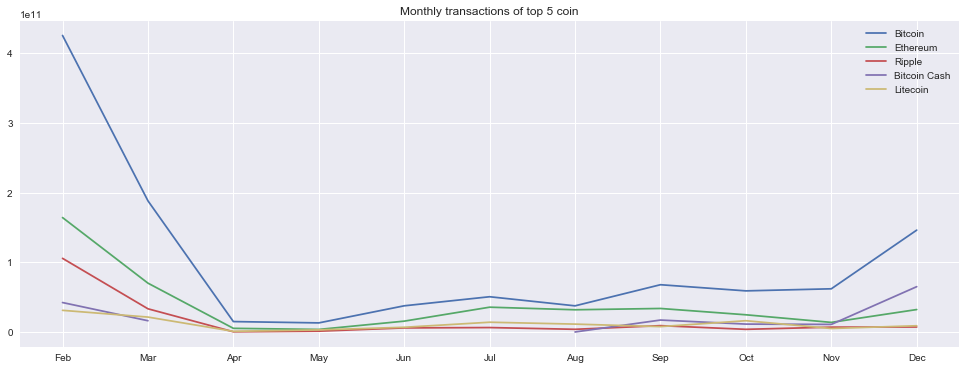

In [258]:
topMarketValuecoins = ['Bitcoin', 'Ethereum', 'Ripple', 'Bitcoin Cash', 'Litecoin']
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
topMarketValuecoinsDf = pd.DataFrame()
for coin in topMarketValuecoins:
    by_weekday = pd.DataFrame(name_date_data.loc[coin].
                          groupby(name_date_data.loc[coin].index.month).sum()['volume'])
    topMarketValuecoinsDf[coin] = by_weekday
plt.xticks(topMarketValuecoinsDf.index,month)
plt.title('Monthly transactions of top 5 coin')
graph = plt.plot(topMarketValuecoinsDf)
plt.legend(graph, topMarketValuecoinsDf.columns)

In [259]:
topMarketValuecoins = ['Bitcoin', 'Ethereum', 'Ripple', 'Bitcoin Cash', 'Litecoin']
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
topMarketValuecoinsDf = pd.DataFrame()
for coin in topMarketValuecoins:
    by_weekday = pd.DataFrame(name_date_data.loc[coin].
                          groupby(name_date_data.loc[coin].index.month).sum()['close'])
#     by_weekday.index = days
    # ax.get_xaxis().set_visible(true)
    topMarketValuecoinsDf[coin] = by_weekday
topMarketValuecoinsDf.index = month
topMarketValuecoinsDf.plot(use_index = True, legend = True, figsize=(10,15), 
                           title = 'Monthly close value of top 5 coins')

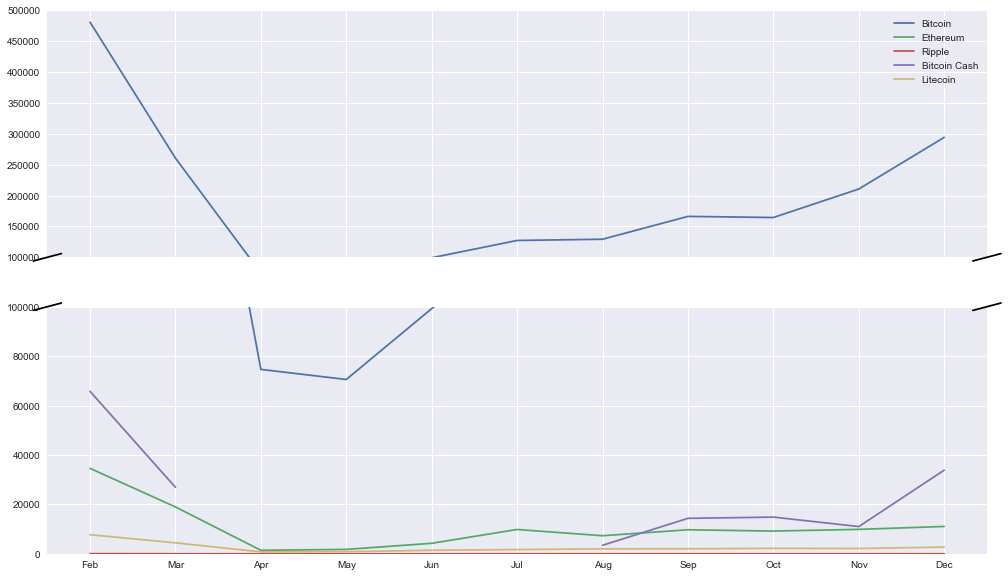

In [260]:
import matplotlib.pyplot as plt
fig, (ax, ax2) = plt.subplots(2,1, sharex = True, figsize= (15,10))
topMarketValuecoinsDf.index = range(0,12,1)
upperGraph = ax.plot(topMarketValuecoinsDf.sort_index())
ax2.plot(topMarketValuecoinsDf.sort_index())
ax.legend(upperGraph, topMarketValuecoinsDf.columns)
ax.set_ylim(100000, 500000) # To draw bitcoin
ax2.set_ylim(0,100000) # to draw all other coins

# hid the spins between two subplots
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.tick_params(labeltop='off')
ax2.xaxis.tick_bottom()
plt.xticks(topMarketValuecoinsDf.index,month)

# align ticks of both subplots
d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        
ax.plot((1-d, 1+d), (-d, +d), **kwargs) 
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1-d, 1+d), (1-d, 1+d), **kwargs)  
plt.show()

#  ARIMA Time Series 

In [261]:
import warnings
import itertools
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

In [262]:
dataset = pd.read_csv('crypto-markets.csv')
dataset['date'] = pd.to_datetime(dataset['date'])
dataset.dtypes
dataset.head()

slug symbol     name       date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin 2013-04-28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin 2013-04-29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin 2013-04-30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin 2013-05-01        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin 2013-05-02        1  116.38  125.60   92.28   

    close  volume      market  close_ratio  spread  
0  134.21       0  1500520000       0.5438    3.88  
1  144.54       0  1491160000       0.7813   13.49  
2  139.00       0  1597780000       0.3843   12.88  
3  116.99       0  1542820000       0.2882   32.17  
4  105.21       0  1292190000       0.3881   33.32

In [263]:
datasetBitcoin = dataset.loc[dataset['name'] == 'Bitcoin']

In [264]:
datasetBitcoinIndexedFull = datasetBitcoin.set_index('date').sort_index()

In [265]:
datasetBitcoinIndexed = datasetBitcoinIndexedFull['2017':]

In [266]:
datasetBitcoinIndexed.head()

slug symbol     name  ranknow     open     high      low  \
date                                                                      
2017-01-01  bitcoin    BTC  Bitcoin        1   963.66  1003.08   958.70   
2017-01-02  bitcoin    BTC  Bitcoin        1   998.62  1031.39   996.70   
2017-01-03  bitcoin    BTC  Bitcoin        1  1021.60  1044.08  1021.60   
2017-01-04  bitcoin    BTC  Bitcoin        1  1044.40  1159.42  1044.40   
2017-01-05  bitcoin    BTC  Bitcoin        1  1156.73  1191.10   910.42   

              close     volume       market  close_ratio  spread  
date                                                              
2017-01-01   998.33  147775000  15491200000       0.8930   44.38  
2017-01-02  1021.75  222185000  16055100000       0.7221   34.69  
2017-01-03  1043.84  185168000  16426600000       0.9893   22.48  
2017-01-04  1154.73  344946000  16795400000       0.9592  115.02  
2017-01-05  1013.38  510199000  18604000000       0.3668  280.68

In [267]:
marketColList = [col for col in datasetBitcoinIndexed.columns if col != 'market']
datasetBitcoinIndexedMarket = datasetBitcoinIndexed.drop(marketColList, axis = 1)
closeColList = [col for col in datasetBitcoinIndexed.columns if col != 'close']
# datasetBitcoinIndexedClose = datasetBitcoinIndexedFull.drop(closeColList, axis = 1)
datasetBitcoinIndexedClose = datasetBitcoinIndexed.drop(closeColList, axis = 1)

In [268]:
# datasetBitcoinIndexedMarket.head()
datasetBitcoinIndexedClose.head()

close
date               
2017-01-01   998.33
2017-01-02  1021.75
2017-01-03  1043.84
2017-01-04  1154.73
2017-01-05  1013.38

In [269]:
# y = datasetBitcoinIndexedMarket.values
datasetBitcoinIndexedMarket.plot(figsize=(15, 6))
plt.show()
# datasetBitcoinIndexedMarket.values

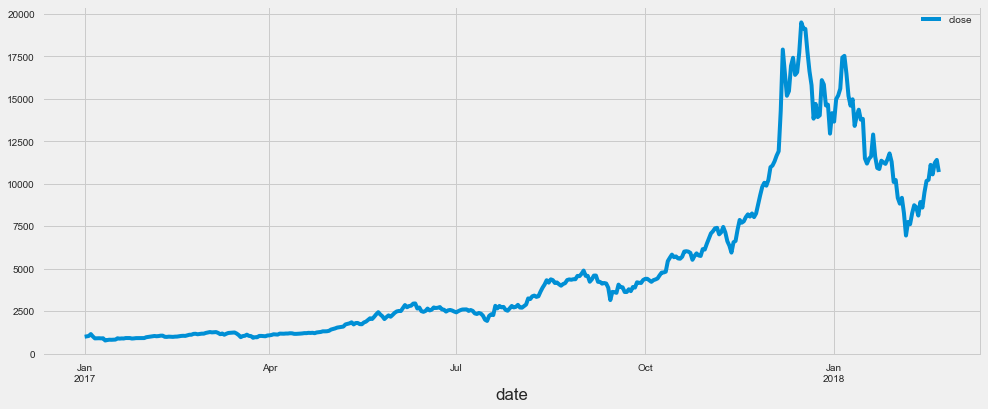

In [270]:
datasetBitcoinIndexedClose.plot(figsize=(15, 6))
plt.show()

In [271]:
datasetBitcoinMarket = datasetBitcoinIndexedMarket.reset_index()
datasetBitcoinMarket.head()

date       market
0 2017-01-01  15491200000
1 2017-01-02  16055100000
2 2017-01-03  16426600000
3 2017-01-04  16795400000
4 2017-01-05  18604000000

In [272]:
datasetBitcoinIndexedClose.columns

Index(['close'], dtype='object')

In [273]:
datasetBitcoinIndexedClose.head()

close
date               
2017-01-01   998.33
2017-01-02  1021.75
2017-01-03  1043.84
2017-01-04  1154.73
2017-01-05  1013.38

In [274]:
def showDecomposition(dataset):
    from pylab import rcParams
    import statsmodels.api as sm
    rcParams['figure.figsize'] = 11, 9
    decomposition = sm.tsa.seasonal_decompose(dataset, model='additive')
    fig = decomposition.plot()
    plt.show()

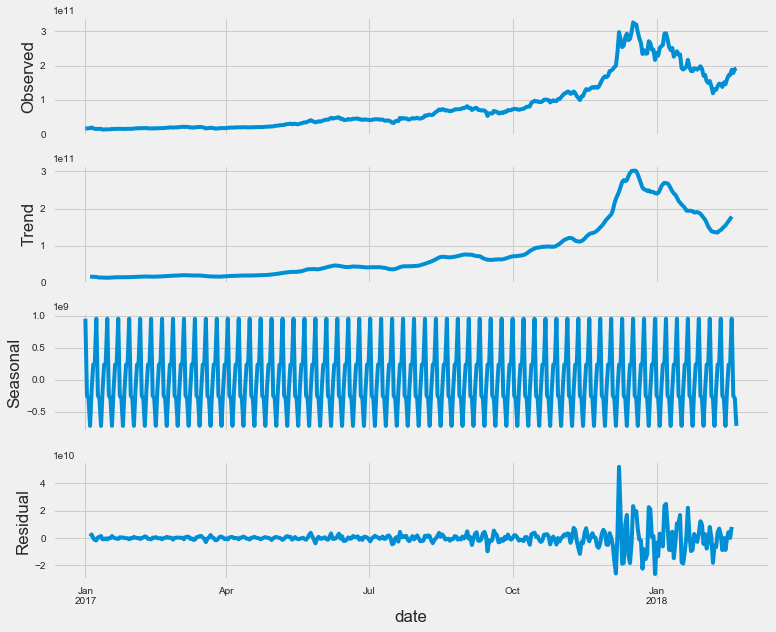

In [275]:
showDecomposition(datasetBitcoinIndexedMarket)

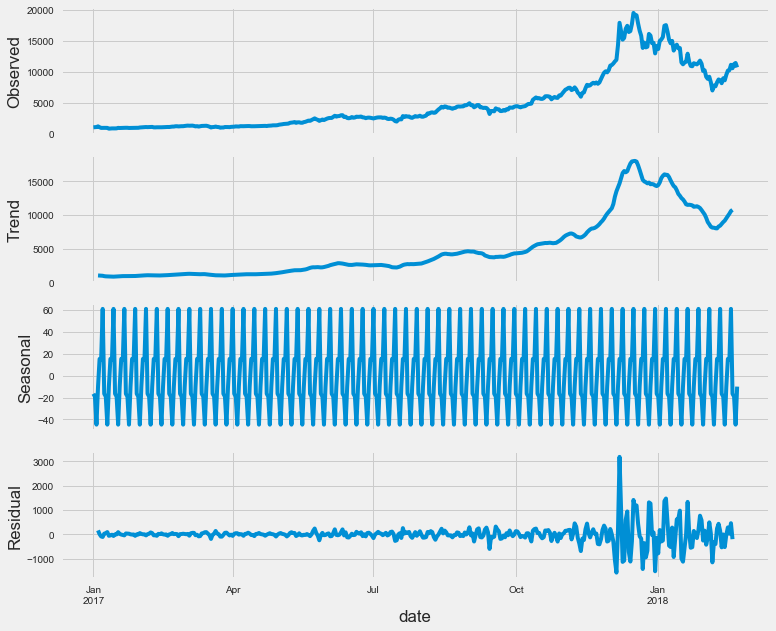

In [276]:
showDecomposition(datasetBitcoinIndexedClose)

# dealing with stationarity of time series

In [277]:
# http://dacatay.com/data-science/part-3-time-series-stationarity-python/
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
def adf_test(y):
    # perform Augmented Dickey Fuller test
    print('Results of Augmented Dickey-Fuller test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print(dfoutput)

In [278]:
# apply the function to the time series
adf_test(datasetBitcoinIndexedClose['close'].values)

Results of Augmented Dickey-Fuller test:
test statistic           -0.833735
p-value                   0.809011
# of lags                17.000000
# of observations       399.000000
Critical Value (1%)      -3.446846
Critical Value (5%)      -2.868811
Critical Value (10%)     -2.570643
dtype: float64


In [279]:
import statsmodels.tsa.api as smt
def ts_diagnostics(y, lags = None, title = '', filename = ''):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
#     weekly moving averages (5 day window because of workdays)
    rollingMean = pd.rolling_mean(y,window = 12)
    rollingStd = pd.rolling_std(y,window = 12)
    
    
    fig = plt.figure(figsize=(14,12))
    layout = (3,2)
    tsAx = plt.subplot2grid(layout,(0,0), colspan=2)
    acfAx = plt.subplot2grid(layout, (1,0))
    pacfAx = plt.subplot2grid(layout, (1,1))
    qqAx = plt.subplot2grid(layout, (2,0))
    histAx = plt.subplot2grid(layout, (2,1))
    
#     time series plot
    y.plot(ax = tsAx)
    rollingMean.plot(ax = tsAx, color = 'crimson')
    rollingStd.plot(ax = tsAx, color = 'darkslateblue' )
    plt.legend(loc='best')
    tsAx.set_title(title,fontsize=24)
    
#     acf and pacf
    smt.graphics.plot_acf(y,lags=lags, ax = acfAx, alpha=0.5)
    smt.graphics.plot_pacf(y,lags=lags, ax = pacfAx, alpha=0.5)
    
#     qq plot
    sm.qqplot(y, line = 's', ax = qqAx)
    qqAx.set_title(' QQ plot')
    
#     hist plot
    y.plot(ax = histAx, kind = 'hist', bins= 25)
    histAx.set_title('Histogram')
    plt.tight_layout()
    plt.show()
    
    adf_test(y)
    return

In [280]:
#  first order differencing
def firstOrderDifferencing(y):
    y_diff = np.diff(y)
    ts_diagnostics(y_diff, lags = 30, title = 'first order differencing')

No handles with labels found to put in legend.


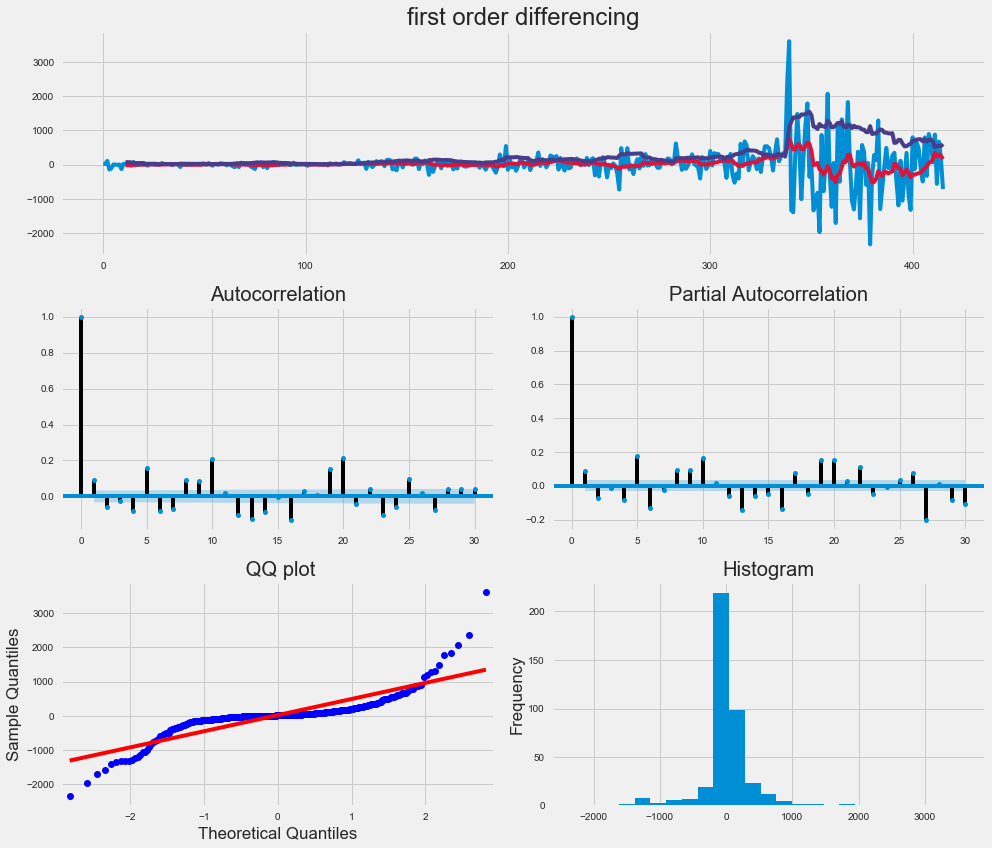

Results of Augmented Dickey-Fuller test:
test statistic           -4.370986
p-value                   0.000334
# of lags                18.000000
# of observations       397.000000
Critical Value (1%)      -3.446930
Critical Value (5%)      -2.868848
Critical Value (10%)     -2.570663
dtype: float64


In [281]:
firstOrderDifferencing(datasetBitcoinIndexedClose['close'].values)

In [282]:
def logStabalizer(df, attribute):
    new_df = df.copy(deep=True)
    y = df[attribute]
    y_log = np.log(y)
    ts_diagnostics(y_log, lags = 30, title = 'Log transformed')
    new_df[attribute] = y_log
    return new_df

No handles with labels found to put in legend.


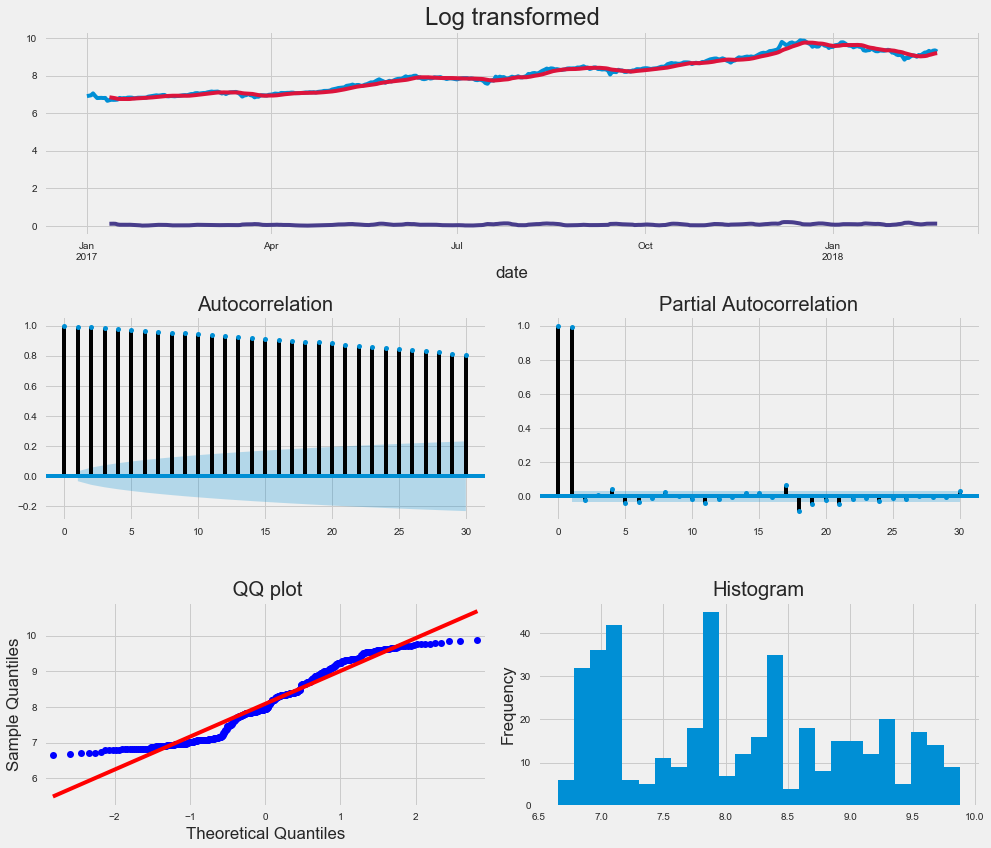

Results of Augmented Dickey-Fuller test:
test statistic           -0.567983
p-value                   0.878054
# of lags                 0.000000
# of observations       416.000000
Critical Value (1%)      -3.446168
Critical Value (5%)      -2.868513
Critical Value (10%)     -2.570484
dtype: float64


In [283]:
logstablizedCloseDF = logStabalizer(datasetBitcoinIndexedClose, 'close')

In [284]:
print(logstablizedCloseDF.head())
print(datasetBitcoinIndexedClose.head())

               close
date                
2017-01-01  6.906084
2017-01-02  6.929272
2017-01-03  6.950661
2017-01-04  7.051622
2017-01-05  6.921047
              close
date               
2017-01-01   998.33
2017-01-02  1021.75
2017-01-03  1043.84
2017-01-04  1154.73
2017-01-05  1013.38


In [285]:
def logTransformedFirstOrderDifference(df, attribute):
    y = df[attribute]
    indexes = df.index
    y_log = np.log(y)
    y_log_diff = np.diff(y_log)
    index_diff = indexes[1:]
    ts_diagnostics(y_log_diff, lags = 30, title = 'Log transformed first Differential Order')
    df_new = pd.DataFrame(data = y_log_diff, index = index_diff,columns = [attribute])
    return df_new

No handles with labels found to put in legend.


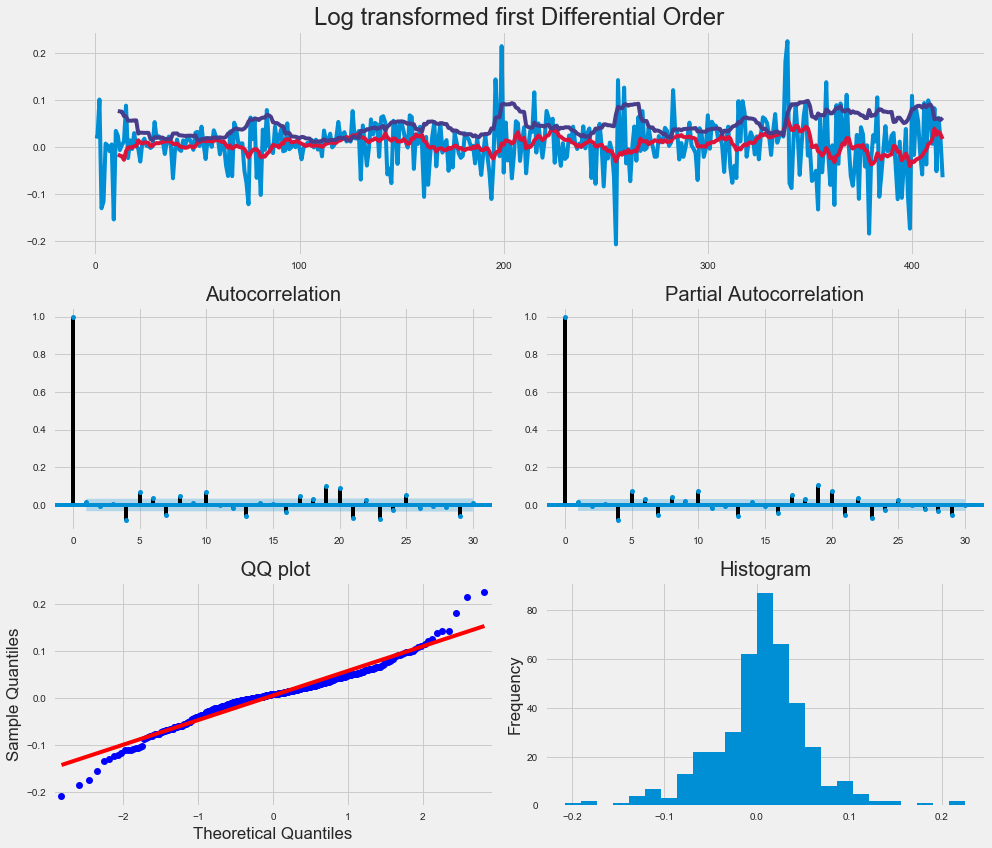

Results of Augmented Dickey-Fuller test:
test statistic          -19.970716
p-value                   0.000000
# of lags                 0.000000
# of observations       415.000000
Critical Value (1%)      -3.446206
Critical Value (5%)      -2.868530
Critical Value (10%)     -2.570493
dtype: float64


In [286]:
yLogTransformedSingleDifferentialDF = logTransformedFirstOrderDifference(datasetBitcoinIndexedClose, 'close')

In [287]:
yLogTransformedSingleDifferentialDF.head()

close
date                
2017-01-02  0.023188
2017-01-03  0.021389
2017-01-04  0.100960
2017-01-05 -0.130575
2017-01-06 -0.116210

In [288]:
def logTransformedSecondOrderDifference(df,attribute):
    indexes = df.index
    y = df[attribute]
    y_log = np.log(y)
    y_log_diff = np.diff(y_log)
    y_log_diff_diff = np.diff(y_log_diff)
    index_diff = indexes[2:]
    df_new = pd.DataFrame(data = y_log_diff_diff, index = index_diff,columns = [attribute])
#     y_log_diff_droppedNa = y_log_diff.dropna()
    ts_diagnostics(y_log_diff_diff, lags = 30, title = 'Log transformed second Differential Order')
    return df_new

No handles with labels found to put in legend.


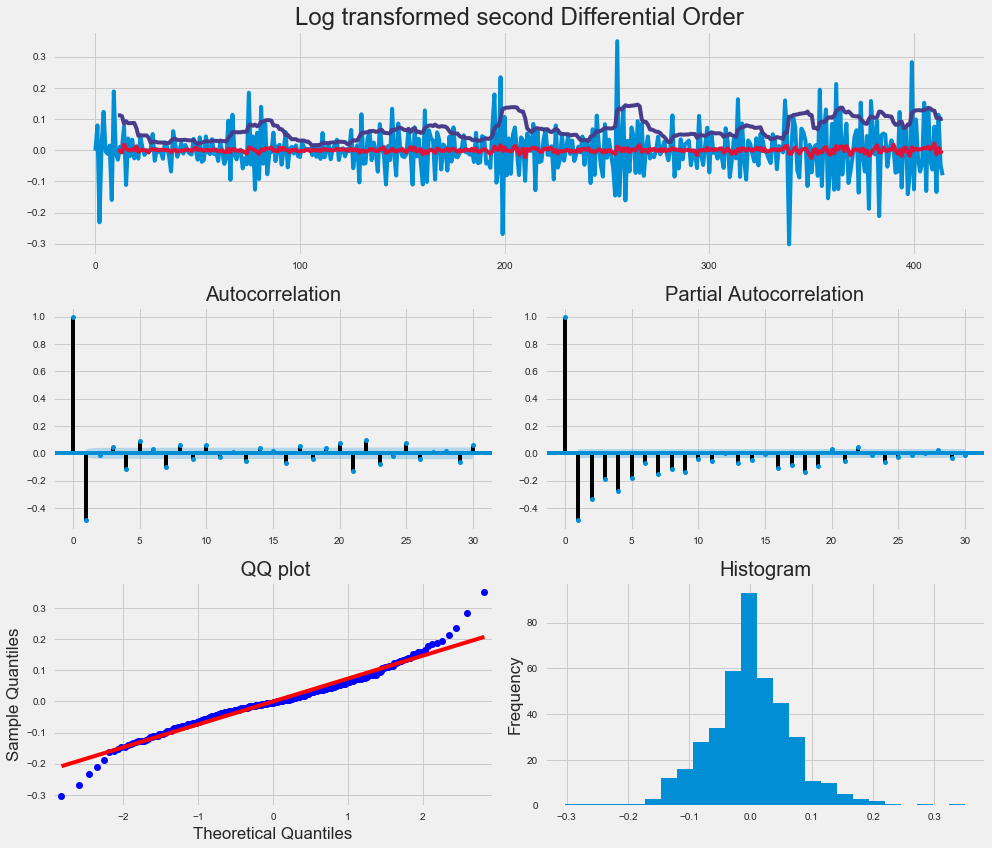

Results of Augmented Dickey-Fuller test:
test statistic         -8.991739e+00
p-value                 6.862504e-15
# of lags               1.800000e+01
# of observations       3.960000e+02
Critical Value (1%)    -3.446972e+00
Critical Value (5%)    -2.868866e+00
Critical Value (10%)   -2.570673e+00
dtype: float64


In [289]:
yLogTransformedDoubleDifferentialDF = logTransformedSecondOrderDifference(datasetBitcoinIndexedClose, 'close')

In [290]:
yLogTransformedDoubleDifferentialDF.head()

close
date                
2017-01-03 -0.001799
2017-01-04  0.079571
2017-01-05 -0.231536
2017-01-06  0.014365
2017-01-07  0.123268

In [291]:
def FirstOrderDifference(y):
#     y_log = np.log(y)
    y_diff = np.diff(y)
#     y_log_diff_diff = np.diff(y_log_diff)
#     y_log_diff_droppedNa = y_log_diff.dropna()
    ts_diagnostics(y_diff, lags = 30, title = 'first Differential Order')
    return y_diff

No handles with labels found to put in legend.


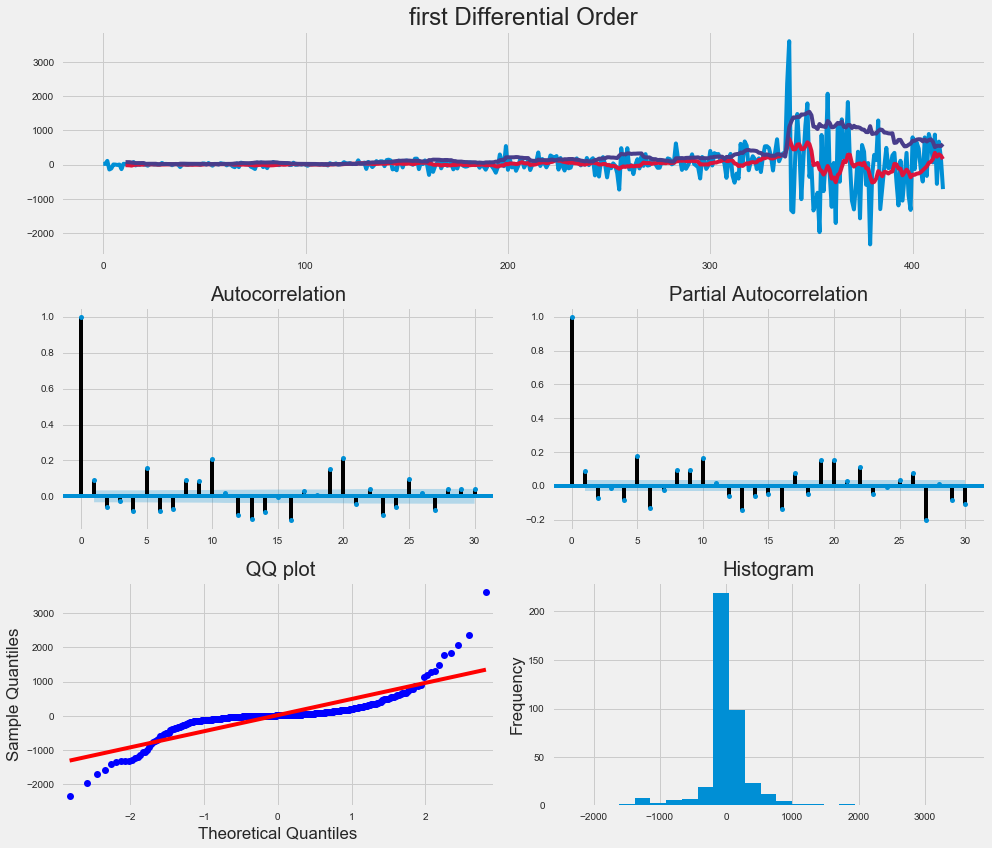

Results of Augmented Dickey-Fuller test:
test statistic           -4.370986
p-value                   0.000334
# of lags                18.000000
# of observations       397.000000
Critical Value (1%)      -3.446930
Critical Value (5%)      -2.868848
Critical Value (10%)     -2.570663
dtype: float64


In [292]:
ySingleDifferential = FirstOrderDifference(datasetBitcoinIndexedClose['close'].values)

In [ ]:
def SecondOrderDifference(y):
#     y_log = np.log(y)
    y_diff = np.diff(y)
    y_diff_diff = np.diff(y_diff)
#     y_log_diff_diff = np.diff(y_log_diff)
#     y_log_diff_droppedNa = y_log_diff.dropna()
    ts_diagnostics(y_diff_diff, lags = 30, title = 'Second Differential Order')
    return y_diff_diff

In [ ]:
ySingleDifferential = SecondOrderDifference(datasetBitcoinIndexedClose['close'].values)

No handles with labels found to put in legend.


# ACF, PACF graphs

In [ ]:
#  plotting ACF
from statsmodels.tsa.stattools import acf, pacf
lag = 150
lag_acf = acf(datasetBitcoinIndexedClose, nlags=lag)
plt.figure(figsize = (20,10))
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color = 'grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetBitcoinIndexedClose)), linestyle = '--', color = 'grey')
plt.axhline(y=1.96/np.sqrt(len(datasetBitcoinIndexedClose)), linestyle = '--', color = 'grey')
plt.title('ACF Plot for datasetBitcoinIndexedClose')
plt.tight_layout()
plt.show()

In [ ]:
#  plotting PACF
from statsmodels.tsa.stattools import acf, pacf
lag = 5
lag_pacf = pacf(datasetBitcoinIndexedClose, nlags=lag, method = 'ols')
plt.figure(figsize = (20,10))
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle = '--', color = 'grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetBitcoinIndexedClose)), linestyle = '--', color = 'grey')
plt.axhline(y=1.96/np.sqrt(len(datasetBitcoinIndexedClose)), linestyle = '--', color = 'grey')
plt.title('PACF Plot for datasetBitcoinIndexedClose')
plt.tight_layout()
plt.show()

In [ ]:
#  plotting ACF
from statsmodels.tsa.stattools import acf, pacf
lag = 10
lag_acf = acf(yLogTransformedDoubleDifferentialDF, nlags=lag)
plt.figure(figsize = (20,10))
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color = 'grey')
plt.axhline(y=-1.96/np.sqrt(len(yLogTransformedDoubleDifferentialDF)), linestyle = '--', color = 'grey')
plt.axhline(y=1.96/np.sqrt(len(yLogTransformedDoubleDifferentialDF)), linestyle = '--', color = 'grey')
plt.title('ACF Plot for yLogTransformedDoubleDifferentialDF')
plt.tight_layout()
plt.show()

In [ ]:
#  plotting PACF
from statsmodels.tsa.stattools import acf, pacf
lag = 5
lag_pacf = pacf(yLogTransformedDoubleDifferentialDF, nlags=lag, method = 'ols')
plt.figure(figsize = (20,10))
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle = '--', color = 'grey')
plt.axhline(y=-1.96/np.sqrt(len(yLogTransformedDoubleDifferentialDF)), linestyle = '--', color = 'grey')
plt.axhline(y=1.96/np.sqrt(len(yLogTransformedDoubleDifferentialDF)), linestyle = '--', color = 'grey')
plt.title('PACF Plot for yLogTransformedDoubleDifferentialDF')
plt.tight_layout()
plt.show()

In [ ]:
#  plotting ACF
from statsmodels.tsa.stattools import acf, pacf
lag = 5
lag_acf = acf(yLogTransformedSingleDifferentialDF, nlags=lag)
plt.figure(figsize = (20,10))
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color = 'grey')
plt.axhline(y=-1.96/np.sqrt(len(yLogTransformedSingleDifferentialDF)), linestyle = '--', color = 'grey')
plt.axhline(y=1.96/np.sqrt(len(yLogTransformedSingleDifferentialDF)), linestyle = '--', color = 'grey')
plt.title('ACF Plot for yLogTransformedSingleDifferential')
plt.tight_layout()
plt.show()

In [ ]:
#  plotting PACF
from statsmodels.tsa.stattools import acf, pacf
lag = 5
lag_pacf = pacf(yLogTransformedSingleDifferentialDF, nlags=lag, method = 'ols')
plt.figure(figsize = (20,10))
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle = '--', color = 'grey')
plt.axhline(y=-1.96/np.sqrt(len(yLogTransformedSingleDifferentialDF)), linestyle = '--', color = 'grey')
plt.axhline(y=1.96/np.sqrt(len(yLogTransformedSingleDifferentialDF)), linestyle = '--', color = 'grey')
plt.title('PACF Plot for yLogTransformedSingleDifferential')
plt.tight_layout()
plt.show()

#  SARIMAX Model

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [ ]:
# Load data
dataset = pd.read_csv('crypto-markets.csv')
dataset.head()

In [ ]:
bitcoinDataset = dataset.loc[dataset.name == 'Bitcoin']
bitcoinDataset.head()

In [ ]:
# # Unix-time to 
bitcoinDataset.date = pd.to_datetime(bitcoinDataset.date)

# # Resampling to daily frequency
bitcoinDataset.index = bitcoinDataset.date


# # Resampling to monthly frequency
bitcoinDataset_month = bitcoinDataset.resample('M').mean()

# # # Resampling to annual frequency
bitcoinDataset_year = bitcoinDataset.resample('A-DEC').mean()

# # # Resampling to quarterly frequency
bitcoinDataset_Q = bitcoinDataset.resample('Q-DEC').mean()

In [ ]:
bitcoinDataset_Q.head()

In [ ]:
# dataset.head()
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(bitcoinDataset_month.close).plot()

print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(bitcoinDataset_month.close)[1])
plt.show()

In [ ]:
# Box-Cox Transformations
bitcoinDataset_month['Close_Price_box'], lmbda = stats.boxcox(bitcoinDataset_month.close)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(bitcoinDataset_month.close)[1])

In [ ]:
    # Seasonal differentiation
bitcoinDataset_month['prices_box_diff'] = bitcoinDataset_month.Close_Price_box - bitcoinDataset_month.Close_Price_box.shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(bitcoinDataset_month.prices_box_diff[12:])[1])



In [ ]:
# Regular differentiation
bitcoinDataset_month['prices_box_diff2'] = bitcoinDataset_month.prices_box_diff - bitcoinDataset_month.prices_box_diff.shift(1)
plt.figure(figsize=(15,7))

# STL-decomposition
sm.tsa.seasonal_decompose(bitcoinDataset_month.prices_box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(bitcoinDataset_month.prices_box_diff2[13:])[1])

plt.show()

In [ ]:
bitcoinDataset_month

In [ ]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(bitcoinDataset_month.prices_box_diff2[13:].values.squeeze(), lags=30, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(bitcoinDataset_month.prices_box_diff2[13:].values.squeeze(), lags=30, ax=ax)
plt.tight_layout()
plt.show()

In [ ]:
bitcoinDataset_month

In [ ]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(bitcoinDataset_month.Close_Price_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [ ]:
bitcoinDataset_month.Close_Price_box

In [ ]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

In [ ]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel('Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=30, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

In [ ]:
len(best_model.resid[13:].values)

In [ ]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(np.absolute(lmbda*y+1))/lmbda))

In [ ]:
# Prediction
bitcoinDataset_month2 = bitcoinDataset_month[['close']]
date_list = [datetime(2017, 6, 30), datetime(2017, 7, 31), datetime(2017, 8, 31), datetime(2017, 9, 30), 
             datetime(2017, 10, 31), datetime(2017, 11, 30), datetime(2017, 12, 31), datetime(2018, 1, 31),
             datetime(2018, 2, 28), datetime(2018, 3, 31), datetime(2018, 4, 30), datetime(2018, 5, 31),
             datetime(2018, 6, 30), datetime(2018, 7, 31), datetime(2018, 8, 31), datetime(2018, 9, 30), 
            datetime(2018, 10, 31)]
future = pd.DataFrame(index=date_list, columns= bitcoinDataset_month.columns)
bitcoinDataset_month2 = pd.concat([bitcoinDataset_month2, future])
bitcoinDataset_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
plt.figure(figsize=(15,7))
bitcoinDataset_month2.close.plot(label='Actual close_Price')
bitcoinDataset_month2.forecast.plot(color='r', ls='--', label='Predicted close_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('Monthly USD')
plt.show()

In [ ]:
#  Prediction
bitcoinDataset_month2 = bitcoinDataset_month[['close']]
# df = pd.DataFrame(invboxcox(best_model.predict(start=10, end=80), lmbda), columns = ['forecast'])
date_list = [datetime(2017, 6, 30), datetime(2017, 7, 31), datetime(2017, 8, 31), datetime(2017, 9, 30), 
             datetime(2017, 10, 31), datetime(2017, 11, 30), datetime(2017, 12, 31), datetime(2018, 1, 31),
             datetime(2018, 2, 28), datetime(2018, 3, 31), datetime(2018, 4, 30), datetime(2018, 5, 31),
             datetime(2018, 6, 30), datetime(2018, 7, 31), datetime(2018, 8, 31), datetime(2018, 9, 30), 
            datetime(2018, 10, 31), datetime(2018, 11, 30), datetime(2018, 12, 31), datetime(2019, 1, 31), 
            datetime(2019, 2, 28)]

future = pd.DataFrame(index=date_list, columns= bitcoinDataset_month.columns)
bitcoinDataset_month2 = pd.concat([bitcoinDataset_month2, future])
# bitcoinDataset_month2['forecast'] = df['forecast']
bitcoinDataset_month2['forecast'] = invboxcox(best_model.predict(start=10, end=80), lmbda)
# bitcoinDataset_month2['forecast'] = best_model.predict(start=10, end=80)
plt.figure(figsize=(15,7))
bitcoinDataset_month2.close.plot()
bitcoinDataset_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()

In [ ]:
fig = plt.figure()
ax2 = fig.add_subplot(212)
xt, lmbda = stats.boxcox(bitcoinDataset_month2.close)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

In [2]:
fileLoc = './crypto-markets.csv'
data = pd.read_csv(fileLoc)
data = data.dropna()

In [3]:
#most recent data for all the coins
last_date = '2018-02-21'
coins_last = data.loc[data['date'] == last_date]

In [4]:
coins_last = coins_last.reset_index(drop='true')

# Calculating optimal clustering value

In [5]:
# (c) 2014 Reid Johnson
#
# Modified from:
# (c) 2013 Mikael Vejdemo-Johansson
# BSD License
#
# SciPy function to compute the gap statistic for evaluating k-means clustering.
#
# The gap statistic is defined by Tibshirani, Walther, Hastie in:
#  Estimating the number of clusters in a data set via the gap statistic
#  J. R. Statist. Soc. B (2001) 63, Part 2, pp 411-423

import scipy as sp
import scipy as sp
import scipy.cluster.vq
import scipy.spatial.distance
import scipy.stats
import sklearn.cluster

import pylab as pl

dst = sp.spatial.distance.euclidean

def gap_statistics(data, refs=None, nrefs=20, ks=range(1,11)):
    """Computes the gap statistics for an nxm dataset.

    The gap statistic measures the difference between within-cluster dispersion on an input
    dataset and that expected under an appropriate reference null distribution.

    Computation of the gap statistic, then, requires a series of reference (null) distributions.
    One may either input a precomputed set of reference distributions (via the parameter refs)
    or specify the number of reference distributions (via the parameter nrefs) for automatic 
    generation of uniform distributions within the bounding box of the dataset (data).

    Each computation of the gap statistic requires the clustering of the input dataset and of
    several reference distributions. To identify the optimal number of clusters k, the gap 
    statistic is computed over a range of possible values of k (via the parameter ks).

    For each value of k, within-cluster dispersion is calculated for the input dataset and each
    reference distribution. The calculation of the within-cluster dispersion for the reference
    distributions will have a degree of variation, which we measure by standard deviation or
    standard error.

    The estimated optimal number of clusters, then, is defined as the smallest value k such that
    gap_k is greater than or equal to the sum of gap_k+1 minus the expected error err_k+1.

    Args:
      data ((n,m) SciPy array): The dataset on which to compute the gap statistics.
      refs ((n,m,k) SciPy array, optional): A precomputed set of reference distributions. 
        Defaults to None.
      nrefs (int, optional): The number of reference distributions for automatic generation. 
        Defaults to 20.
      ks (list, optional): The list of values k for which to compute the gap statistics. 
        Defaults to range(1,11), which creates a list of values from 1 to 10.

    Returns:
      gaps: an array of gap statistics computed for each k.
      errs: an array of standard errors (se), with one corresponding to each gap computation.
      difs: an array of differences between each gap_k and the sum of gap_k+1 minus err_k+1.

    """
    shape = data.shape

    if refs==None:
        tops = data.max(axis=0) # maxima along the first axis (rows)
        bots = data.min(axis=0) # minima along the first axis (rows)
        dists = sp.matrix(sp.diag(tops-bots)) # the bounding box of the input dataset

        # Generate nrefs uniform distributions each in the half-open interval [0.0, 1.0)
        rands = sp.random.random_sample(size=(shape[0],shape[1], nrefs))

        # Adjust each of the uniform distributions to the bounding box of the input dataset
        for i in range(nrefs):
            rands[:,:,i] = rands[:,:,i]*dists+bots
    else:
        rands = refs

    gaps = sp.zeros((len(ks),))   # array for gap statistics (lenth ks)
    errs = sp.zeros((len(ks),))   # array for model standard errors (length ks)
    difs = sp.zeros((len(ks)-1,)) # array for differences between gaps (length ks-1)

    for (i,k) in enumerate(ks): # iterate over the range of k values
        # Cluster the input dataset via k-means clustering using the current value of k
        try:
            (kmc,kml) = sp.cluster.vq.kmeans2(data, k)
        except LinAlgError:
            kmeans = sklearn.cluster.KMeans(n_clusters=k).fit(data)
            (kmc, kml) = kmeans.cluster_centers_, kmeans.labels_

        # Generate within-dispersion measure for the clustering of the input dataset
        disp = sum([dst(data[m,:],kmc[kml[m],:]) for m in range(shape[0])])

        # Generate within-dispersion measures for the clusterings of the reference datasets
        refdisps = sp.zeros((rands.shape[2],))
        for j in range(rands.shape[2]):
            # Cluster the reference dataset via k-means clustering using the current value of k
            try:
                (kmc,kml) = sp.cluster.vq.kmeans2(rands[:,:,j], k)
            except LinAlgError:
                kmeans = sklearn.cluster.KMeans(n_clusters=k).fit(rands[:,:,j])
                (kmc, kml) = kmeans.cluster_centers_, kmeans.labels_

            refdisps[j] = sum([dst(rands[m,:,j],kmc[kml[m],:]) for m in range(shape[0])])

        # Compute the (estimated) gap statistic for k
        gaps[i] = sp.mean(sp.log(refdisps) - sp.log(disp))

        # Compute the expected error for k
        errs[i] = sp.sqrt(sum(((sp.log(refdisp)-sp.mean(sp.log(refdisps)))**2) \
                              for refdisp in refdisps)/float(nrefs)) * sp.sqrt(1+1/nrefs)

    # Compute the difference between gap_k and the sum of gap_k+1 minus err_k+1
    difs = sp.array([gaps[k] - (gaps[k+1]-errs[k+1]) for k in range(len(gaps)-1)])

    #print "Gaps: " + str(gaps)
    #print "Errs: " + str(errs)
    #print "Difs: " + str(difs)

    return gaps, errs, difs

def plot_gap_statistics(gaps, errs, difs):
    """Generates and shows plots for the gap statistics.

    A figure with two subplots is generated. The first subplot is an errorbar plot of the 
    estimated gap statistics computed for each value of k. The second subplot is a barplot 
    of the differences in the computed gap statistics.

    Args:
      gaps (SciPy array): An array of gap statistics, one computed for each k.
      errs (SciPy array): An array of standard errors (se), with one corresponding to each gap 
        computation.
      difs (SciPy array): An array of differences between each gap_k and the sum of gap_k+1 
        minus err_k+1.

    """
    # Create a figure
    fig = pl.figure(figsize=(16, 4))

    pl.subplots_adjust(wspace=0.35) # adjust the distance between figures

    # Subplot 1
    ax = fig.add_subplot(121)
    ind = range(1,len(gaps)+1) # the x values for the gaps

    # Create an errorbar plot
    rects = ax.errorbar(ind, gaps, yerr=errs, xerr=None, linewidth=1.0)

    # Add figure labels and ticks
    ax.set_title('Clustering Gap Statistics', fontsize=16)
    ax.set_xlabel('Number of clusters k', fontsize=14)
    ax.set_ylabel('Gap Statistic', fontsize=14)
    ax.set_xticks(ind)

    # Add figure bounds
    ax.set_ylim(0, max(gaps+errs)*1.1)
    ax.set_xlim(0, len(gaps)+1.0)

    # Subplot 2
    ax = fig.add_subplot(122)
    ind = range(1,len(difs)+1) # the x values for the difs
    
    max_gap = None
    if len(np.where(difs > 0)[0]) > 0:
        max_gap = np.where(difs > 0)[0][0] + 1 # the k with the first positive dif

    # Create a bar plot
    ax.bar(ind, difs, alpha=0.5, color='g', align='center')

    # Add figure labels and ticks
    if max_gap:
        ax.set_title('Clustering Gap Differences\n(k=%d Estimated as Optimal)' % (max_gap), \
                     fontsize=16)
    else:
        ax.set_title('Clustering Gap Differences\n', fontsize=16)
    ax.set_xlabel('Number of clusters k', fontsize=14)
    ax.set_ylabel('Gap Difference', fontsize=14)
    ax.xaxis.set_ticks(range(1,len(difs)+1))

    # Add figure bounds
    ax.set_ylim(min(difs)*1.2, max(difs)*1.2)
    ax.set_xlim(0, len(difs)+1.0)

    # Show the figure
    pl.show()

# (c) 2014 Reid Johnson
# BSD License
#
# Function to compute the sum of squared distance (SSQ) for evaluating k-means clustering.

import numpy as np
import scipy as sp
import sklearn.cluster
from scipy.spatial.distance import cdist, pdist

import pylab as pl

def ssq_statistics(data, ks=range(1,11), ssq_norm=True):
    """Computes the sum of squares for an nxm dataset.

    The sum of squares (SSQ) is a measure of within-cluster variation that measures the sum of 
    squared distances from cluster prototypes.

    Each computation of the SSQ requires the clustering of the input dataset. To identify the 
    optimal number of clusters k, the SSQ is computed over a range of possible values of k 
    (via the parameter ks). For each value of k, within-cluster dispersion is calculated for the 
    input dataset.

    The estimated optimal number of clusters, then, is defined as the value of k prior to an
    "elbow" point in the plot of SSQ values.

    Args:
      data ((n,m) SciPy array): The dataset on which to compute the gap statistics.
      ks (list, optional): The list of values k for which to compute the gap statistics. 
        Defaults to range(1,11), which creates a list of values from 1 to 10.

    Returns:
      ssqs: an array of SSQs, one computed for each k.

    """
    ssqs = sp.zeros((len(ks),)) # array for SSQs (lenth ks)

    #n_samples, n_features = data.shape # the number of rows (samples) and columns (features)
    #if n_samples >= 2500:
    #    # Generate a small sub-sample of the data
    #    data_sample = shuffle(data, random_state=0)[:1000]
    #else:
    #    data_sample = data

    for (i,k) in enumerate(ks): # iterate over the range of k values        
        # Fit the model on the data
        kmeans = sklearn.cluster.KMeans(n_clusters=k, random_state=0).fit(data)

        # Predict on the data (k-means) and get labels
        #labels = kmeans.predict(data)

        if ssq_norm:
            dist = np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)

            tot_withinss = sum(dist**2) # Total within-cluster sum of squares
            totss = sum(pdist(data)**2) / data.shape[0] # The total sum of squares
            betweenss = totss - tot_withinss # The between-cluster sum of squares
            ssqs[i] = betweenss/totss*100
        else:
            # The sum of squared error (SSQ) for k
            ssqs[i] = kmeans.inertia_

    return ssqs

def plot_ssq_statistics(ssqs):
    """Generates and shows plots for the sum of squares (SSQ).

    A figure with one plot is generated. The plot is a bar plot of the SSQ computed for each 
    value of k.

    Args:
      ssqs (SciPy array): An array of SSQs, one computed for each k.

    """
    # Create a figure
    fig = pl.figure(figsize=(20, 13))

    ind = range(1,len(ssqs)+1) # the x values for the ssqs
    width = 0.5 # the width of the bars

    # Create a bar plot
    #rects = pl.bar(ind, ssqs, width)
    pl.plot(ind, ssqs, linewidth=5.0)

    # Add figure labels and ticks
    pl.title('Clustering Sum of Squared Distances', fontsize=16)
    pl.xlabel('Number of clusters k', fontsize=14)
    pl.ylabel('Sum of Squared Distance (SSQ)', fontsize=14)
    pl.xticks(ind)

    # Add text labels
    #for rect in rects:
    #    height = rect.get_height()
    #    pl.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d' % int(height), \
    #            ha='center', va='bottom')

    # Add figure bounds
    pl.tick_params(axis='both', which='major', labelsize=16)
    pl.tick_params(axis='both', which='minor', labelsize=16)
    pl.ylim(0, max(ssqs)*1.2)
    pl.xlim(0, len(ssqs)+1.0)

    pl.show()

# Clustering

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

### Clusteting using Market cap and close value

In [7]:
#Only reataining required values
coins_table = coins_last.drop(columns=['slug', 'symbol', 'name', 'ranknow','date', 'open', 'high', 'close_ratio','spread','low', 'volume'])

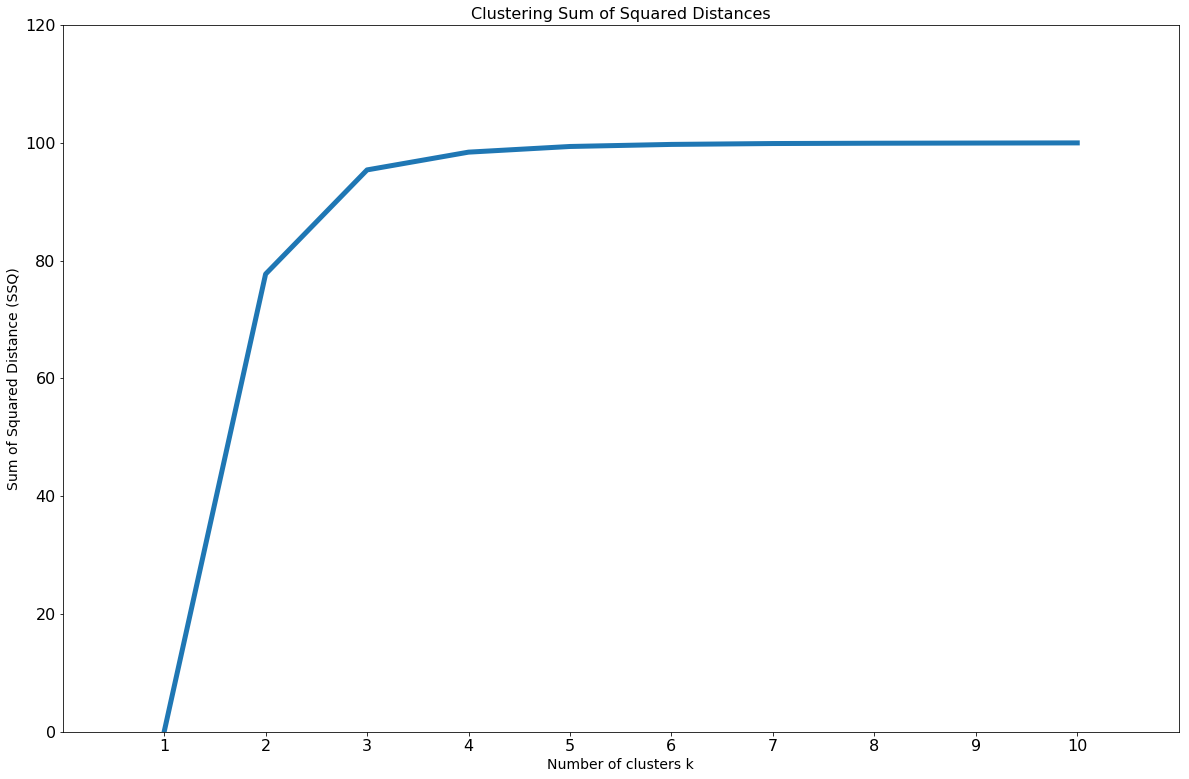

In [8]:

ssqs = ssq_statistics(coins_table,ks=range(1 ,10+1))
plot_ssq_statistics(ssqs)

The optimum clustering value is 4

In [9]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(coins_table)
y_kmeans = kmeans.predict(coins_table)

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(coins_table.iloc[:, 0], coins_table.iloc[:, 1],s=100, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='Red', s=300, alpha=0.5);
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xlabel('Close Price', fontsize=15)
plt.ylabel('Market Cap', fontsize=15)

Text(0,0.5,'Market Cap')

### Clutering using volume, market cap and close value

In [11]:
#Cleaning up coins with incorrect data
coins_table = coins_last.drop(columns=['slug', 'symbol', 'name', 'ranknow','date', 'open', 'high', 'close_ratio','spread','low'])

In [12]:

ssqs = ssq_statistics(coins_table,ks=range(1 ,10+1))
plot_ssq_statistics(ssqs)

The optimum clustering value is 4

In [13]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(coins_table)
# Predicting the clusters
labels = kmeans.predict(coins_table)
# Getting the cluster centers
C = kmeans.cluster_centers_

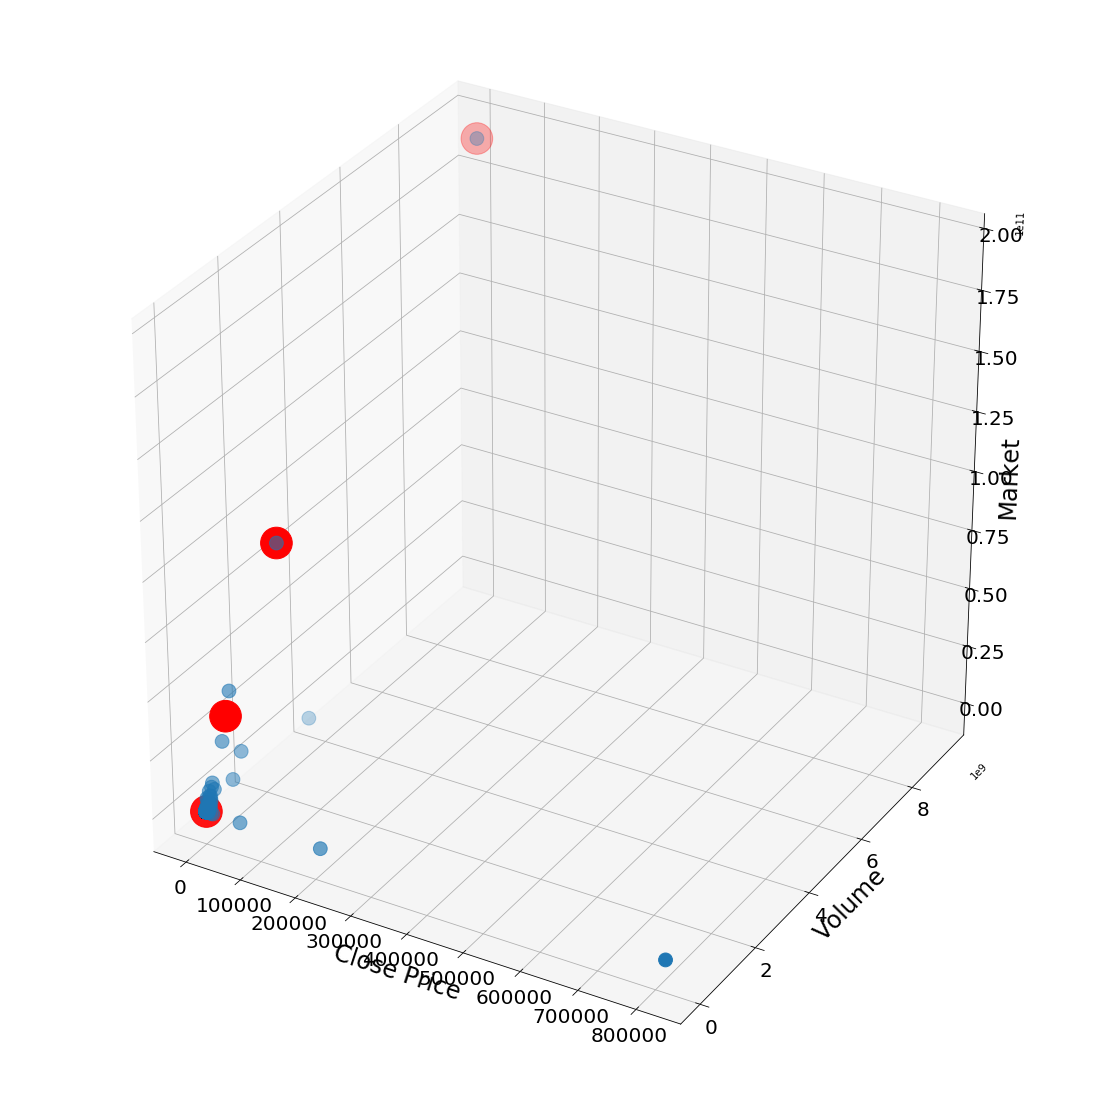

In [14]:
# plotting clustering graph
fig = plt.figure(figsize=(15,15))
ax = Axes3D(fig)
ax.set_xlabel('Close Price', fontsize=24)
ax.set_ylabel('Volume', fontsize=24)
ax.set_zlabel('Market', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.scatter(coins_table.iloc[:, 0], coins_table.iloc[:, 1], coins_table.iloc[:, 2], s=190)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='.', c='Red', s=4000)

# Data percentage for cryptocurrencies

In [15]:
values = data['slug'].value_counts().keys().tolist()[:10]
counts = data['slug'].value_counts().tolist()
values.insert(len(values), 'Others')

In [16]:
limt_count = counts[:10]
limt_count.insert(len(limt_count), sum(counts[10:50]))

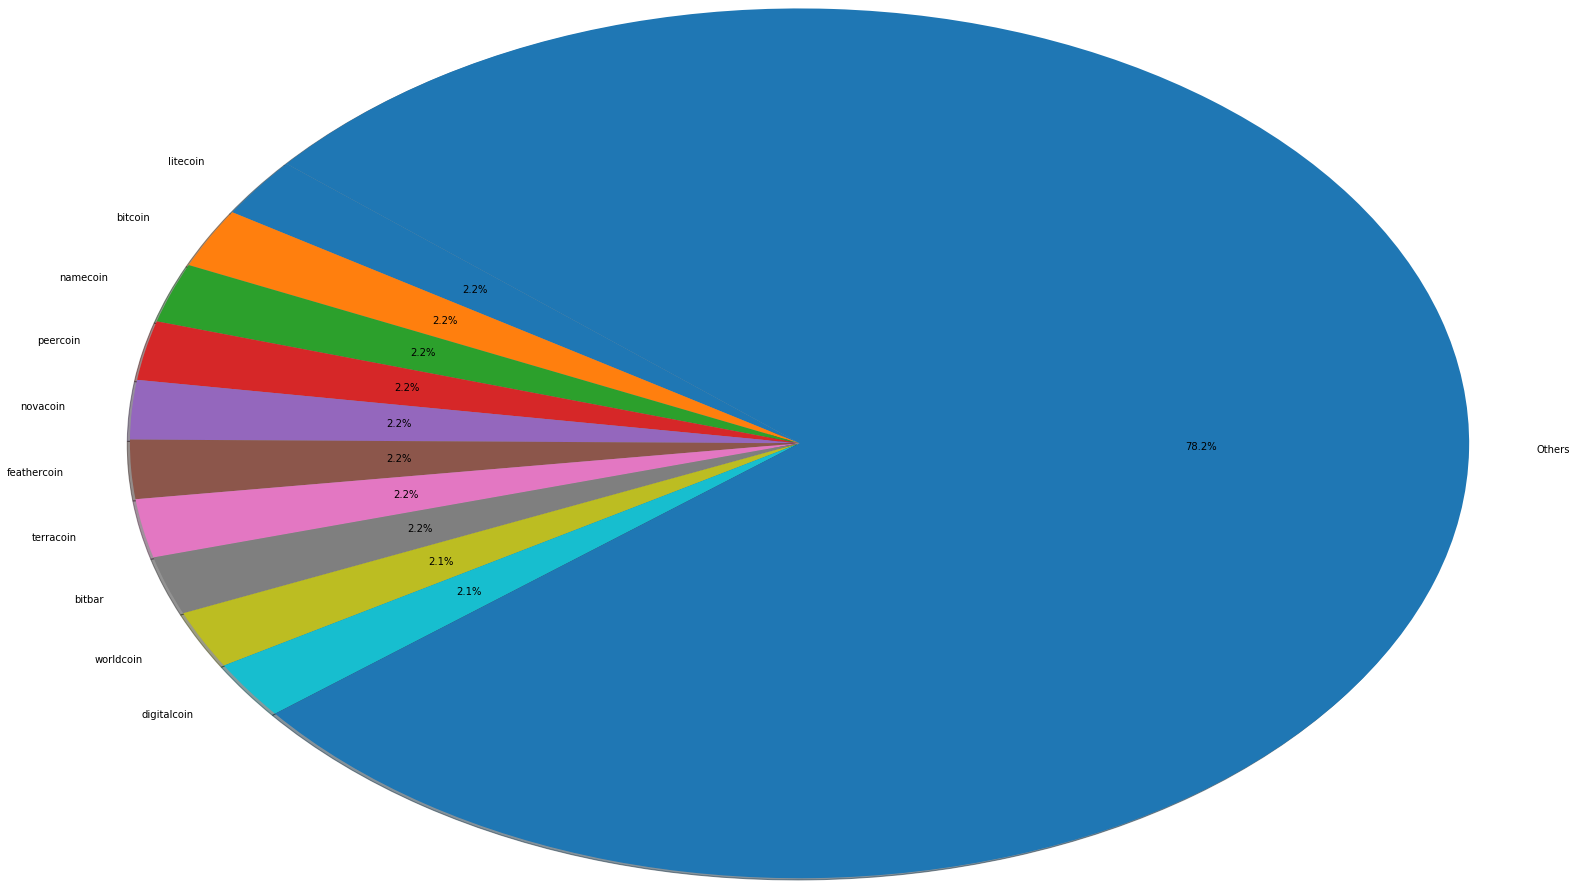

In [17]:
import matplotlib.pyplot as plt
plt.pie(limt_count, labels=values,
        autopct='%1.1f%%', radius=5 ,shadow=True, startangle=140)
plt.rc('font', size=30) 
plt.show()

# LSTM implementation and evaluation

In [18]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

C:\Users\raghu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [19]:
#Convert an array of values into a dataset matrix
def dataset_generate(data, step_size=1):
    dataX, dataY = [], []
    for i in range(len(data)- step_size -1):
        a = data[i:(i+ step_size), 0]
        dataX.append(a)
        dataY.append(data[i + step_size, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [20]:
def predict_perform(coin_name, feature):
    #Fix random seed for reproducibility
    new_data = {}
    for coin_name in data_name_unique[:3]:
        coin = data.loc[data['symbol'] == coin_name]
        coin_close = coin[[feature]].reset_index(drop=True)
        print(coin_name)
        print(coin_close)
        new_data[coin_name] = coin_close
    
    numpy.random.seed(7)
    dataset = new_data[coin_name]
    dataset = dataset.values
    dataset = dataset.astype('float32')
     
    #Normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    
    # Split into train and test sets
    train_size = int(len(dataset) * 0.98)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

    # Reshape into X=t and Y=t+1
    step_size = 1
    trainX, trainY = dataset_generate(train, step_size)
    testX, testY = dataset_generate(test, step_size)
    
    
    # Reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    
    model = Sequential()
    model.add(LSTM(100, activation='tanh', input_dim= step_size))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, nb_epoch=25, batch_size=1, verbose=2)
    # make predictions

    trainPredict = model.predict(trainX)
    trainLen = len(trainPredict)
    testPredict = []
 
    input = trainY[-1]
    temp = [[input]]
    predX = [temp]
 
    a = model.predict(numpy.array(predX))
    b = a.tolist ()
    predX = [b]
    testPredict.append(b[0])
    
    for i in range(test_size - 3):
        print ('Iteration %d: Done' % i)
        trainX = numpy.concatenate([trainX, [b]])
        trainY = numpy.concatenate ([trainY, b[0]])
        model.fit (trainX, trainY, nb_epoch=25, batch_size=1, verbose=2)
        a = model.predict (numpy.array ([b]))
        b = a.tolist ()
        testPredict.append (b[0])
        print ('Prediction %d:'%i, b)
    
    testPredict = numpy.array(testPredict)
    

    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    testPredict = scaler.inverse_transform(numpy.array(testPredict))

    print(trainPredict);
    print(testPredict);
    
    trainScore = math.sqrt(mean_squared_error(trainY[:trainLen], trainPredict))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY, testPredict))
    print('Test Score: %.2f RMSE' % (testScore))
    

    testPredict = numpy.pad(testPredict, (len(trainPredict),0), 'constant', constant_values=(np.nan, 0))
    # plot baseline and predictions
    plt.figure(figsize=(50,30))
    plt.tick_params(axis='both', which='major', labelsize=40)
    plt.tick_params(axis='both', which='minor', labelsize=40)

    a = plt.plot(scaler.inverse_transform(dataset), label='dataset', linewidth=7.0)
    b = plt.plot(trainPredict, label='Trained Predicton', linewidth=7.0)
    c = plt.plot(testPredict, label='Test Prediction', linewidth=7.0)
    plt.legend(loc=2, prop={'size': 40}, labels=["dataset",'Trained Predicton','Test Prediction'])
    plt.ylabel('Close Price', fontsize=50)
    plt.xlabel('Time Series Data from 2013 to 2018', fontsize=50)
    plt.show()

BTC
            market
0       1500520000
1       1491160000
2       1597780000
3       1542820000
4       1292190000
5       1180070000
6       1089890000
7       1254760000
8       1289470000
9       1248470000
10      1219450000
11      1259980000
12      1255970000
13      1311050000
14      1288630000
15      1279980000
16      1315720000
17      1242760000
18      1274620000
19      1319590000
20      1379140000
21      1376370000
22      1368910000
23      1363940000
24      1374130000
25      1384780000
26      1413300000
27      1489950000
28      1478030000
29      1495520000
...            ...
1731  184087000000
1732  183419000000
1733  192163000000
1734  189398000000
1735  188054000000
1736  193133000000
1737  197871000000
1738  190339000000
1739  170183000000
1740  172372000000
1741  153953000000
1742  149085000000
1743  154553000000
1744  139325000000
1745  118810000000
1746  130683000000
1747  128714000000
1748  139412000000
1749  146981000000
1750  145245000000
1751  13

C:\Users\raghu\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\raghu\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(100, activation="tanh", input_shape=(None, 1))`
C:\Users\raghu\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1
 - 5s - loss: 0.0040
Iteration 0: Done
Epoch 1/1
 - 4s - loss: 1.8814e-04
Prediction 0: [[0.6945206522941589]]
Iteration 1: Done
Epoch 1/1
 - 4s - loss: 1.9215e-04
Prediction 1: [[0.6457444429397583]]
Iteration 2: Done
Epoch 1/1
 - 4s - loss: 2.1410e-04
Prediction 2: [[0.6526480913162231]]
Iteration 3: Done
Epoch 1/1
 - 4s - loss: 2.0533e-04
Prediction 3: [[0.641741156578064]]
Iteration 4: Done
Epoch 1/1
 - 4s - loss: 1.7029e-04
Prediction 4: [[0.6208735108375549]]
Iteration 5: Done
Epoch 1/1
 - 5s - loss: 1.7321e-04
Prediction 5: [[0.5888683199882507]]
Iteration 6: Done
Epoch 1/1
 - 4s - loss: 1.3810e-04
Prediction 6: [[0.5789164304733276]]
Iteration 7: Done
Epoch 1/1
 - 4s - loss: 1.8816e-04
Prediction 7: [[0.5747160911560059]]
Iteration 8: Done
Epoch 1/1
 - 4s - loss: 1.6845e-04
Prediction 8: [[0.5946996212005615]]
Iteration 9: Done
Epoch 1/1
 - 4s - loss: 1.8916e-04
Prediction 9: [[0.6325899362564087]]
Iteration 10: Done
Epoch 1/1
 - 5s - loss: 1.8237e-04
Prediction 10: [

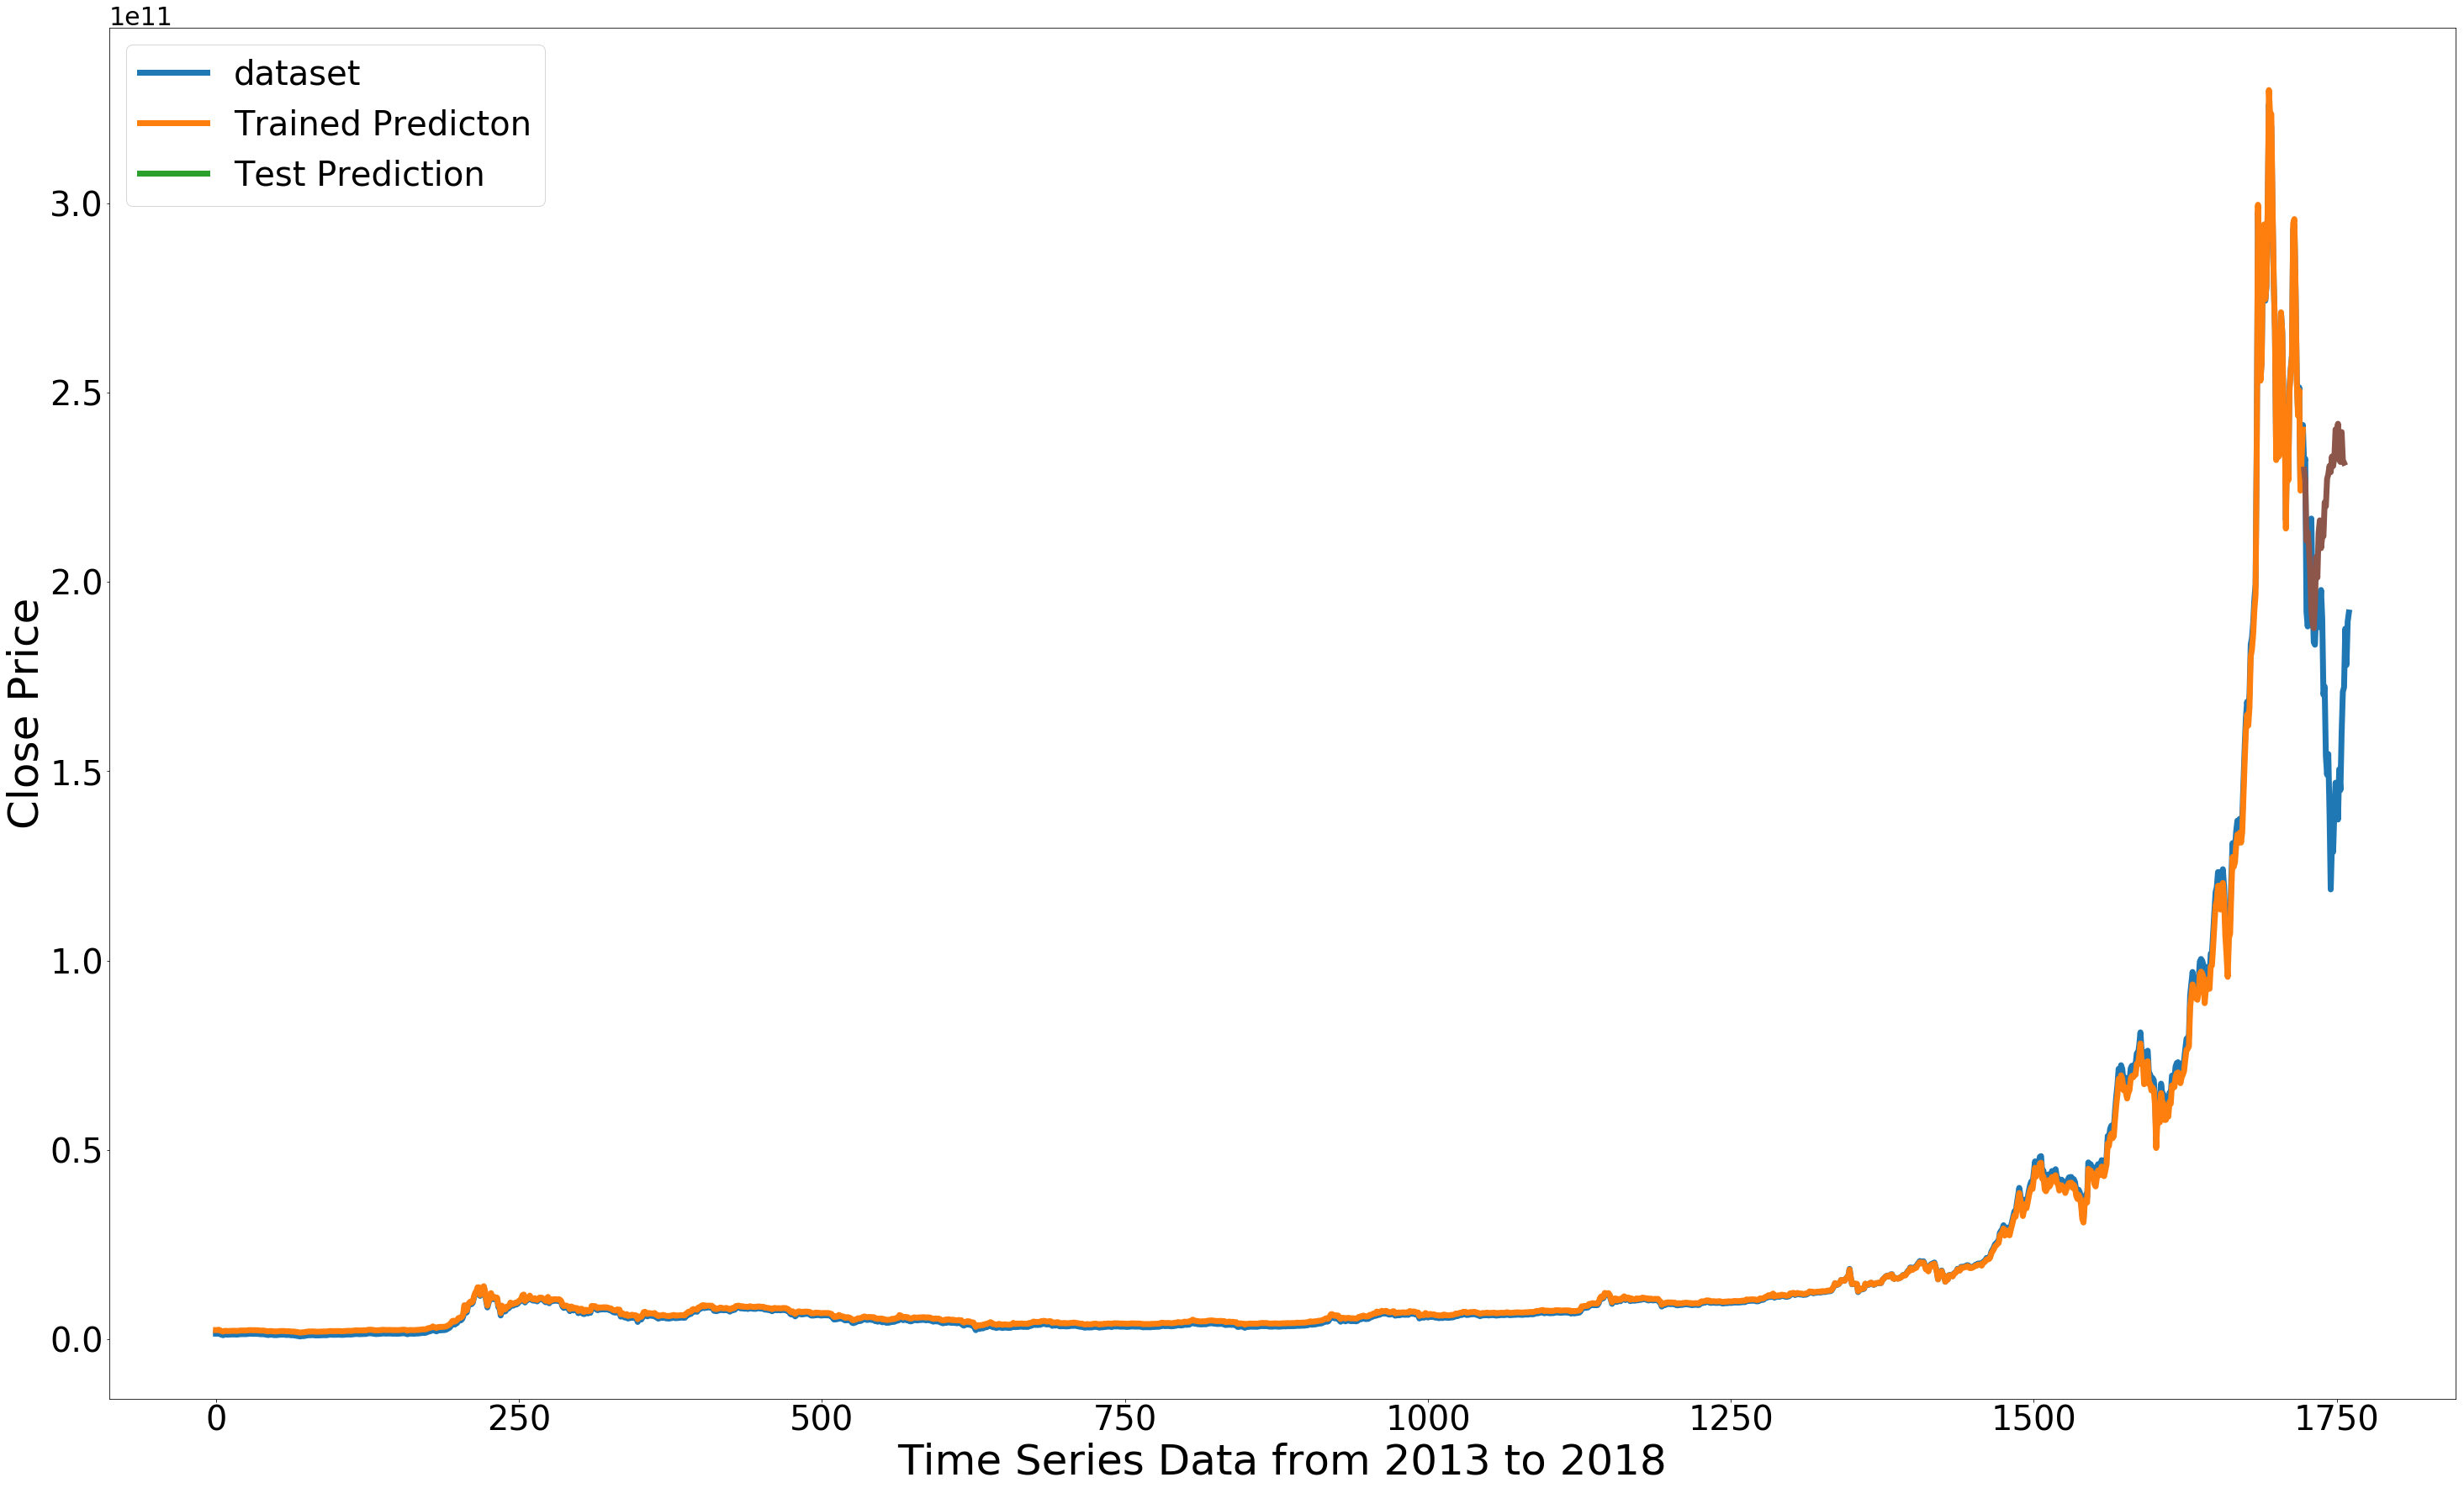

BTC
         close
0       134.21
1       144.54
2       139.00
3       116.99
4       105.21
5        97.75
6       112.50
7       115.91
8       112.30
9       111.50
10      113.57
11      112.67
12      117.20
13      115.24
14      115.00
15      117.98
16      111.50
17      114.22
18      118.76
19      123.02
20      123.50
21      121.99
22      122.00
23      122.88
24      123.89
25      126.70
26      133.20
27      131.98
28      133.48
29      129.75
...        ...
1731  10868.40
1732  11359.40
1733  11259.40
1734  11171.40
1735  11440.70
1736  11786.30
1737  11296.40
1738  10106.30
1739  10221.10
1740   9170.54
1741   8830.75
1742   9174.91
1743   8277.01
1744   6955.27
1745   7754.00
1746   7621.30
1747   8265.59
1748   8736.98
1749   8621.90
1750   8129.97
1751   8926.57
1752   8598.31
1753   9494.63
1754  10166.40
1755  10233.90
1756  11112.70
1757  10551.80
1758  11225.30
1759  11403.70
1760  10690.40

[1761 rows x 1 columns]
Epoch 1/1
 - 5s - loss: 0.0043
Iteration 

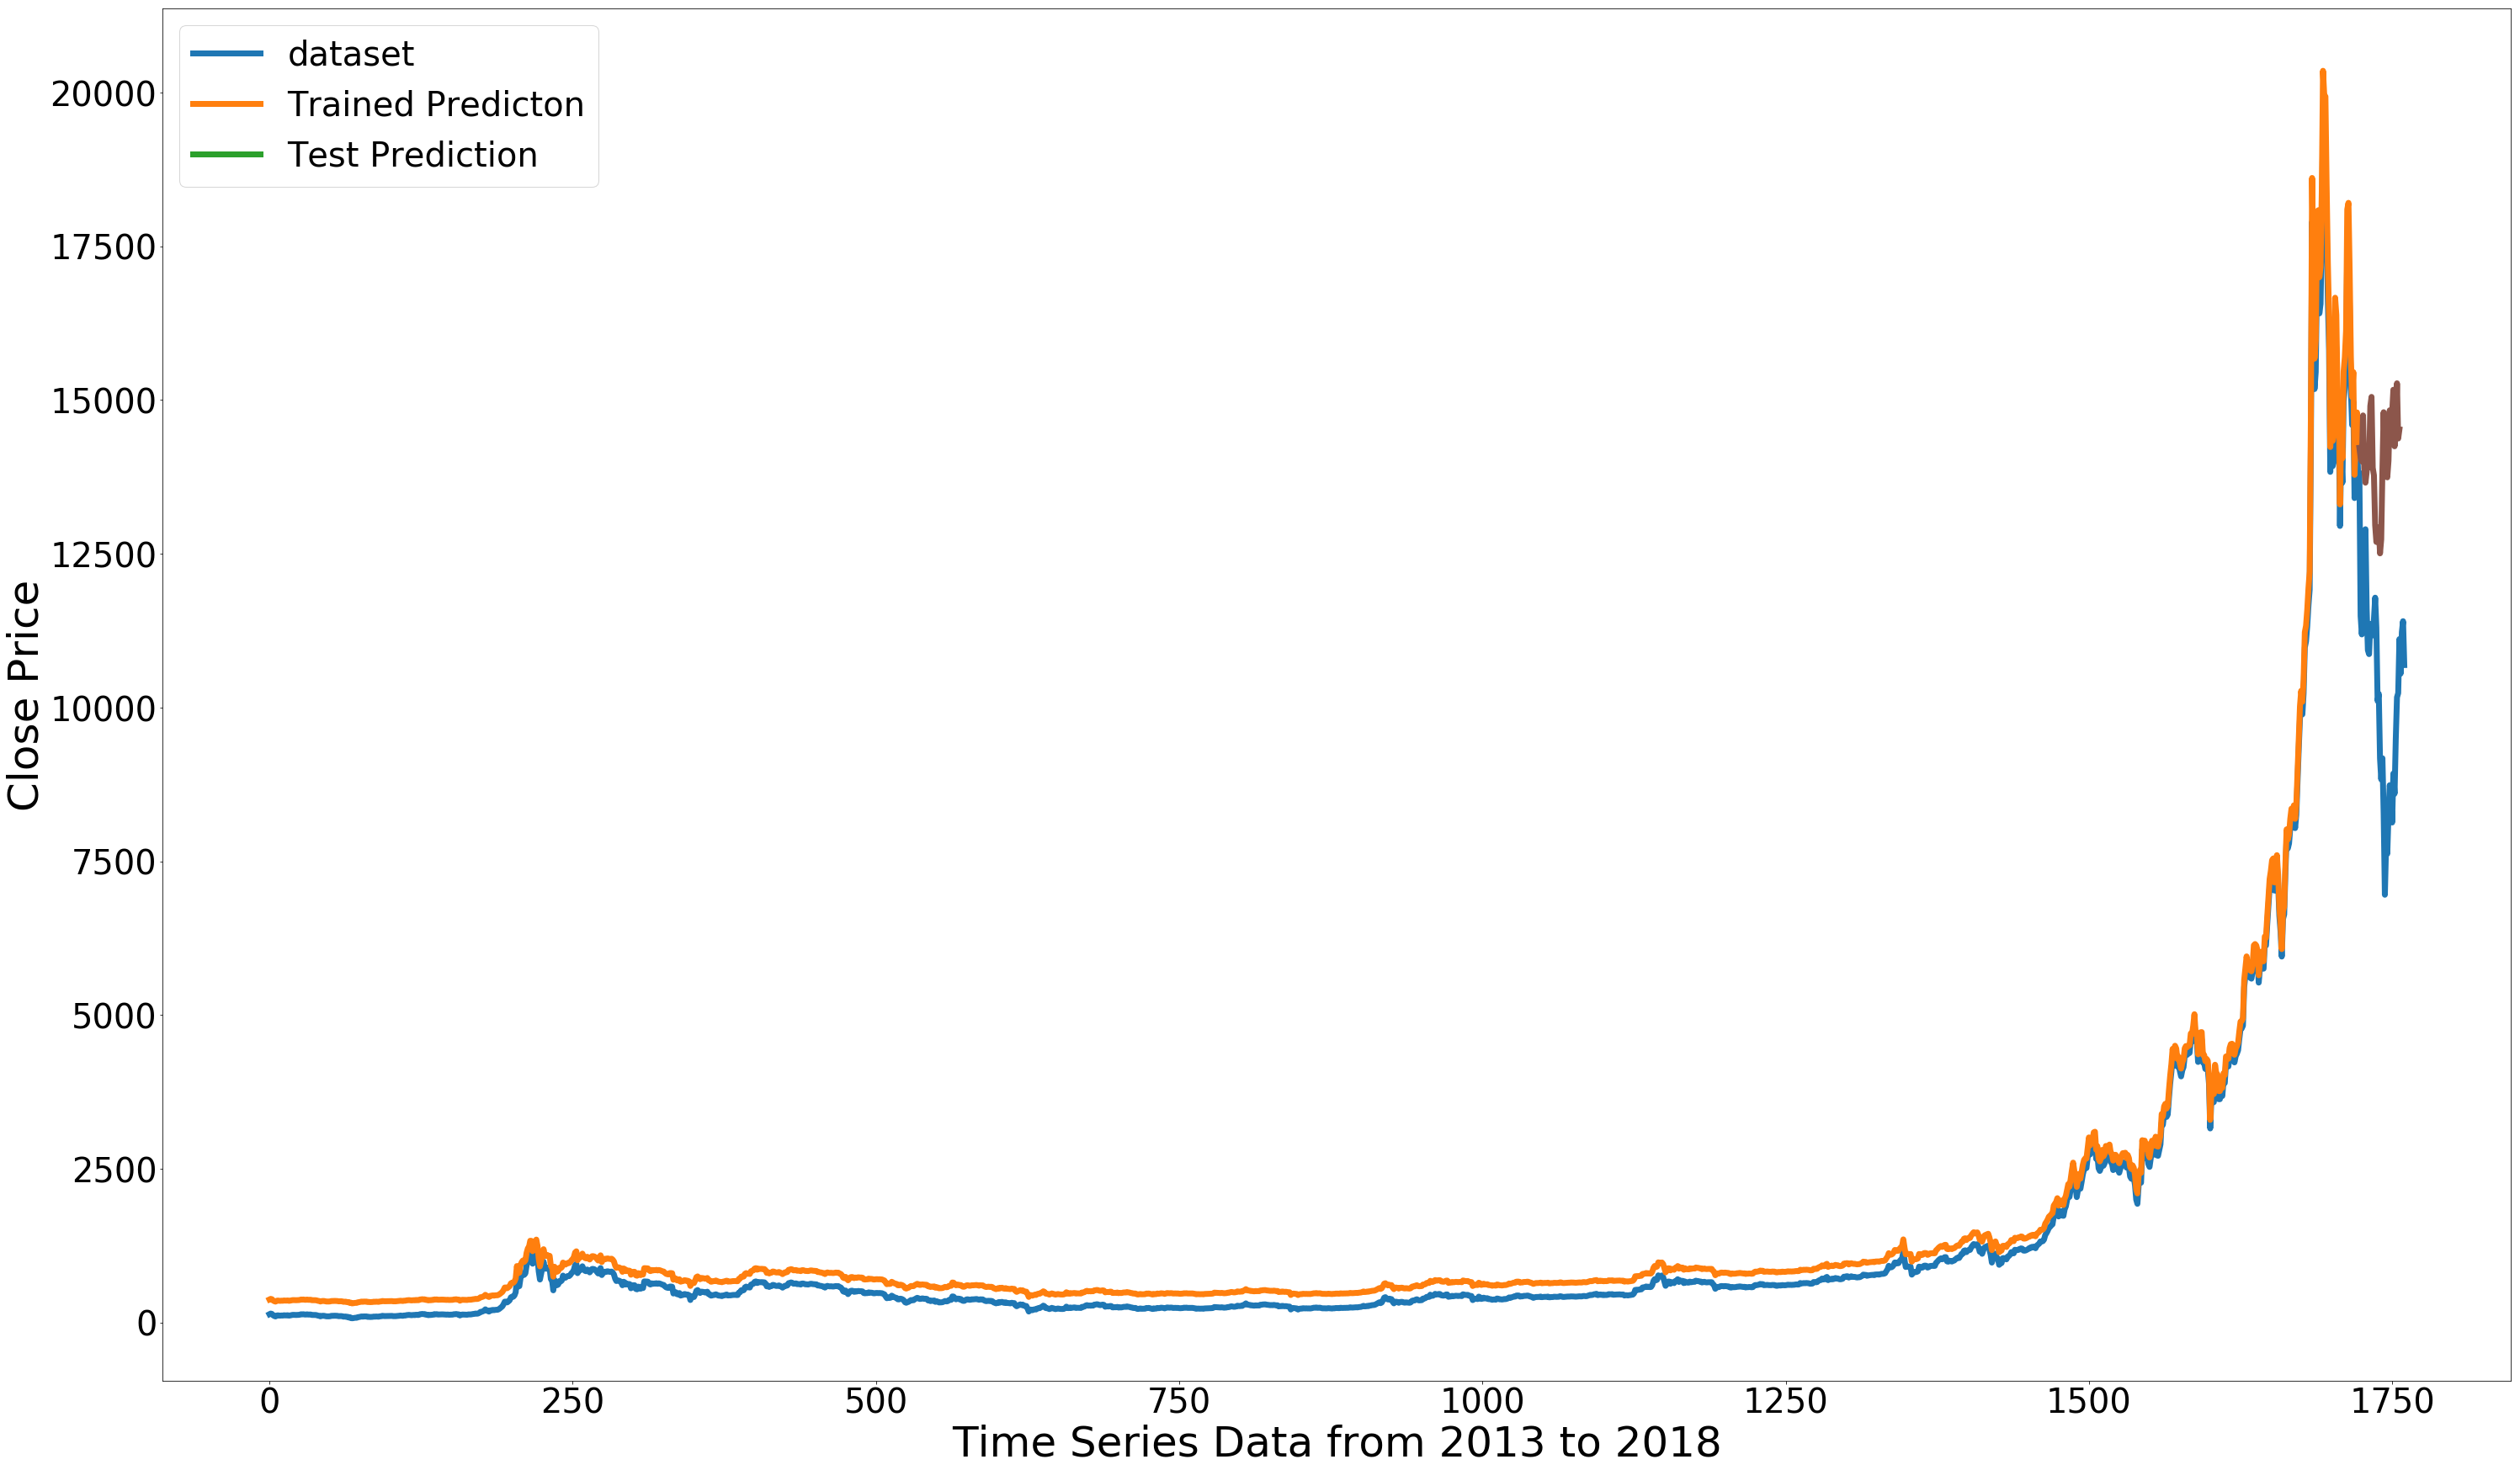

In [21]:
data_name_unique = ['BTC']
for coin_name in data_name_unique:
    predict_perform(coin_name, 'market')
    predict_perform(coin_name, 'close')

# LSTM Prediction for future values

In [22]:
direc = "./prediction_files/"
directory = os.path.dirname(direc)
if not os.path.exists(directory):
    os.makedirs(directory)

In [23]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [24]:
def predict(days, coin_name, feature):
    new_data = {}
    coin = data.loc[data['symbol'] == coin_name]
    coin_close = coin[[feature]].reset_index(drop=True)
    print(coin_name)
    print(coin_close)
    new_data[coin_name] = coin_close  
    
    #Fix random seed for reproducibility
    numpy.random.seed(7)
    dataset = new_data[coin_name]
    dataset = dataset.values
    dataset = dataset.astype('float32')
    
    #Normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    # split into train and test sets
    # Split into train and test sets
    train_size = len(dataset)
    train = dataset[0:train_size,:]

    # Reshape into X=t and Y=t+1
    step_size = 1
    trainX, trainY = dataset_generate(train, step_size)
        
    # Reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        
    model = Sequential()
    model.add(LSTM(100, activation='tanh', input_dim= step_size))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, nb_epoch=1, batch_size=1, verbose=2)
    # make predictions

    trainPredict = model.predict(trainX)
    trainLen = len(trainPredict)
    testPredict = []
 
    input = trainY[-1]
    temp = [[input]]
    predX = [temp]
 
    a = model.predict(numpy.array(predX))
    b = a.tolist ()
    predX = [b]
    testPredict.append([input])
    testPredict.append(b[0])
    
    for i in range(days-1):
        print ('Iteration %d: Done' % i)
        trainX = numpy.concatenate([trainX, [b]])
        trainY = numpy.concatenate ([trainY, b[0]])
        model.fit (trainX, trainY, nb_epoch=1, batch_size=1, verbose=2)
        a = model.predict (numpy.array ([b]))
        b = a.tolist ()
        testPredict.append (b[0])
        print ('Prediction %d:'%i, b)
    
    testPredict = numpy.array(testPredict)
    filename = direc+"coin_"+coin_name+"_"+feature+".txt";
    
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    testPredict = scaler.inverse_transform(numpy.array(testPredict))
    
    testPredict.tofile(filename, sep=',', format="%s")

    testPredict = numpy.pad(testPredict, (len(trainPredict),0), 'constant', constant_values=(np.nan, 0))
    
    # plot baseline and predictions
    plt.figure(figsize=(50,30))
    plt.tick_params(axis='both', which='major', labelsize=40)
    plt.tick_params(axis='both', which='minor', labelsize=40)

    a = plt.plot(scaler.inverse_transform(dataset), label='dataset', linewidth=7.0)
    b = plt.plot(trainPredict, label='Trained Predicton', linewidth=7.0)
    c = plt.plot(testPredict, label='Test Prediction', linewidth=7.0)
    plt.legend(loc=2, prop={'size': 40}, labels=["dataset",'Trained Predicton','Test Prediction'])
    plt.ylabel('Close Price', fontsize=50)
    plt.xlabel('Time Series Data from 2013 to 2018', fontsize=50)
    plt.show()

BTC
         close
0       134.21
1       144.54
2       139.00
3       116.99
4       105.21
5        97.75
6       112.50
7       115.91
8       112.30
9       111.50
10      113.57
11      112.67
12      117.20
13      115.24
14      115.00
15      117.98
16      111.50
17      114.22
18      118.76
19      123.02
20      123.50
21      121.99
22      122.00
23      122.88
24      123.89
25      126.70
26      133.20
27      131.98
28      133.48
29      129.75
...        ...
1731  10868.40
1732  11359.40
1733  11259.40
1734  11171.40
1735  11440.70
1736  11786.30
1737  11296.40
1738  10106.30
1739  10221.10
1740   9170.54
1741   8830.75
1742   9174.91
1743   8277.01
1744   6955.27
1745   7754.00
1746   7621.30
1747   8265.59
1748   8736.98
1749   8621.90
1750   8129.97
1751   8926.57
1752   8598.31
1753   9494.63
1754  10166.40
1755  10233.90
1756  11112.70
1757  10551.80
1758  11225.30
1759  11403.70
1760  10690.40

[1761 rows x 1 columns]


C:\Users\raghu\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\raghu\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(100, activation="tanh", input_shape=(None, 1))`
C:\Users\raghu\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1
 - 5s - loss: 0.0033
Iteration 0: Done
Epoch 1/1
 - 4s - loss: 2.1441e-04
Prediction 0: [[0.6071274876594543]]
Iteration 1: Done
Epoch 1/1
 - 4s - loss: 2.3390e-04
Prediction 1: [[0.5939257740974426]]
Iteration 2: Done
Epoch 1/1
 - 4s - loss: 2.3528e-04
Prediction 2: [[0.6150633096694946]]
Iteration 3: Done
Epoch 1/1
 - 4s - loss: 2.6312e-04
Prediction 3: [[0.6102400422096252]]
Iteration 4: Done
Epoch 1/1
 - 4s - loss: 1.9802e-04
Prediction 4: [[0.6172458529472351]]
Iteration 5: Done
Epoch 1/1
 - 4s - loss: 2.0131e-04
Prediction 5: [[0.6534720659255981]]
Iteration 6: Done
Epoch 1/1
 - 5s - loss: 2.2687e-04
Prediction 6: [[0.6533443927764893]]
Iteration 7: Done
Epoch 1/1
 - 6s - loss: 2.0973e-04
Prediction 7: [[0.6357582211494446]]
Iteration 8: Done
Epoch 1/1
 - 5s - loss: 2.1373e-04
Prediction 8: [[0.6337299942970276]]


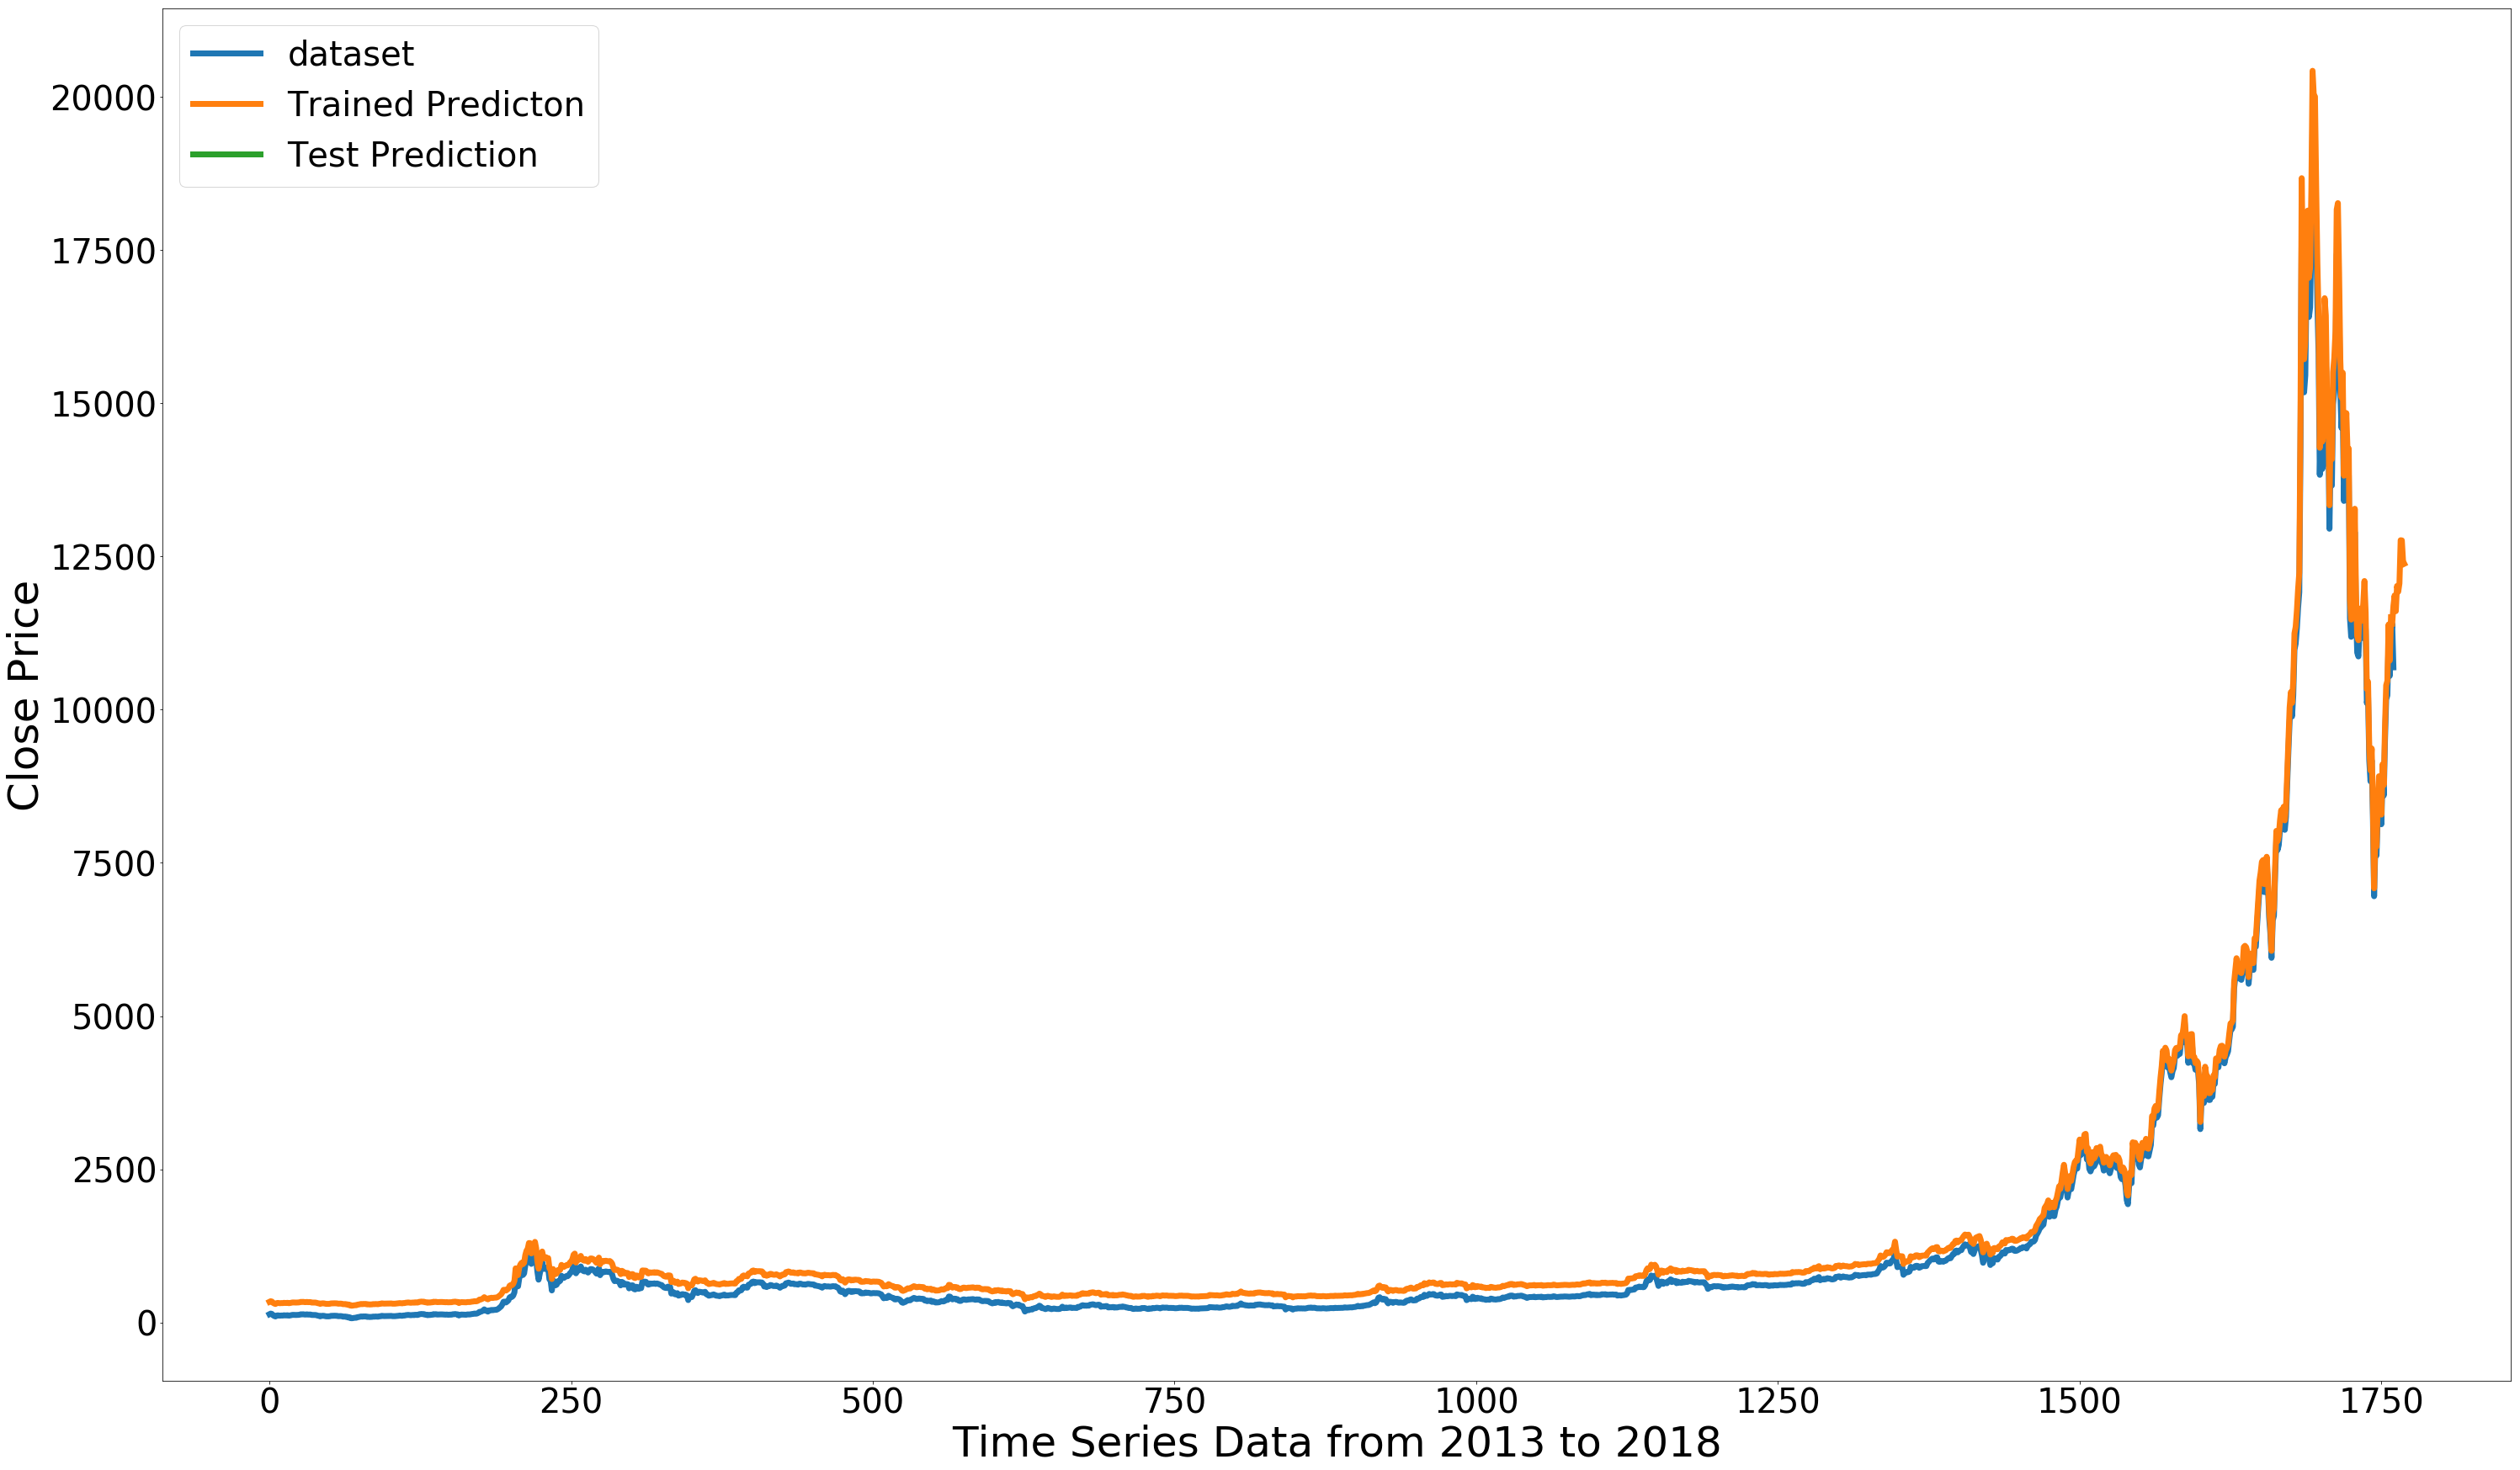

BTC
            market
0       1500520000
1       1491160000
2       1597780000
3       1542820000
4       1292190000
5       1180070000
6       1089890000
7       1254760000
8       1289470000
9       1248470000
10      1219450000
11      1259980000
12      1255970000
13      1311050000
14      1288630000
15      1279980000
16      1315720000
17      1242760000
18      1274620000
19      1319590000
20      1379140000
21      1376370000
22      1368910000
23      1363940000
24      1374130000
25      1384780000
26      1413300000
27      1489950000
28      1478030000
29      1495520000
...            ...
1731  184087000000
1732  183419000000
1733  192163000000
1734  189398000000
1735  188054000000
1736  193133000000
1737  197871000000
1738  190339000000
1739  170183000000
1740  172372000000
1741  153953000000
1742  149085000000
1743  154553000000
1744  139325000000
1745  118810000000
1746  130683000000
1747  128714000000
1748  139412000000
1749  146981000000
1750  145245000000
1751  13

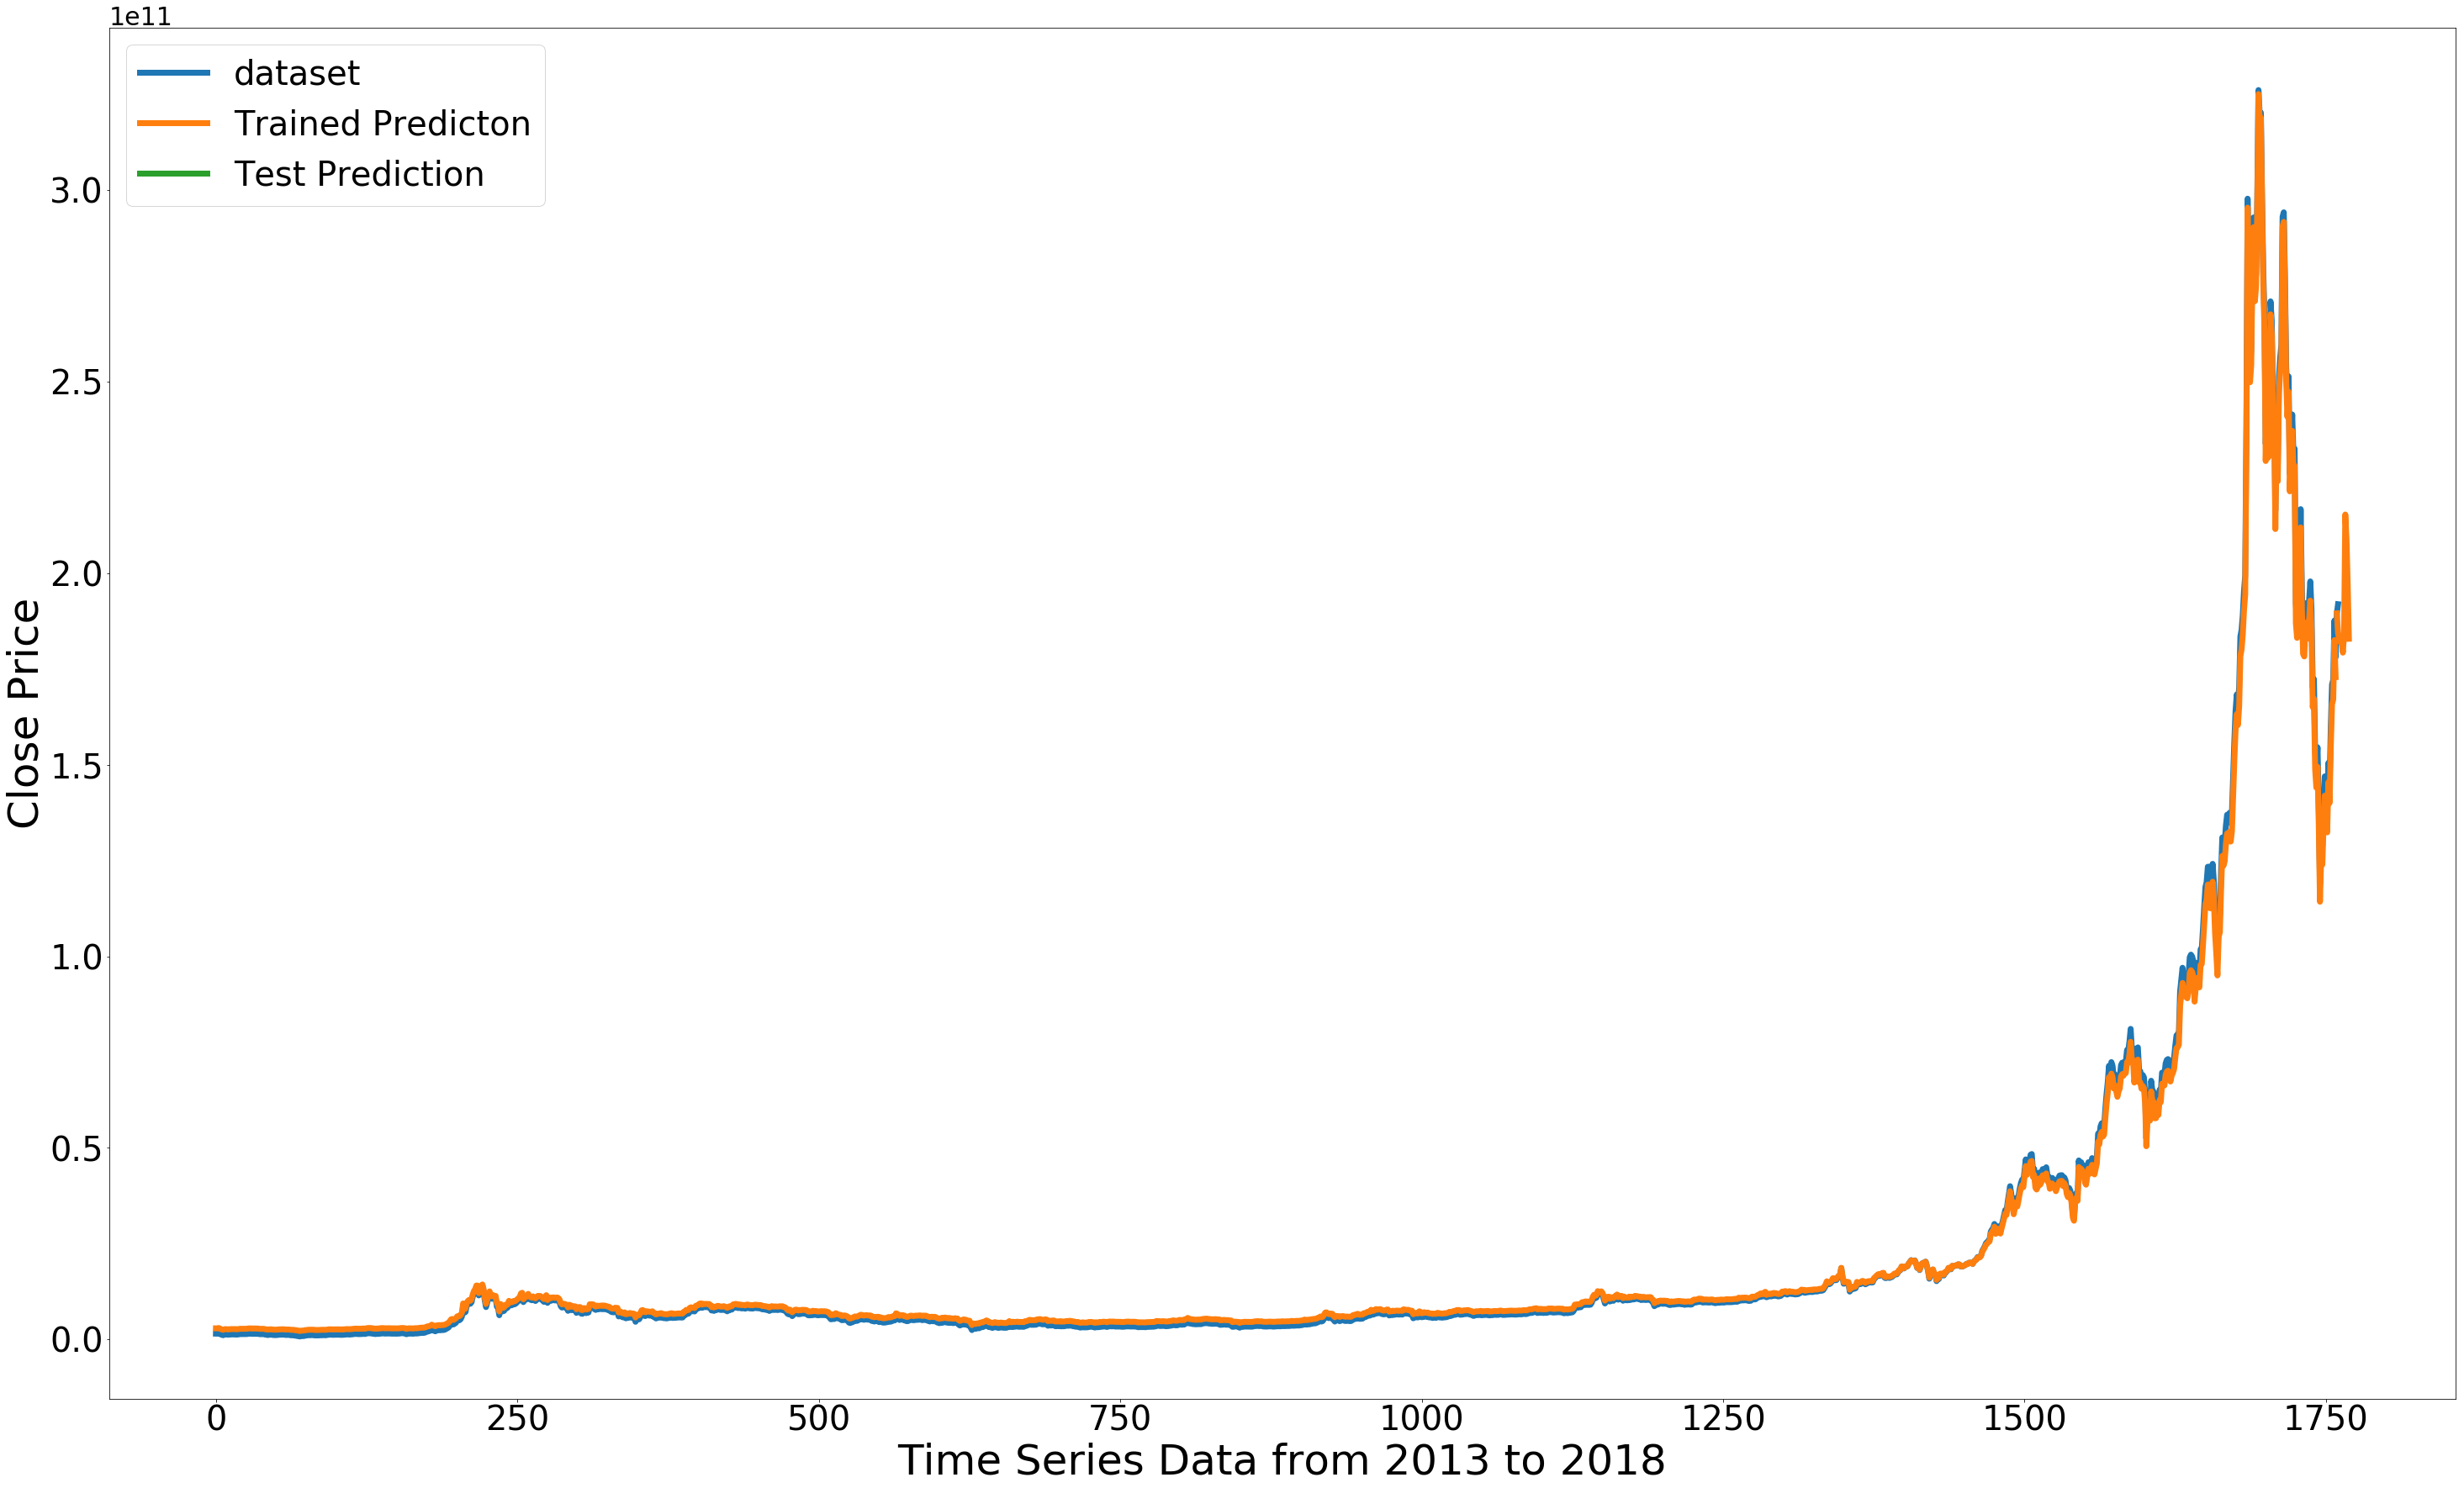

In [25]:
data_name_unique = ['BTC','ETC','XRP']
for coin_name in data_name_unique:
    predict(10, coin_name, 'close')
    predict(10, coin_name, 'market')

#  Code to recommend best coins and best days to sell

In [7]:
def readFile(filename):
    f = open(filename,'r')
    arr = []
    arr1 = []
    for line in f:
        arr.extend(line.strip().split(','))
    for i in range(1,len(arr)):
        arr1.append((float(arr[i]) - float(arr[i-1]))/float(arr[i-1]))
    return arr1

In [2]:
#  find out parameters w1, w2 by accepting d
from math import exp
def getParameters(d):
    b=.3
    w1 = exp(-1*b*d)
    w2 = 1-w1
    return w1,w2

In [3]:
#  function to find out coin to sell on a specific day
# value of D would be just a days range that we need to consider
def findDay(coin, days, coinValuesDict):
    w1, w2 = getParameters(days)
    R = []
    priceArr = coinValuesDict['coin_'+ coin + '_close']
    marketValArr = coinValuesDict['coin_'+ coin + '_market']
    for d in range(1,days+1,1):
        price = priceArr[d]
        market = marketValArr[d]
        R.append((d,(w1*price) + (w2* market)))
    returnArray = sorted(R,key=lambda x:x[1], reverse=True)
    return returnArray

In [4]:
#  function to find out coin to sell on a specific day
# value of D would be day minus first day
def findCoin(coinArray, d, coinValuesDict):
    w1,w2 = getParameters(d)
    R = []
    for c in coinArray:
        price = coinValuesDict['coin_'+ c + '_close'][d-1]
        market = coinValuesDict['coin_'+ c + '_market'][d-1]
        R.append((c, (w1 * price) + (w2 * market) ))
    returnArray = sorted(R, key=lambda x:x[1], reverse=True)
    return returnArray

In [9]:
def findCoinAndDay(coinArray, days, coinValuesDict):
    R = []
    for d in range(1,days+1,1):
        coin_rank = findCoin(coinArray, d, coinValuesDict)
        R.append(coin_rank[0])
    returnArray = sorted(R, key=lambda x:x[1], reverse=True)
    return returnArray

In [10]:
# reading directory and creating array
from os import listdir,getcwd
from os.path import isfile, join
dirpath = './prediction_files/'
allFiles = [f for f in listdir(dirpath) if not (f.startswith('.')) and isfile(join(dirpath, f))]
coins= set()
coinValuesDict = {}
for file in allFiles:
    filename = join(dirpath,file)
    justFile = file.split('.txt')[0]
    coinname = justFile.split('_')[1]
    coins.add(coinname)
    if justFile not in coinValuesDict:
        coinValuesDict[justFile] = readFile(filename)
print(findCoinAndDay(list(coins),len(coinValuesDict[justFile]), coinValuesDict))

[('XRP', 0.08318873827882757), ('BTC', 0.06707007001956598), ('BTC', 0.05964259794295747), ('XRP', 0.05080423400580009), ('BTC', 0.04092398562334336), ('BTC', 0.03347174765517063), ('BTC', 0.03306177854278264), ('BTC', 0.026552062763716095), ('BTC', 0.016982929517012083), ('BTC', -0.00482426228546963)]
